# Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 30, 'axes.titlesize': 30, 'axes.labelsize': 22})

# Load data

In [2]:
train = pd.read_csv('/kaggle/input/google-quest-challenge/train.csv')

category_cols = train['category'].unique()
question_target_cols = ['question_asker_intent_understanding','question_body_critical', 'question_conversational', 
                        'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer',
                        'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 
                        'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice',
                        'question_type_compare', 'question_type_consequence', 'question_type_definition', 
                        'question_type_entity', 'question_type_instructions', 'question_type_procedure',
                        'question_type_reason_explanation', 'question_type_spelling', 'question_well_written']
answer_target_cols = ['answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance',
                      'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 
                      'answer_type_reason_explanation', 'answer_well_written']
target_cols = question_target_cols + answer_target_cols

print('Train samples: %s' % len(train))
display(train.head())

Train samples: 6079


qa_id                                     question_title  \
0      0  What am I losing when using extension tubes in...   
1      1  What is the distinction between a city and a s...   
2      2  Maximum protusion length for through-hole comp...   
3      3              Can an affidavit be used in Beit Din?   
4      5       How do you make a binary image in Photoshop?   

                                       question_body question_user_name  \
0  After playing around with macro photography on...               ysap   
1  I am trying to understand what kinds of places...      russellpierce   
2  I'm working on a PCB that has through-hole com...          Joe Baker   
3  An affidavit, from what i understand, is basic...         Scimonster   
4  I am trying to make a binary image. I want mor...            leigero   

                                  question_user_page  \
0         https://photo.stackexchange.com/users/1024   
1           https://rpg.stackexchange.com/users/8774   
2  https://electronics.stackexchange.com/users/10157   
3       https://judaism.stackexchange.com/users/5151   
4  https://graphicdesign.stackexchange.com/users/...   

                                              answer answer_user_name  \
0  I just got extension tubes, so here's the skin...           rfusca   
1  It might be helpful to look into the definitio...     Erik Schmidt   
2  Do you even need grooves?  We make several pro...      Dwayne Reid   
3  Sending an "affidavit" it is a dispute between...    Y     e     z   
4  Check out Image Trace in Adobe Illustrator. \n...             q2ra   

                                    answer_user_page  \
0         https://photo.stackexchange.com/users/1917   
1           https://rpg.stackexchange.com/users/1871   
2  https://electronics.stackexchange.com/users/64754   
3       https://judaism.stackexchange.com/users/4794   
4  https://graphicdesign.stackexchange.com/users/...   

                                                 url   category  ...  \
0  http://photo.stackexchange.com/questions/9169/...  LIFE_ARTS  ...   
1  http://rpg.stackexchange.com/questions/47820/w...    CULTURE  ...   
2  http://electronics.stackexchange.com/questions...    SCIENCE  ...   
3  http://judaism.stackexchange.com/questions/551...    CULTURE  ...   
4  http://graphicdesign.stackexchange.com/questio...  LIFE_ARTS  ...   

  question_well_written  answer_helpful  answer_level_of_information  \
0              1.000000        1.000000                     0.666667   
1              0.888889        0.888889                     0.555556   
2              0.777778        0.777778                     0.555556   
3              0.888889        0.833333                     0.333333   
4              1.000000        1.000000                     0.666667   

   answer_plausible  answer_relevance  answer_satisfaction  \
0          1.000000          1.000000             0.800000   
1          0.888889          0.888889             0.666667   
2          1.000000          1.000000             0.666667   
3          0.833333          1.000000             0.800000   
4          1.000000          1.000000             0.800000   

   answer_type_instructions  answer_type_procedure  \
0                       1.0               0.000000   
1                       0.0               0.000000   
2                       0.0               0.333333   
3                       0.0               0.000000   
4                       1.0               0.000000   

   answer_type_reason_explanation  answer_well_written  
0                        0.000000             1.000000  
1                        0.666667             0.888889  
2                        1.000000             0.888889  
3                        1.000000             1.000000  
4                        1.000000             1.000000  

[5 rows x 41 columns]

# Question score analysis (category)

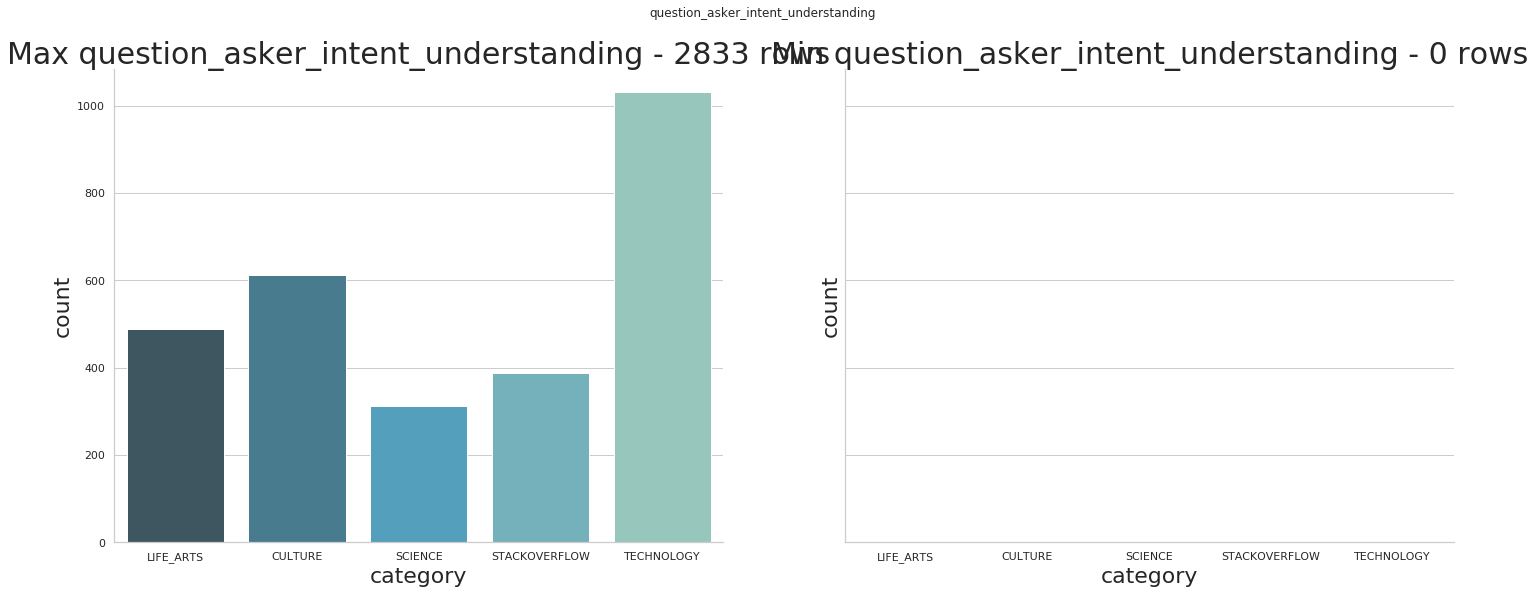

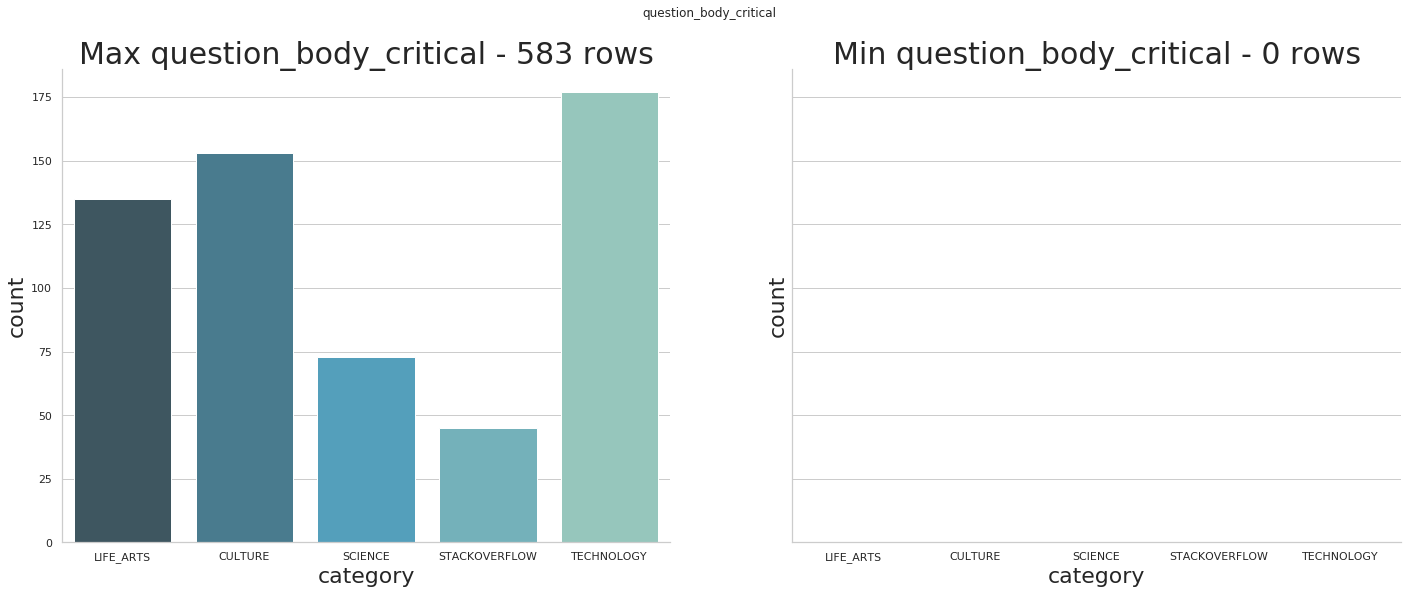

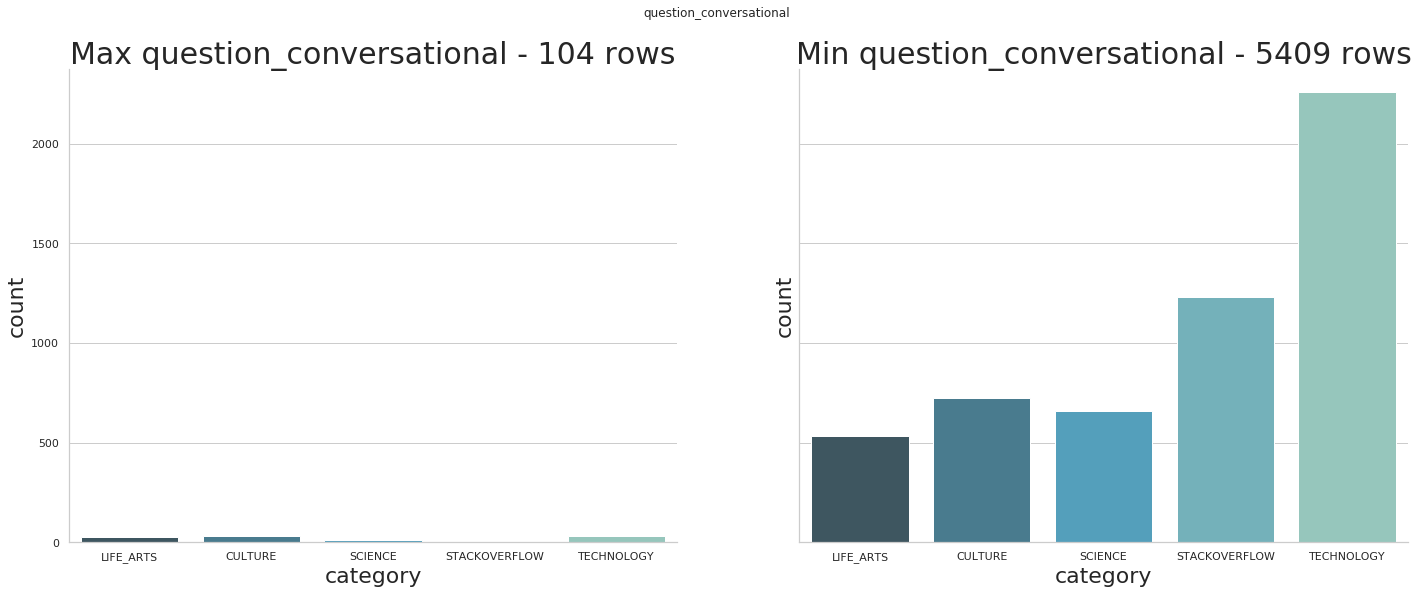

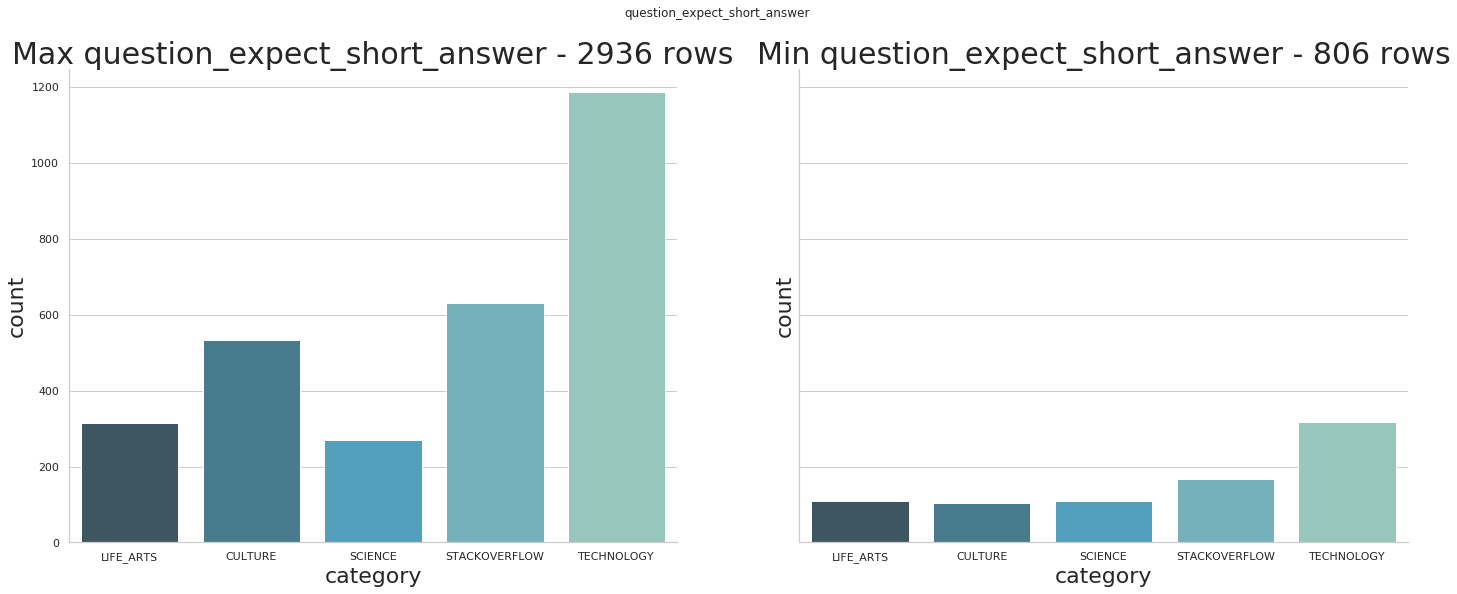

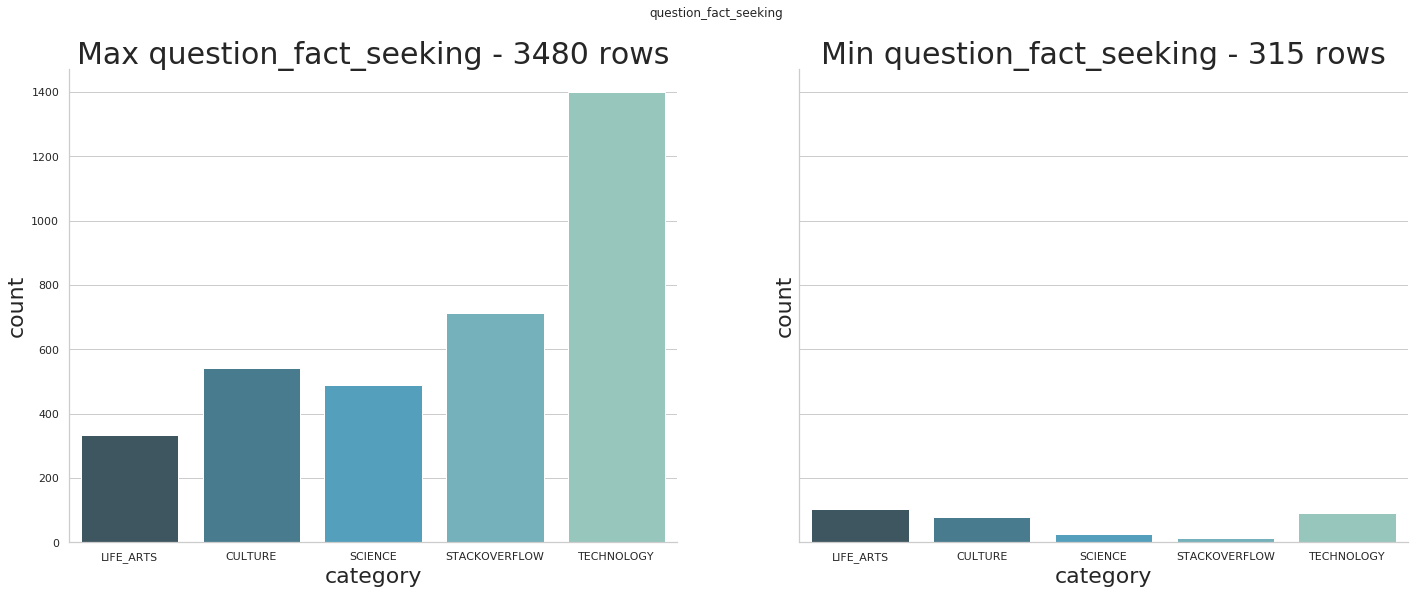

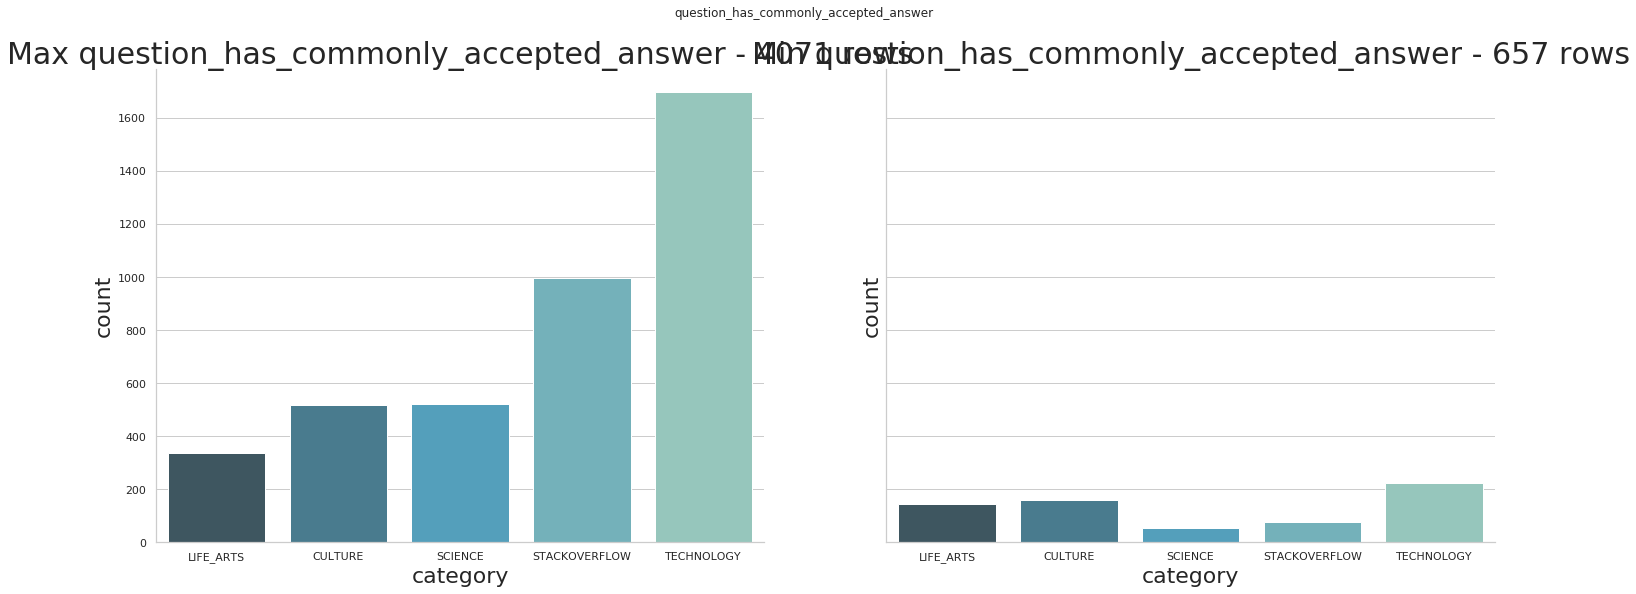

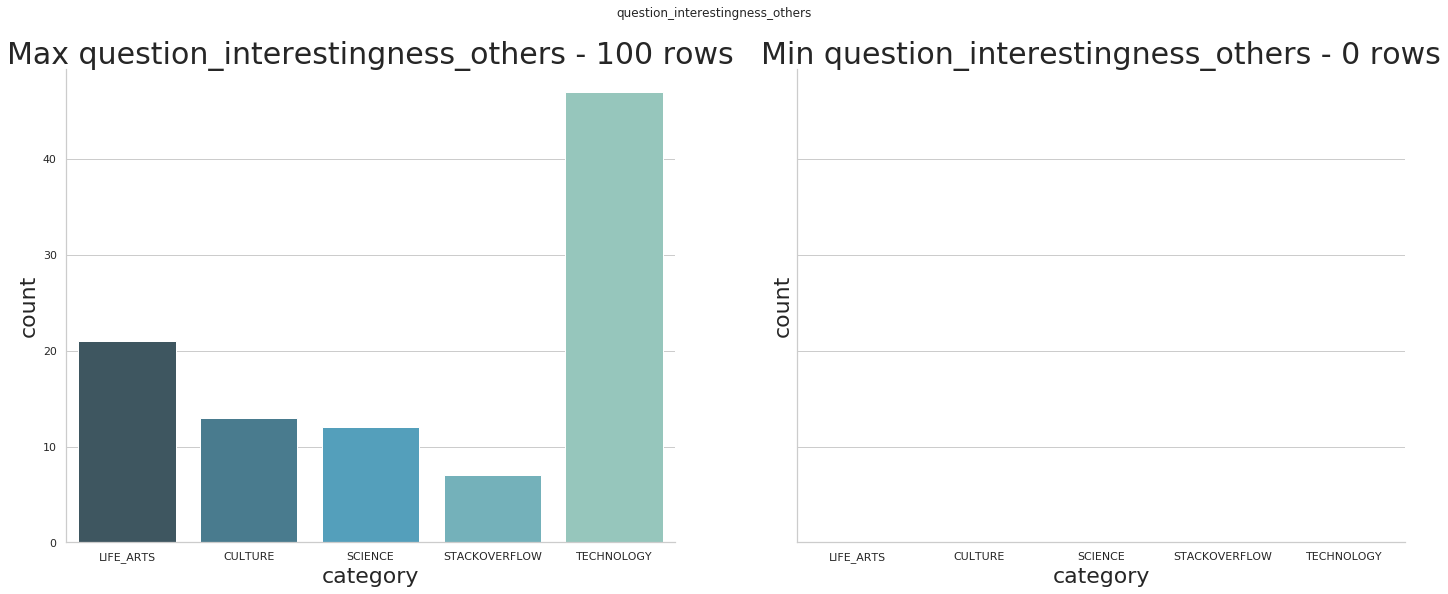

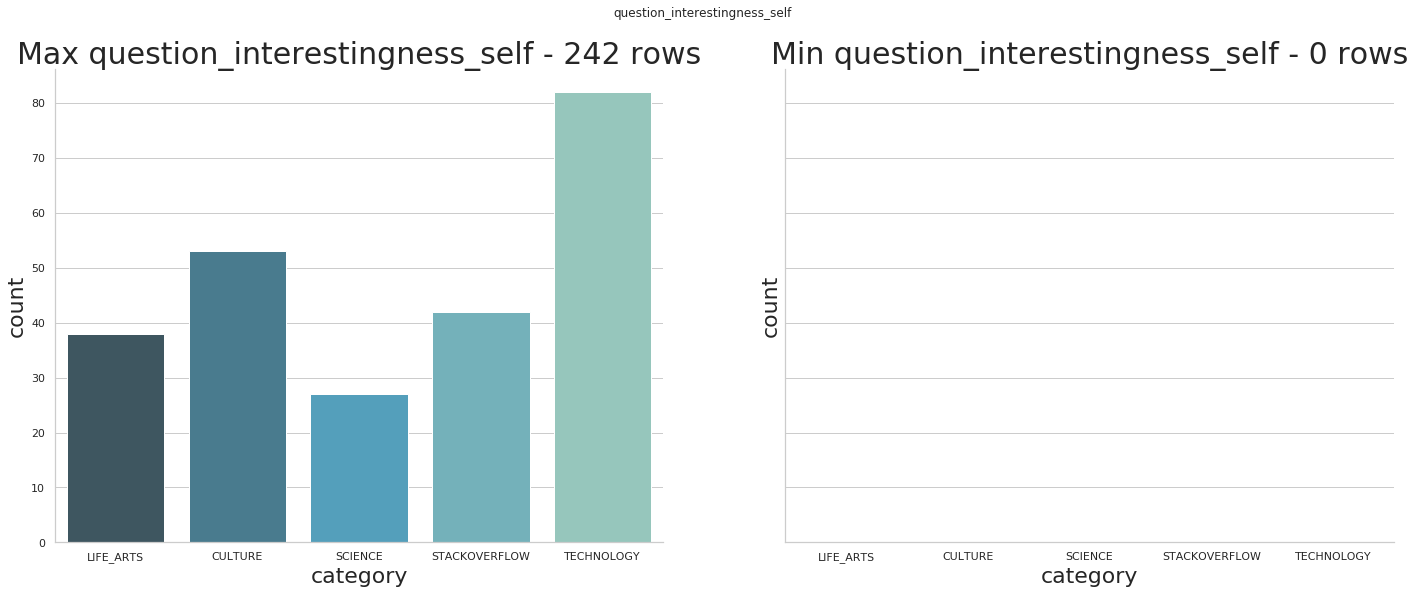

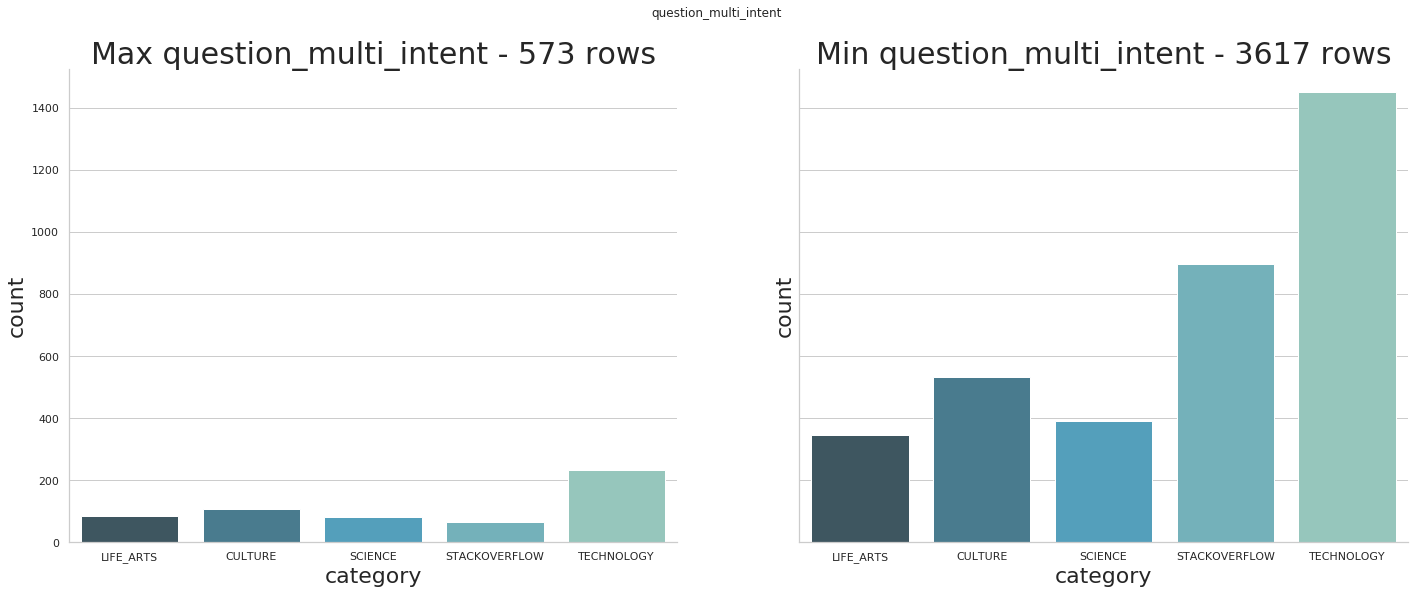

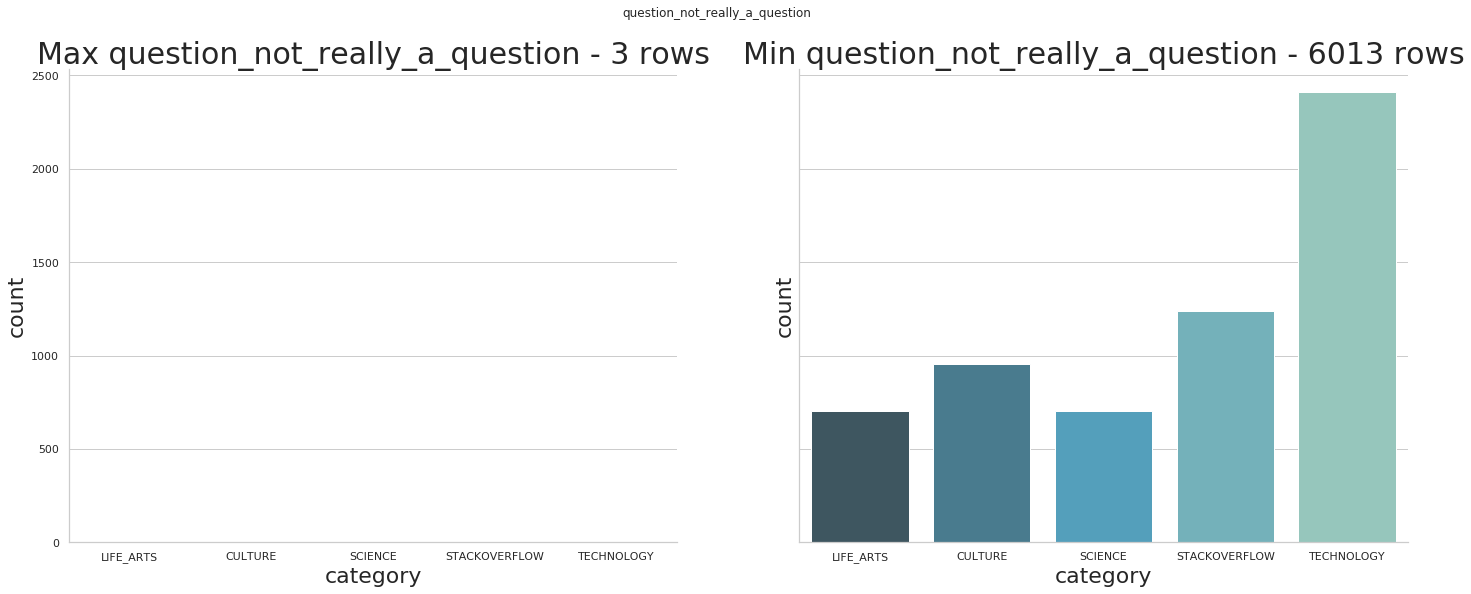

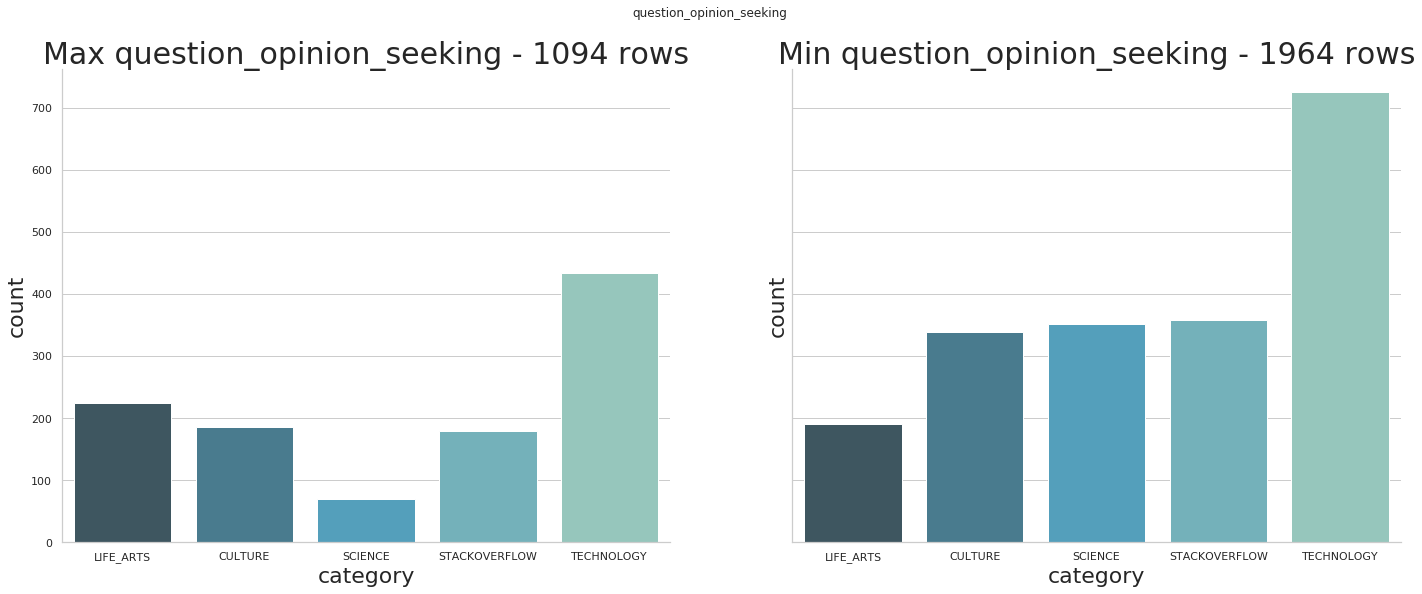

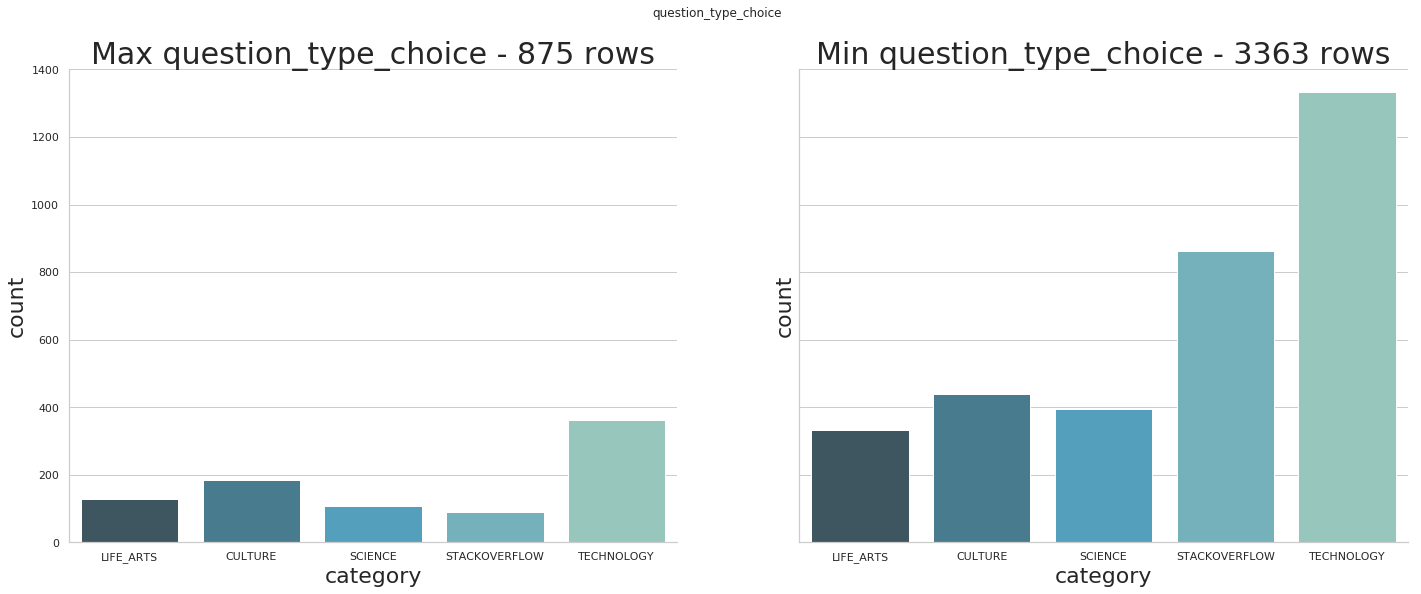

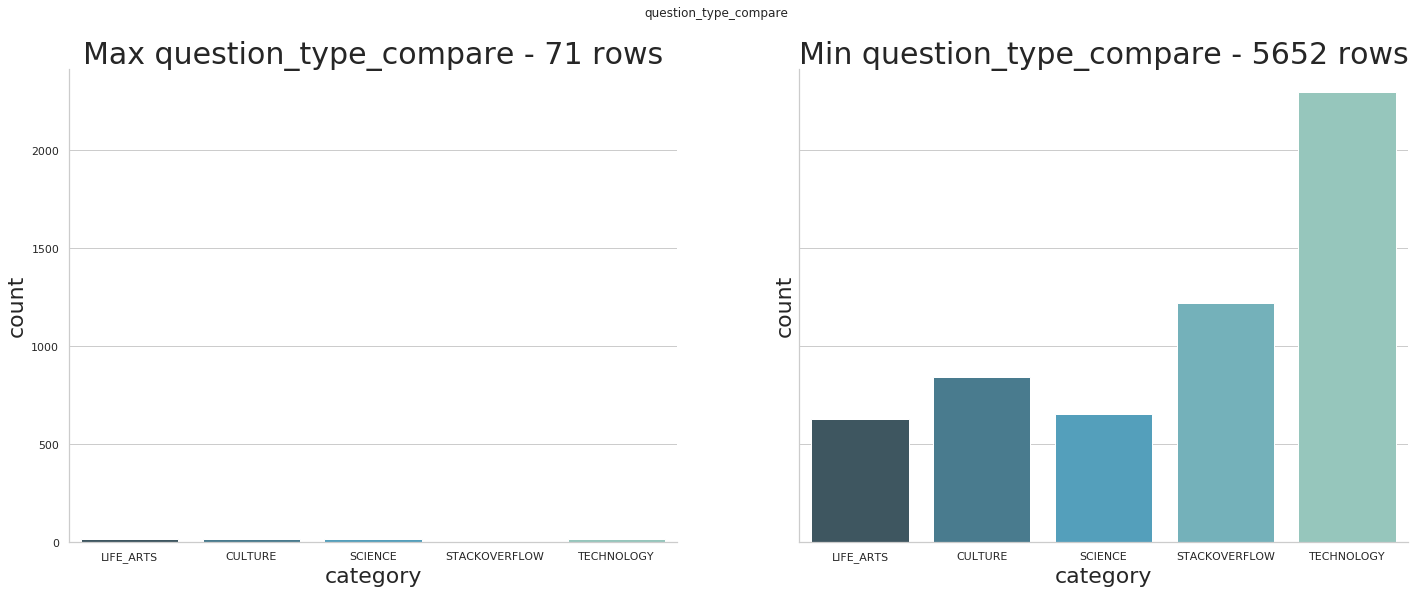

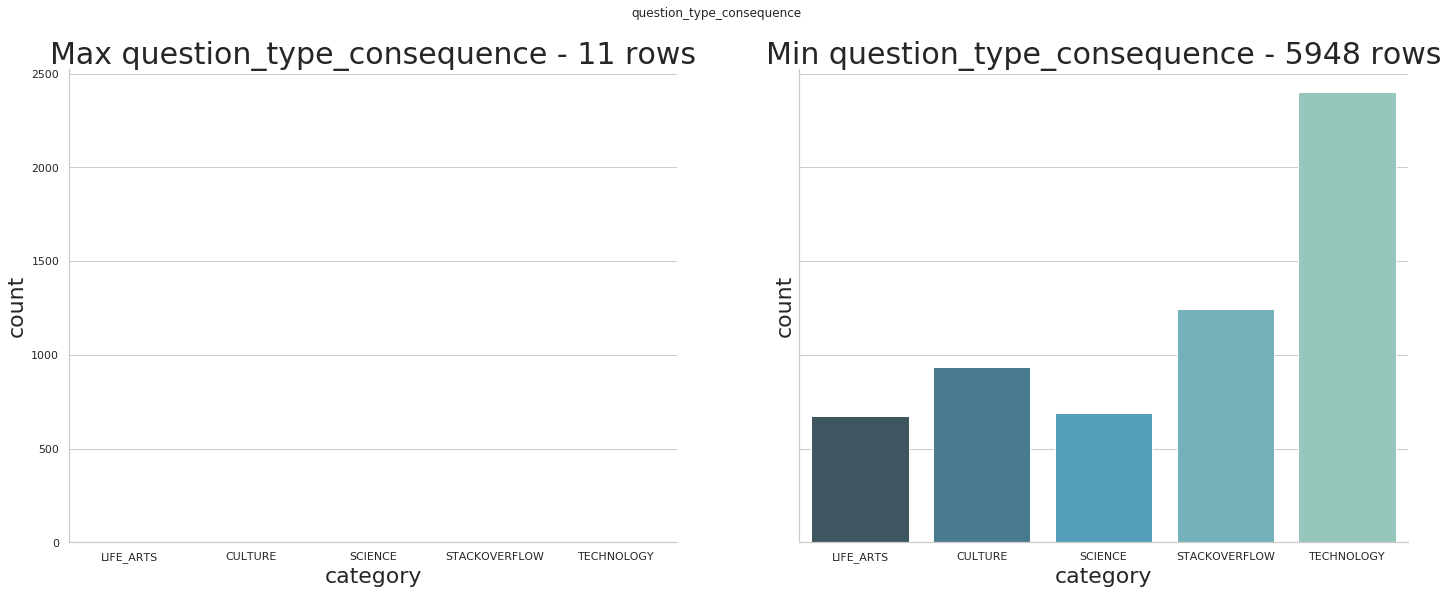

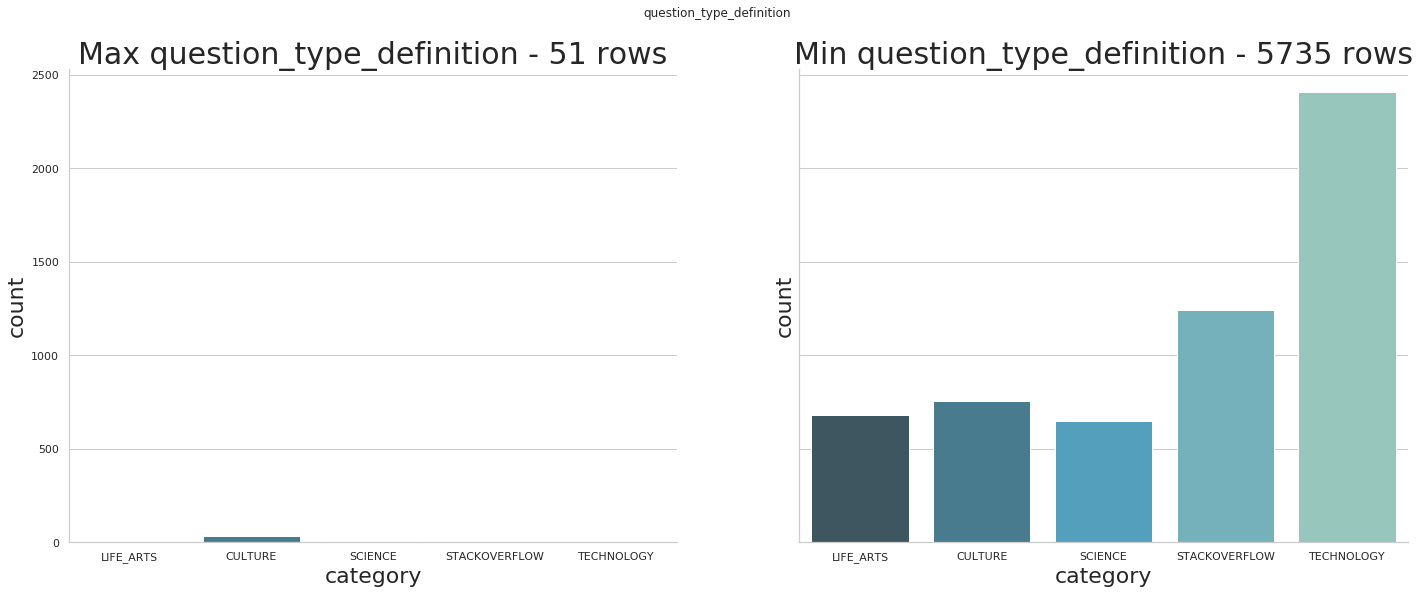

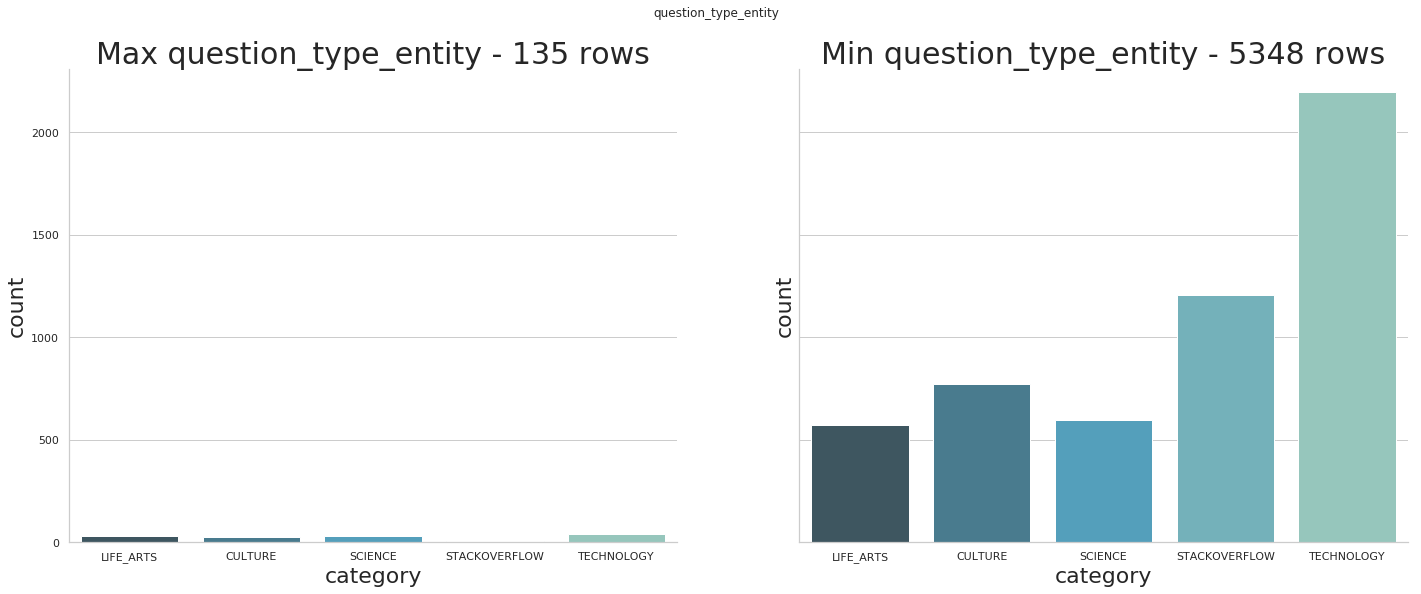

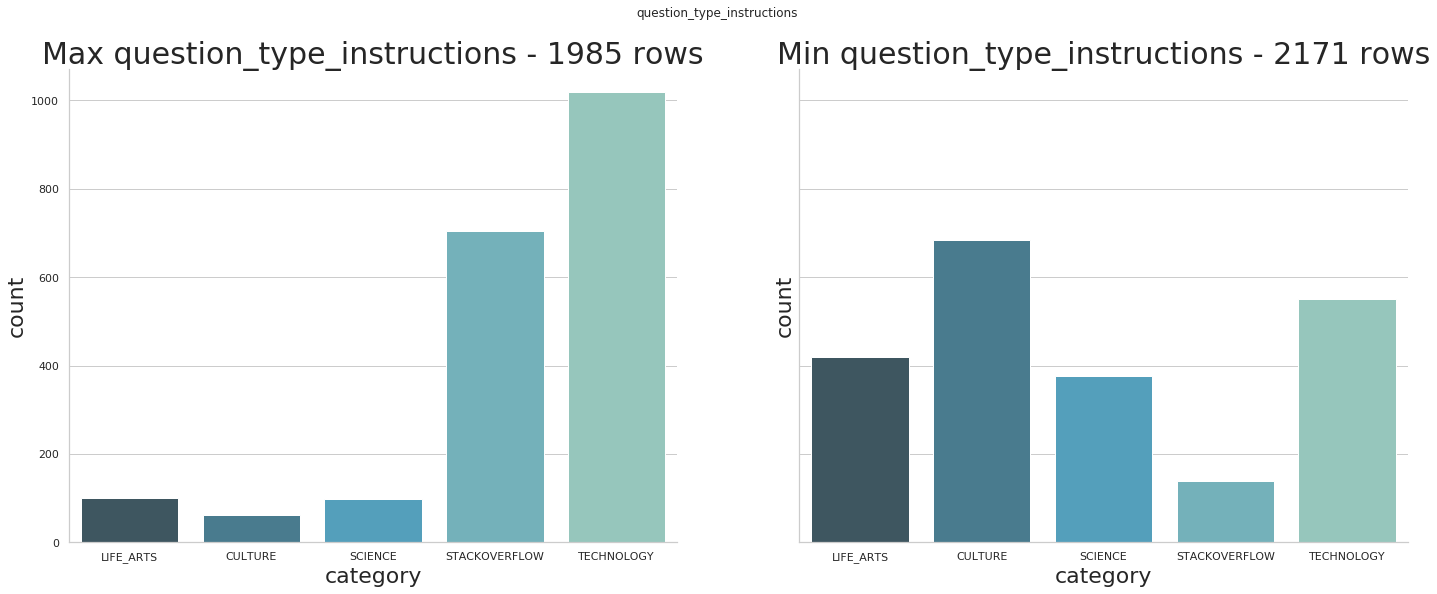

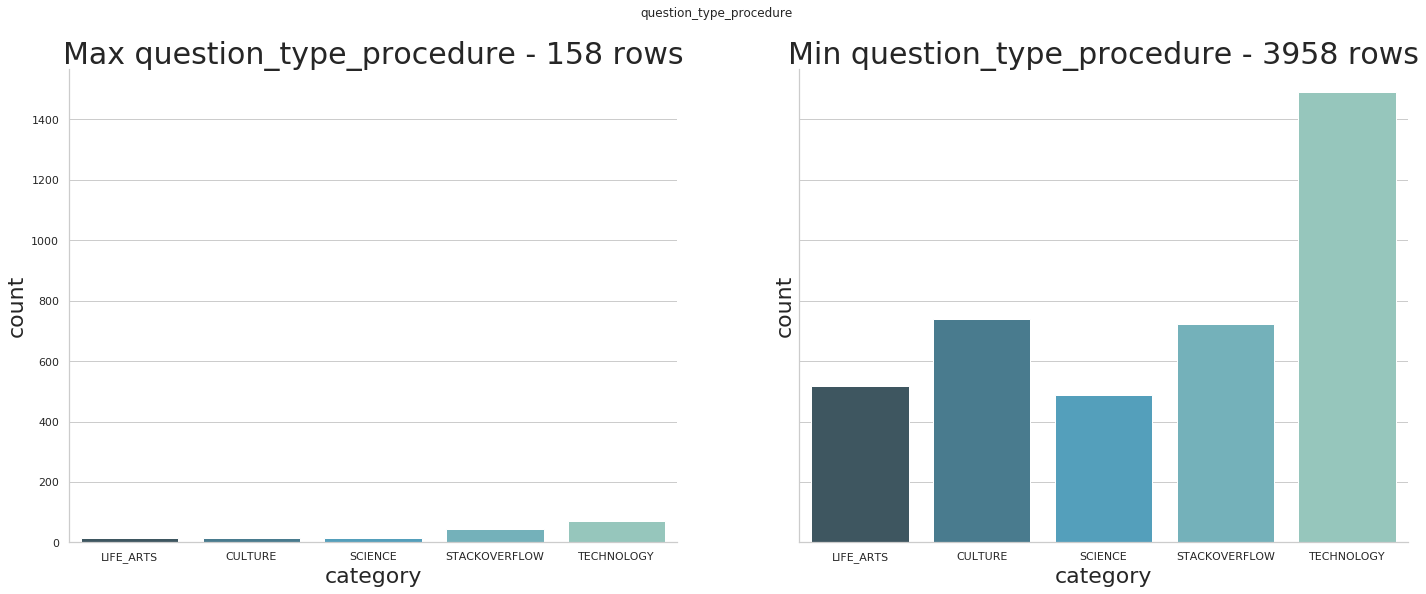

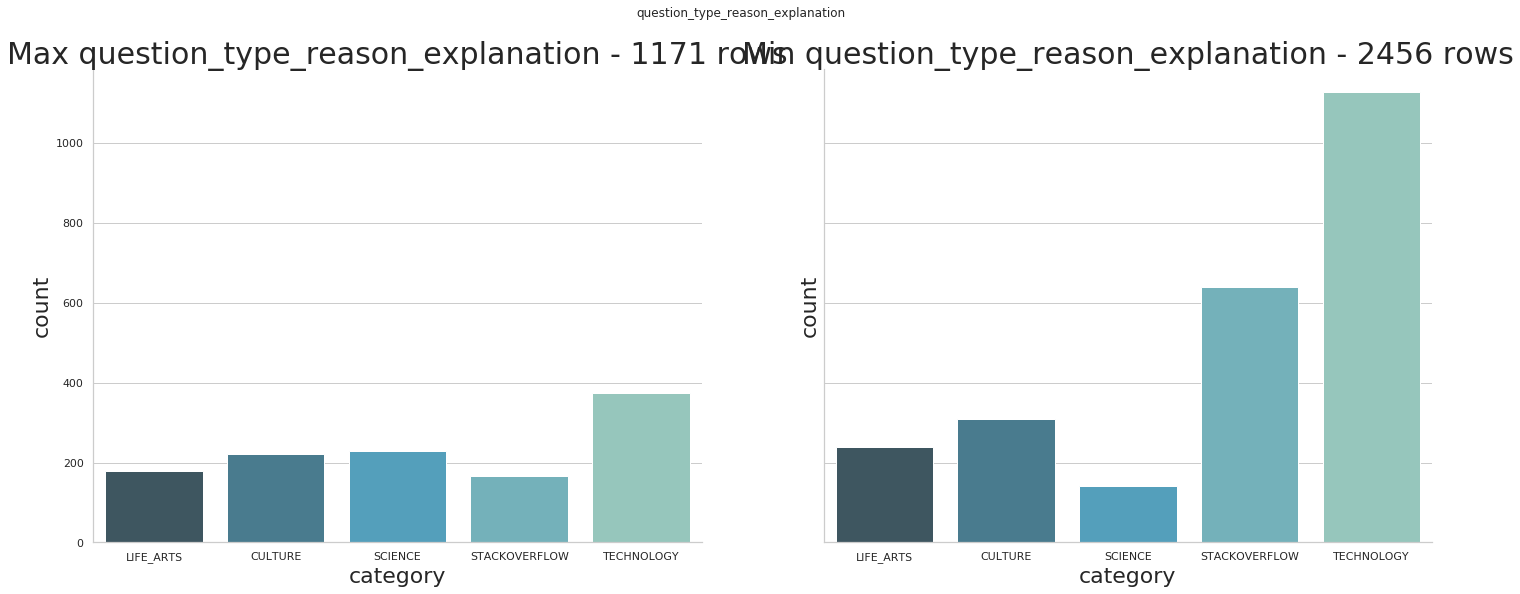

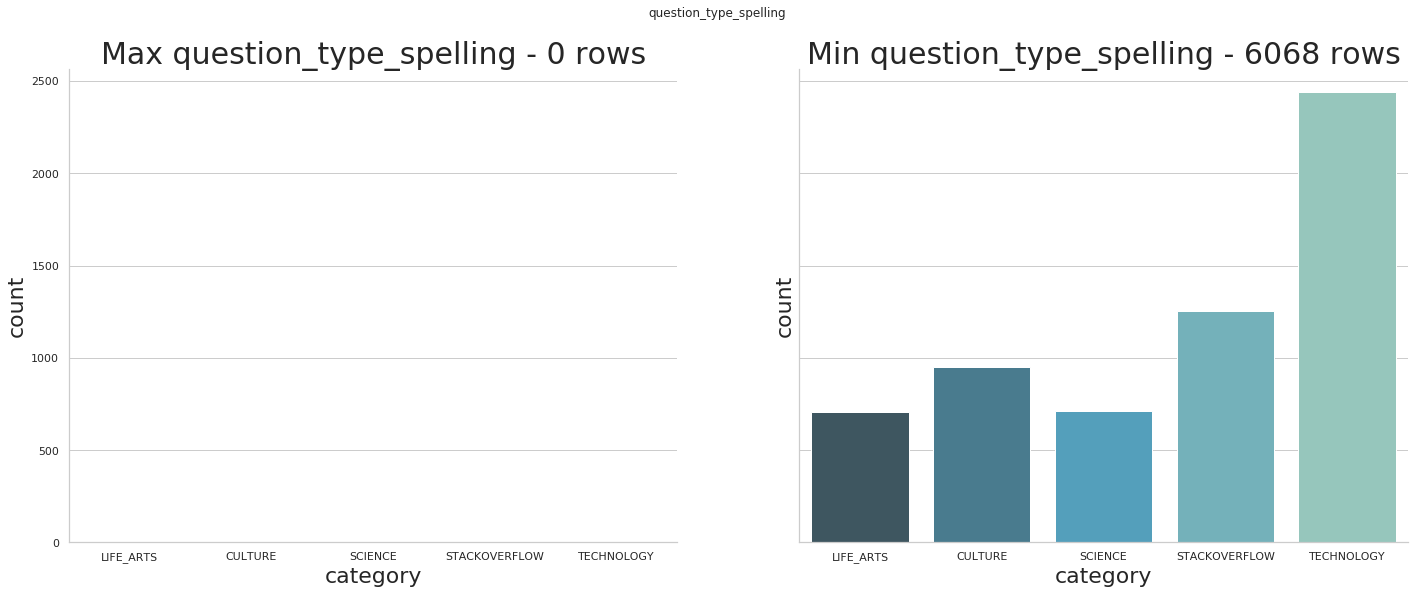

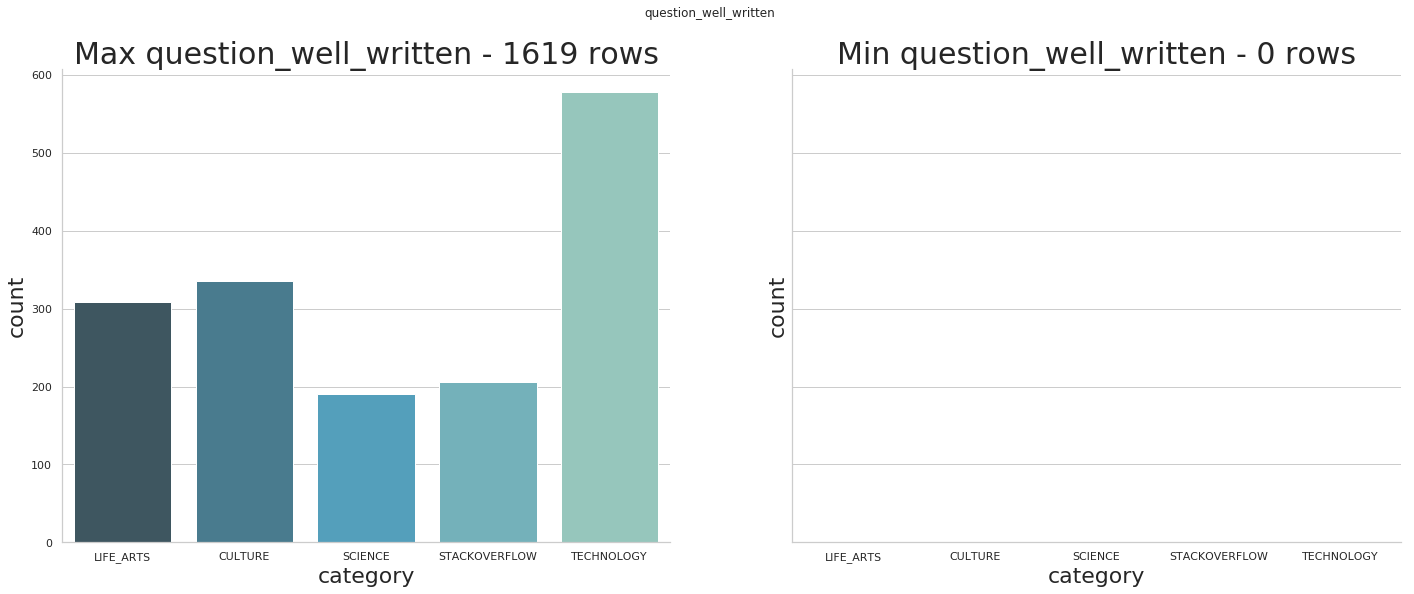

In [3]:
for col in question_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]
    if (len(max_set) > 0) or (len(min_set) > 0):
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(24, 8.7))
        fig.suptitle(col) 
        sns.countplot(x="category", data=max_set, palette="GnBu_d", order=category_cols, ax=ax1).set_title('Max %s - %d rows' % (col, len(max_set)))
        sns.countplot(x="category", data=min_set, palette="GnBu_d", order=category_cols, ax=ax2).set_title('Min %s - %d rows' % (col, len(min_set)))
        sns.despine()
        plt.show()

# Answer score analysis (category)

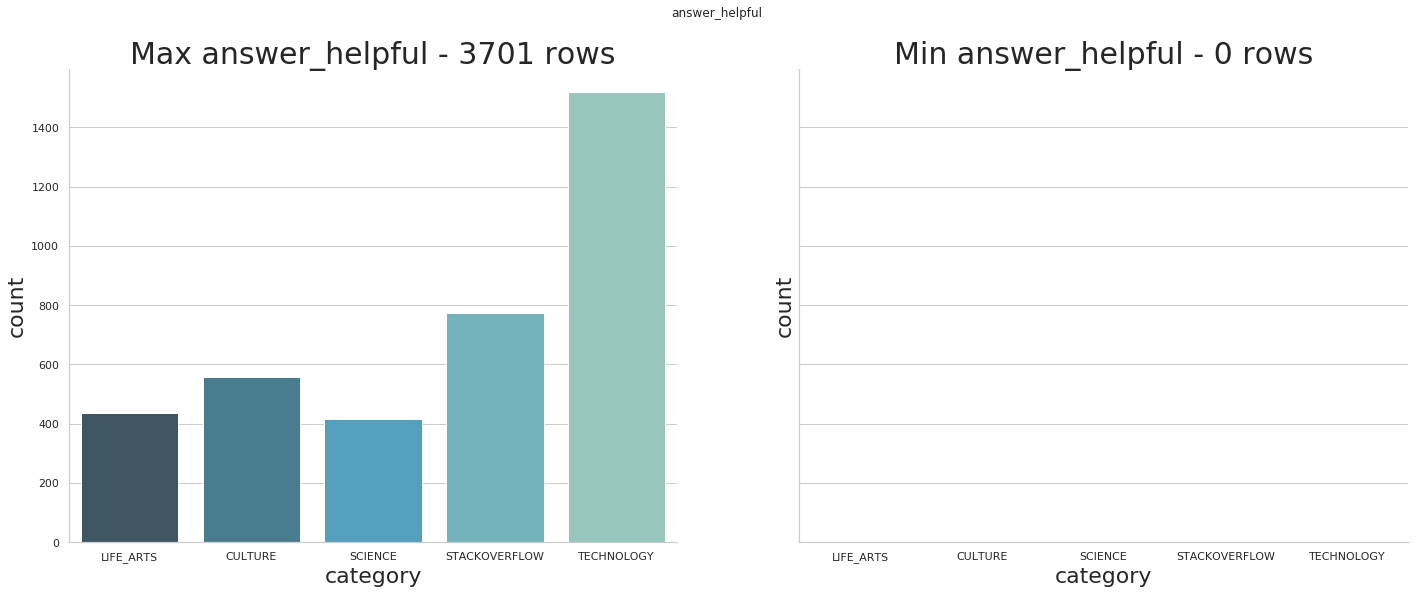

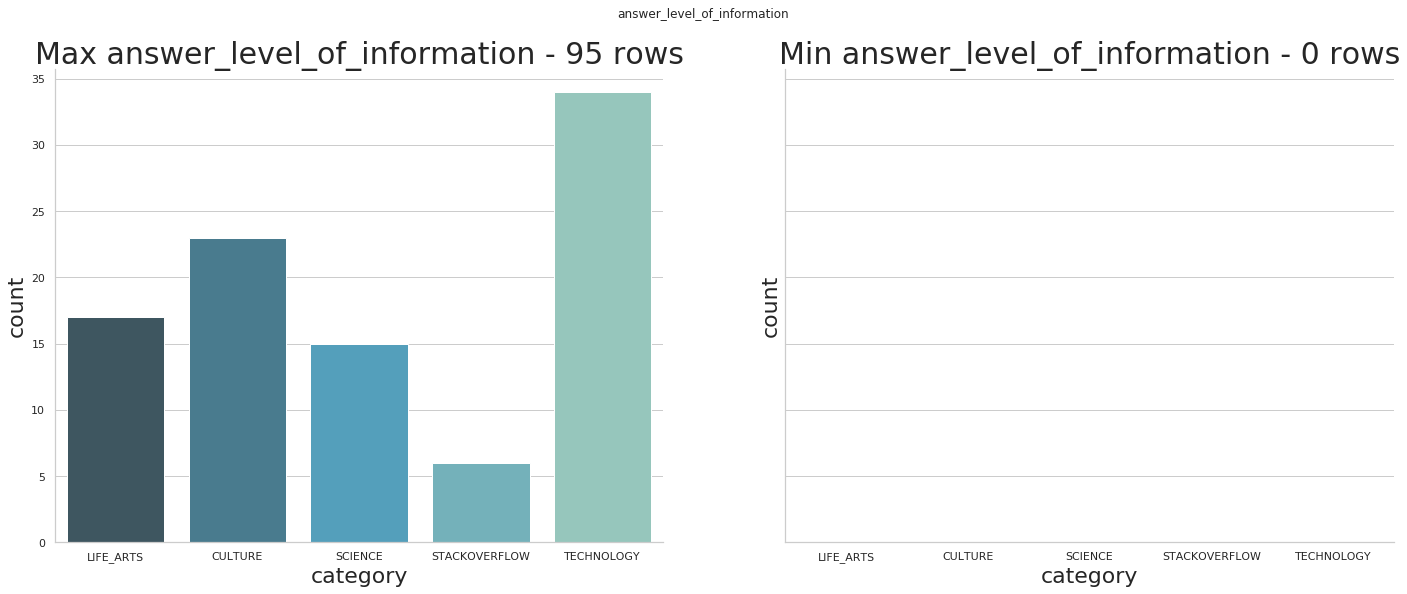

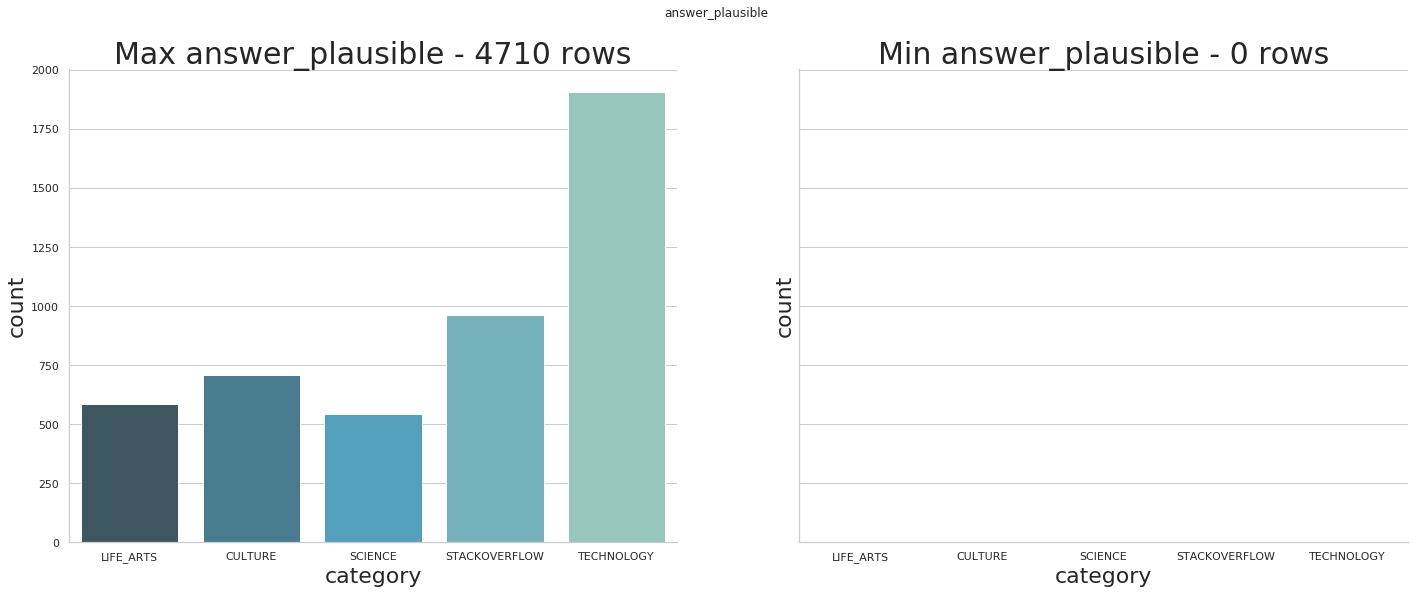

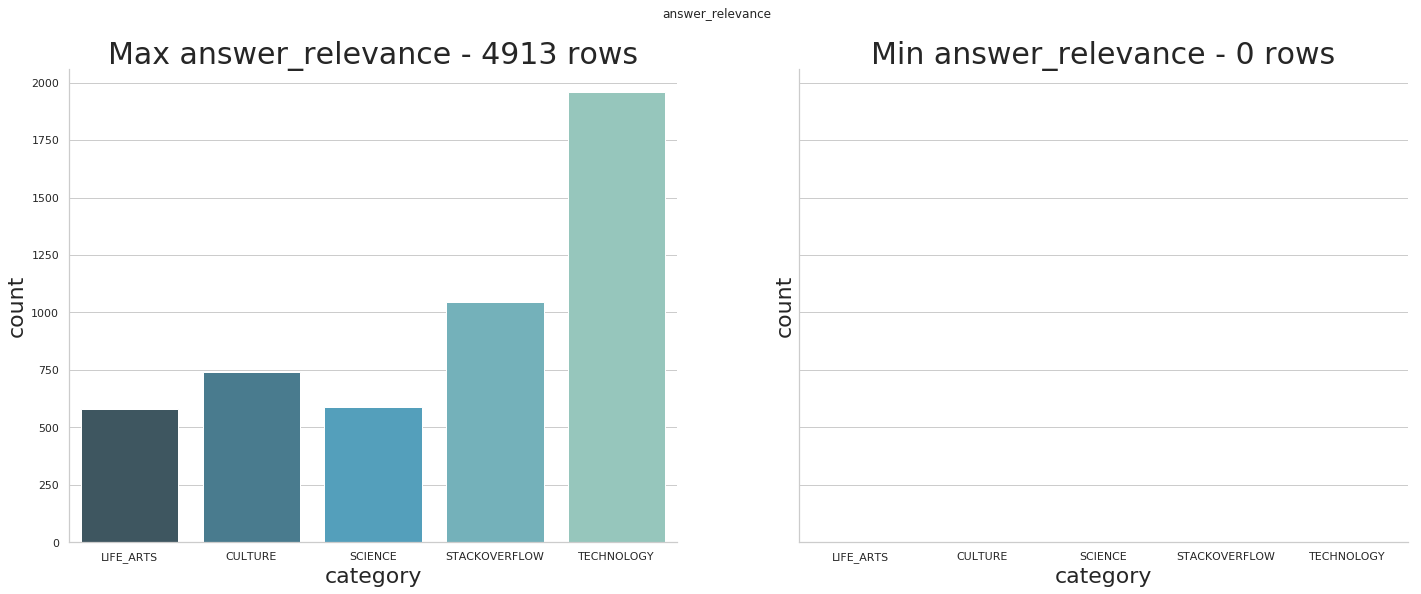

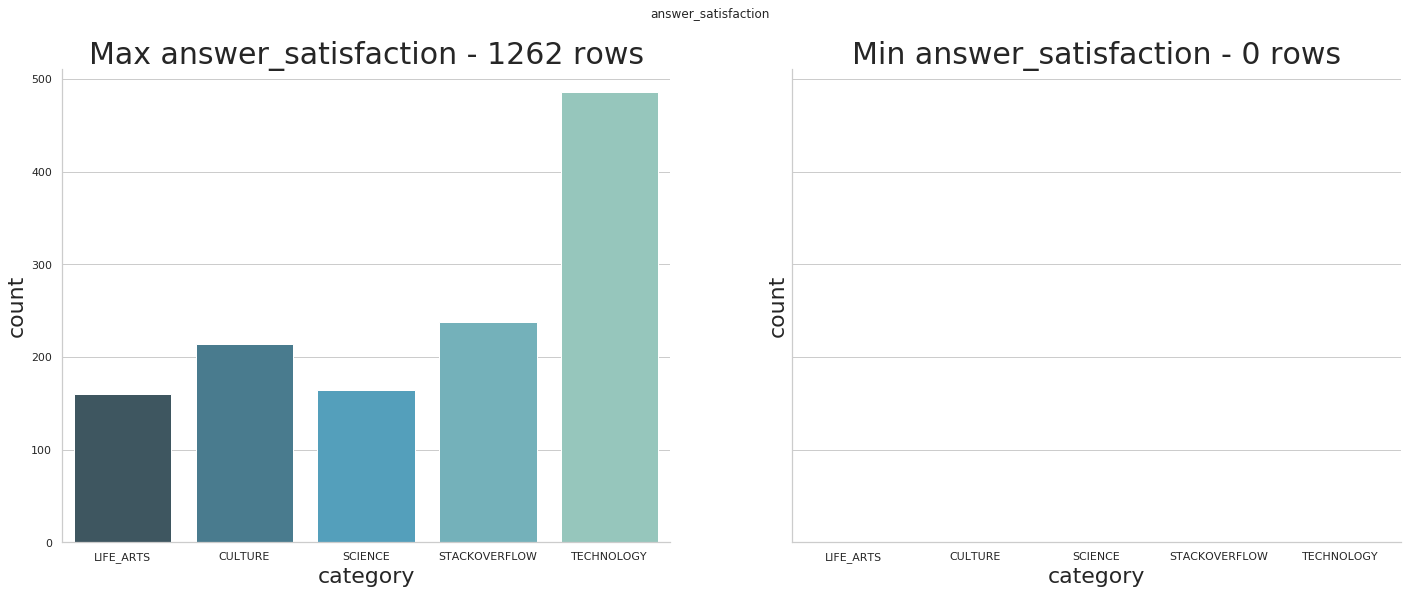

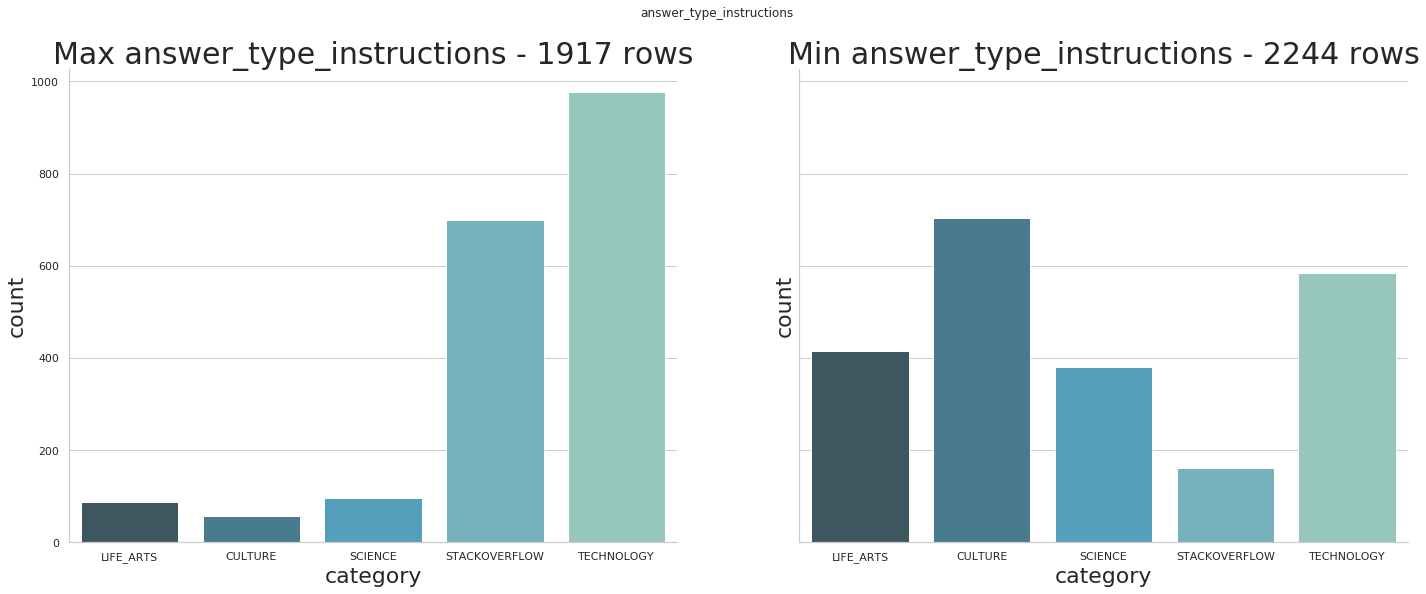

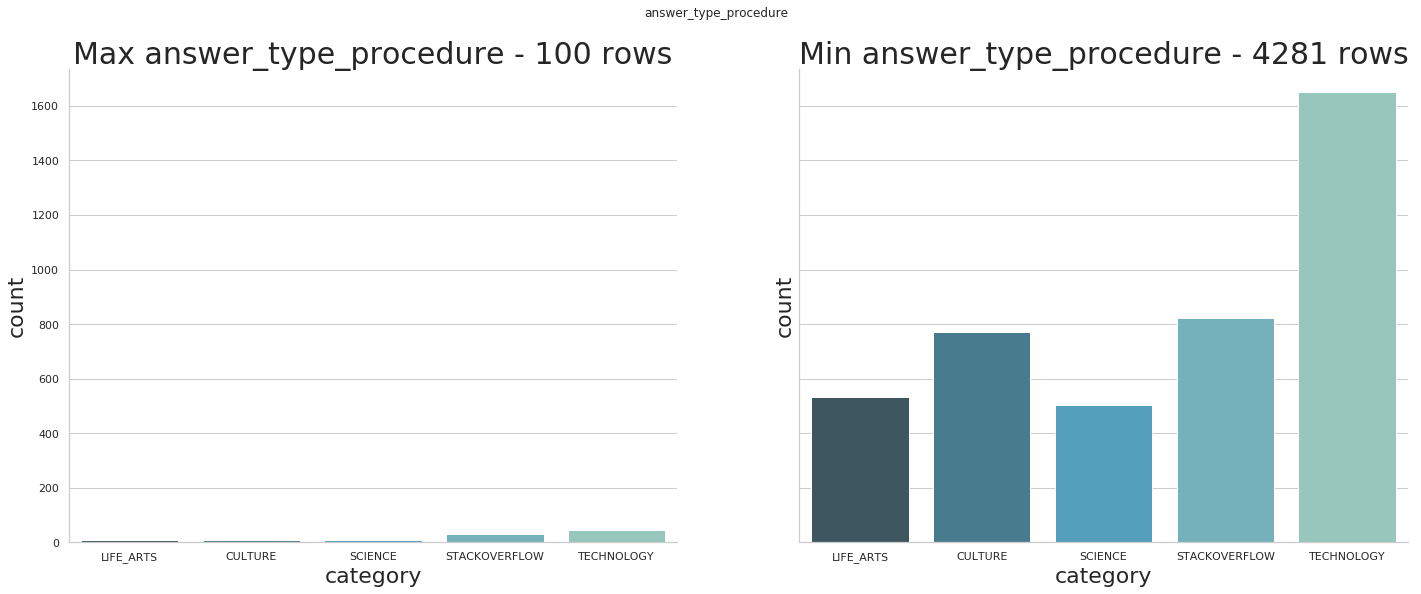

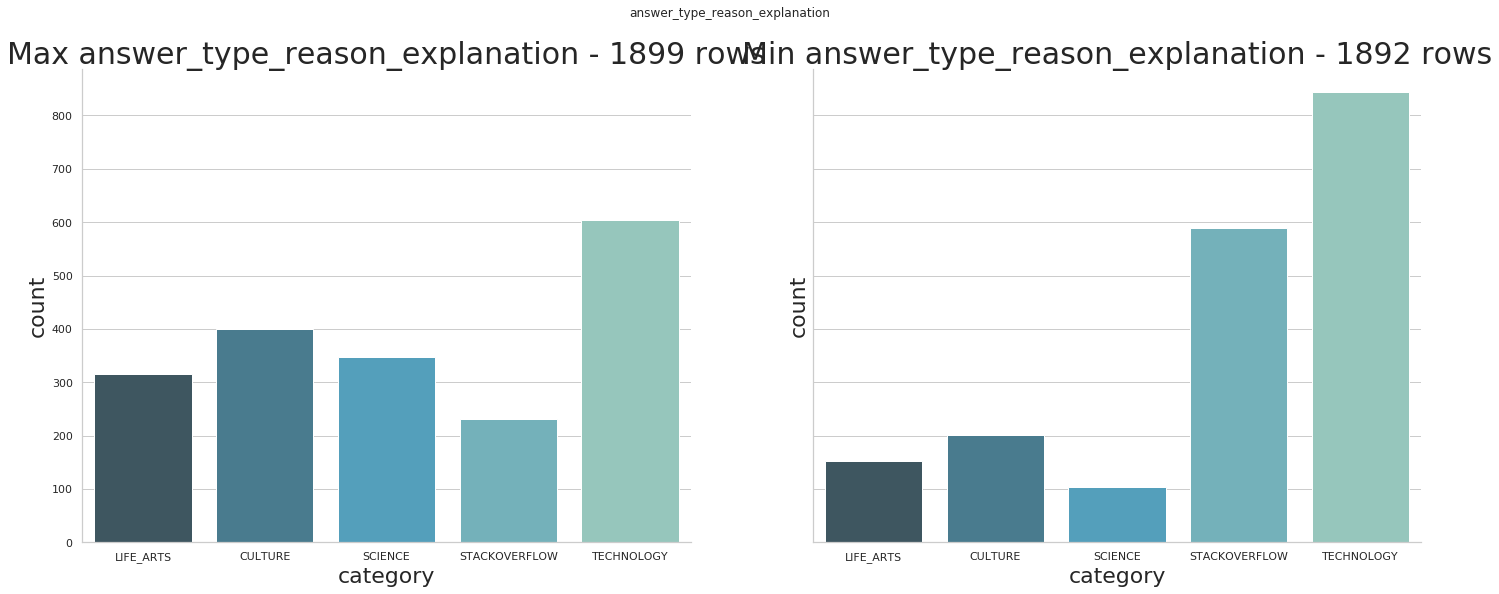

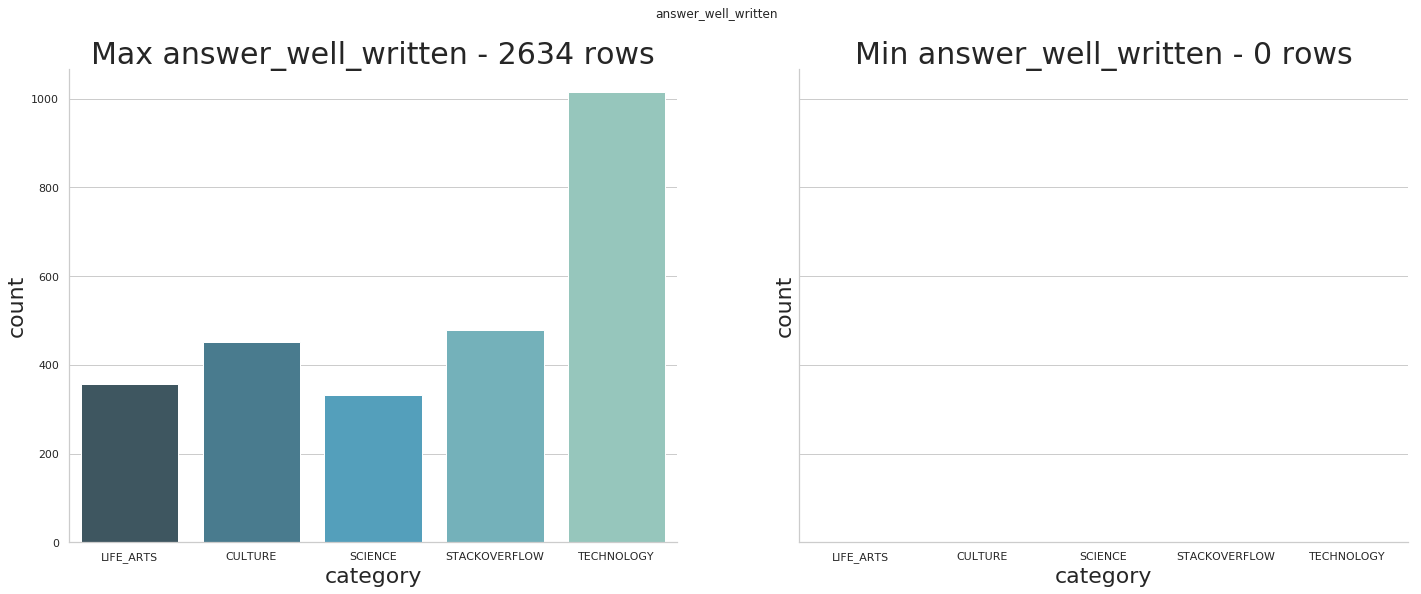

In [4]:
for col in answer_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]
    if (len(max_set) > 0) or (len(min_set) > 0):
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(24, 8.7))
        fig.suptitle(col) 
        sns.countplot(x="category", data=max_set, palette="GnBu_d", order=category_cols, ax=ax1).set_title('Max %s - %d rows' % (col, len(max_set)))
        sns.countplot(x="category", data=min_set, palette="GnBu_d", order=category_cols, ax=ax2).set_title('Min %s - %d rows' % (col, len(min_set)))
        sns.despine()
        plt.show()

# Question score analysis (host)

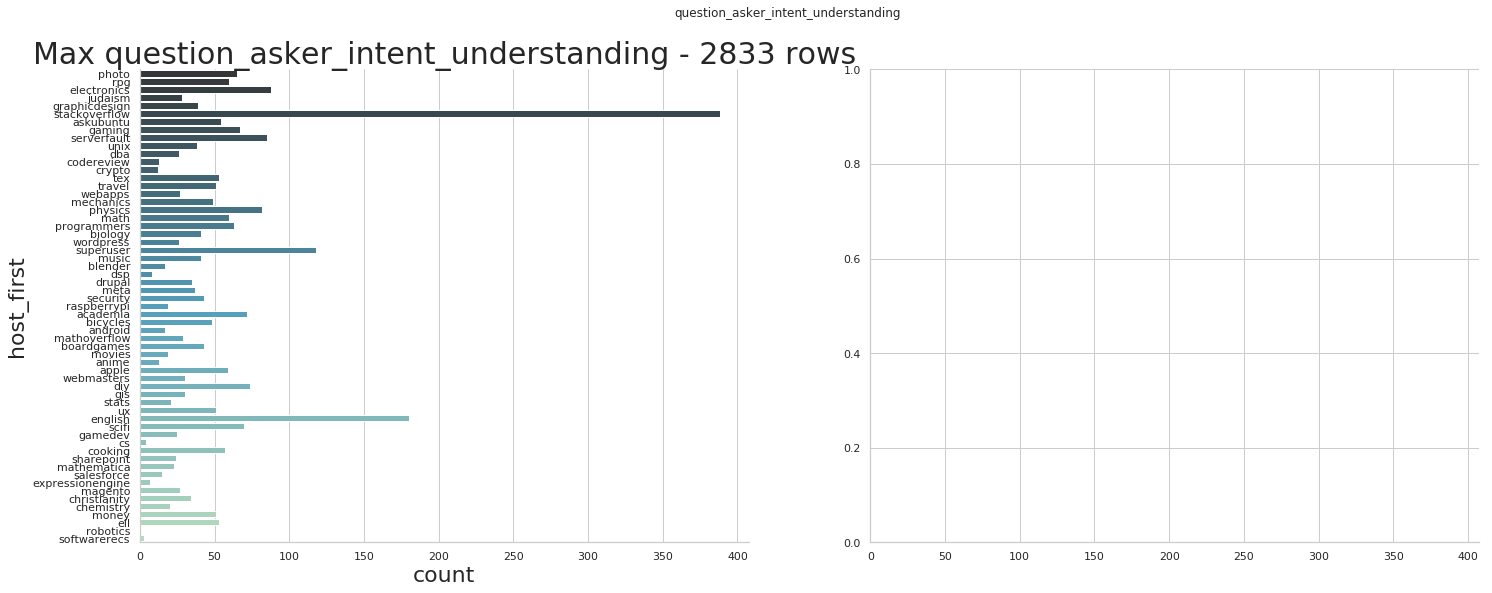

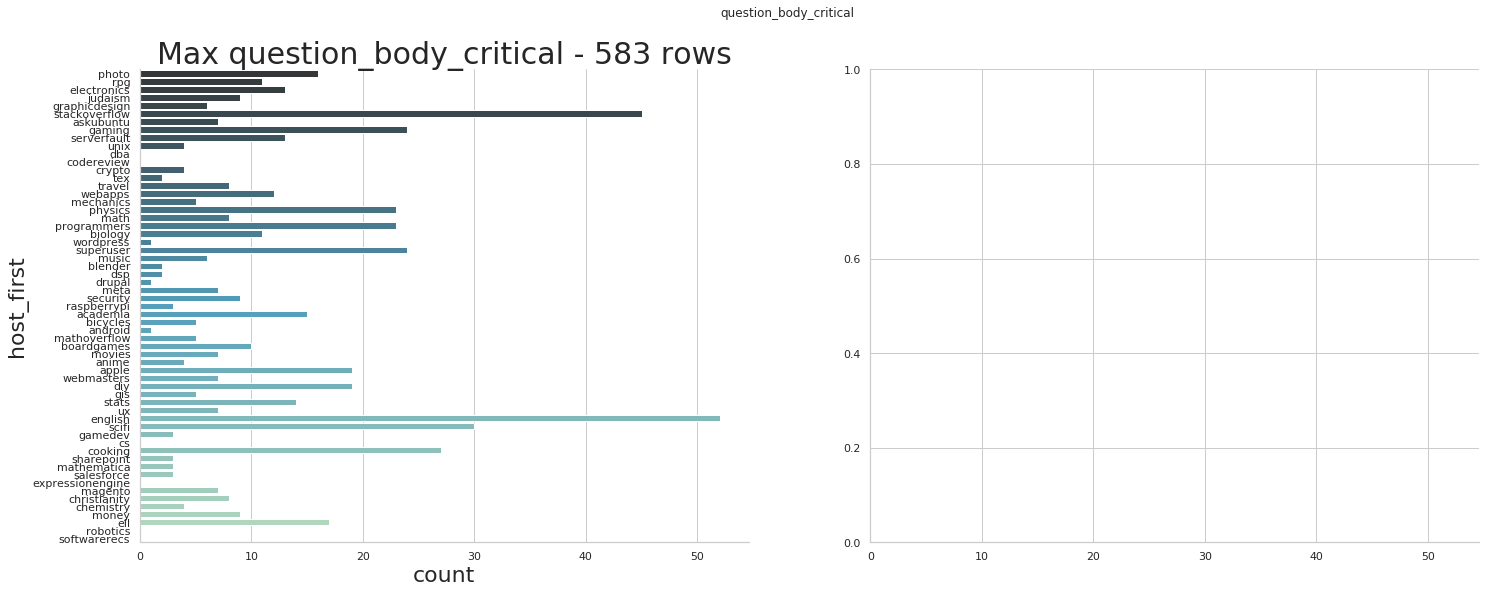

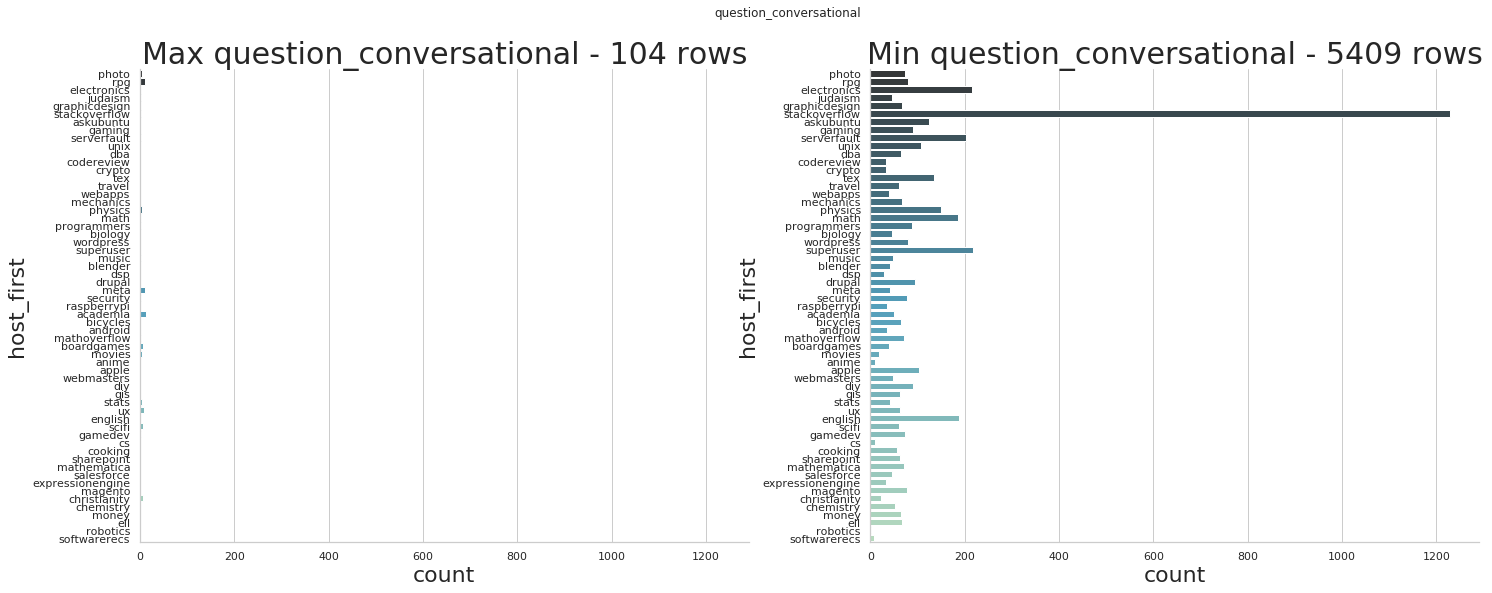

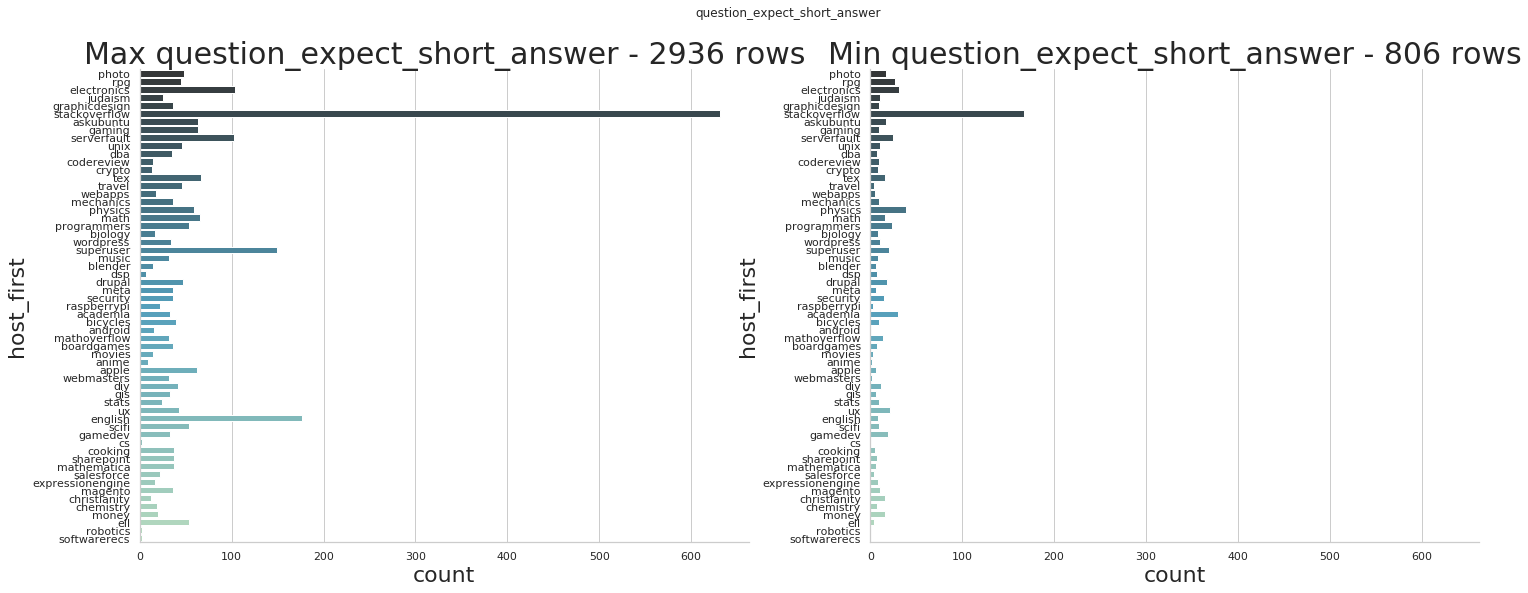

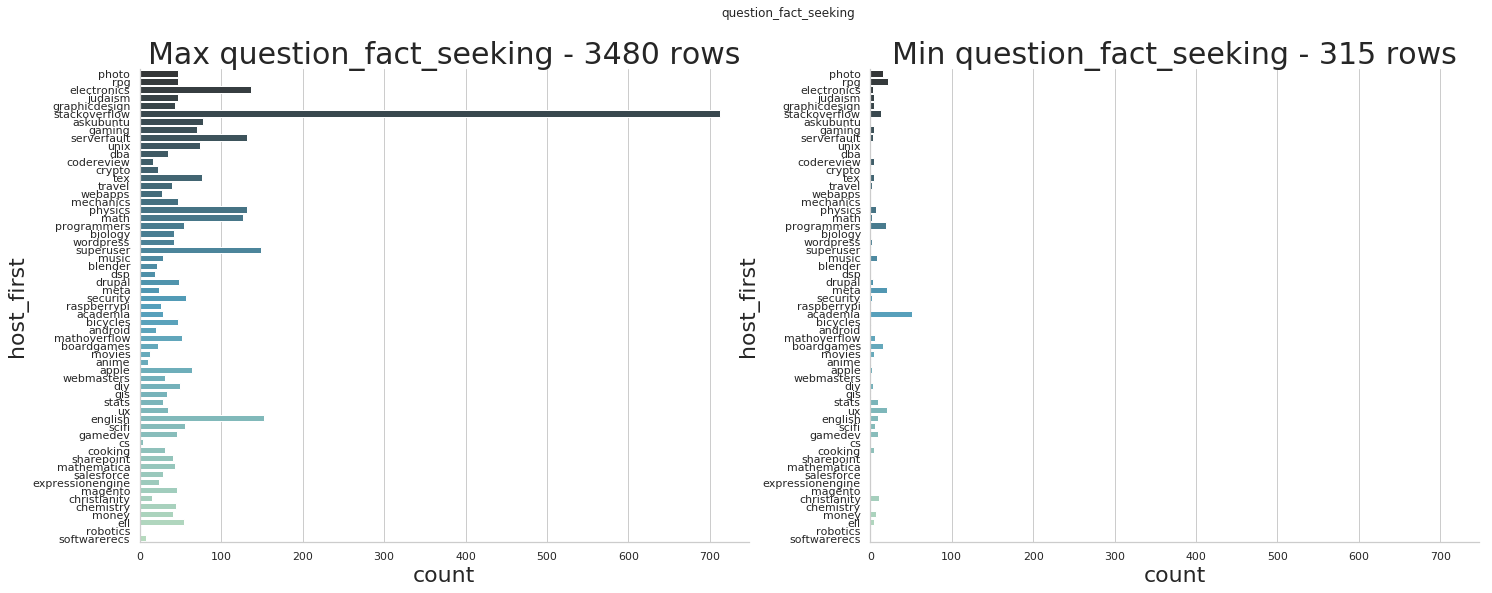

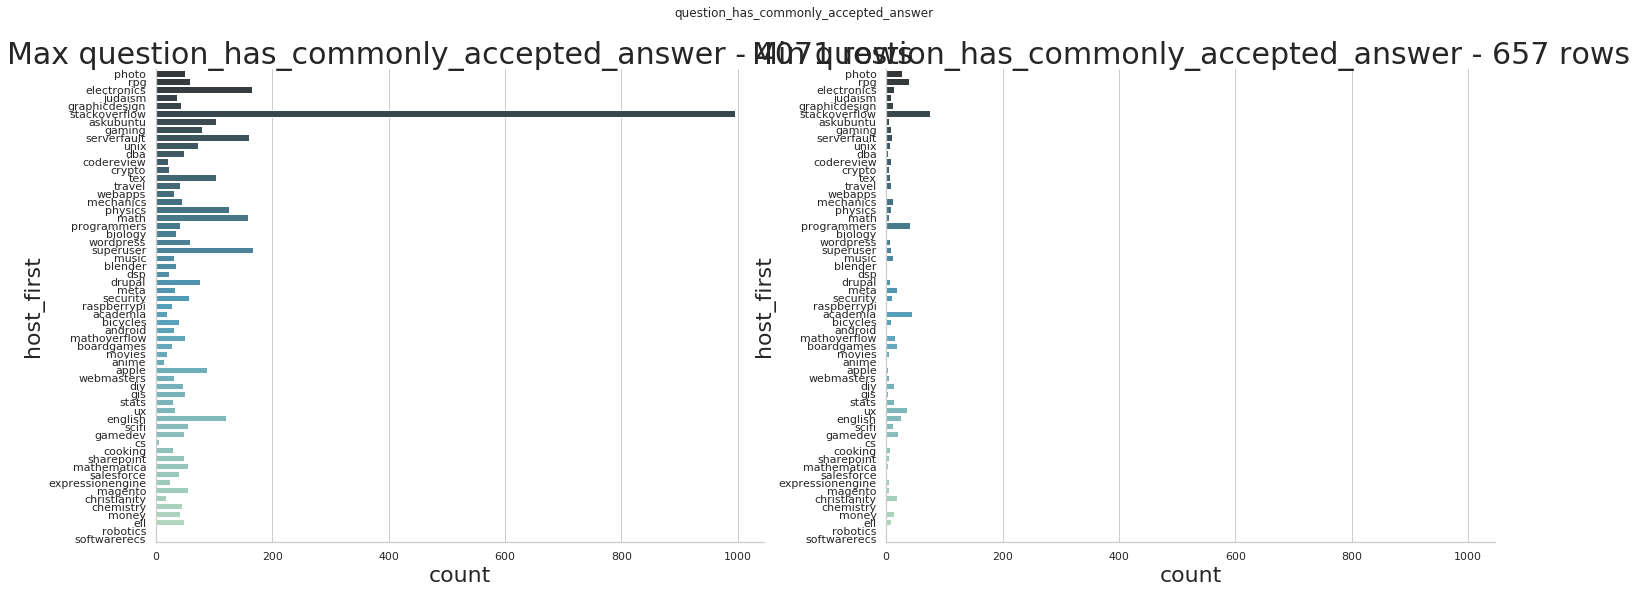

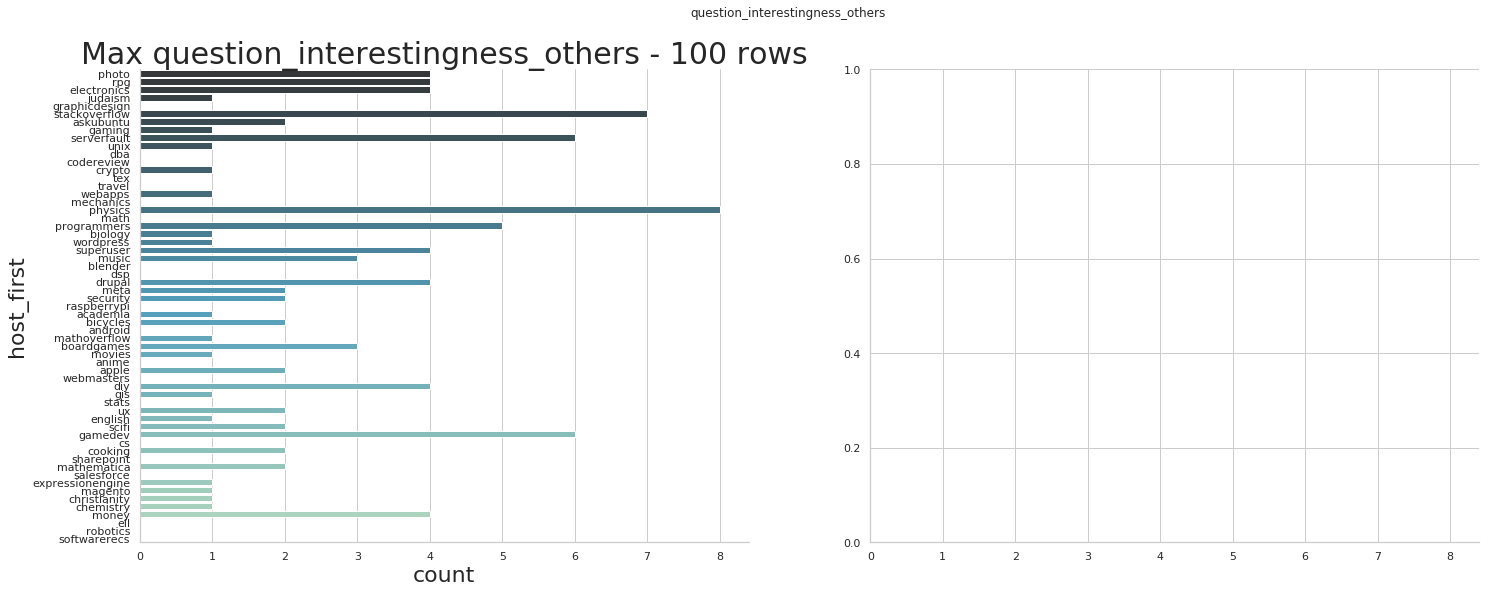

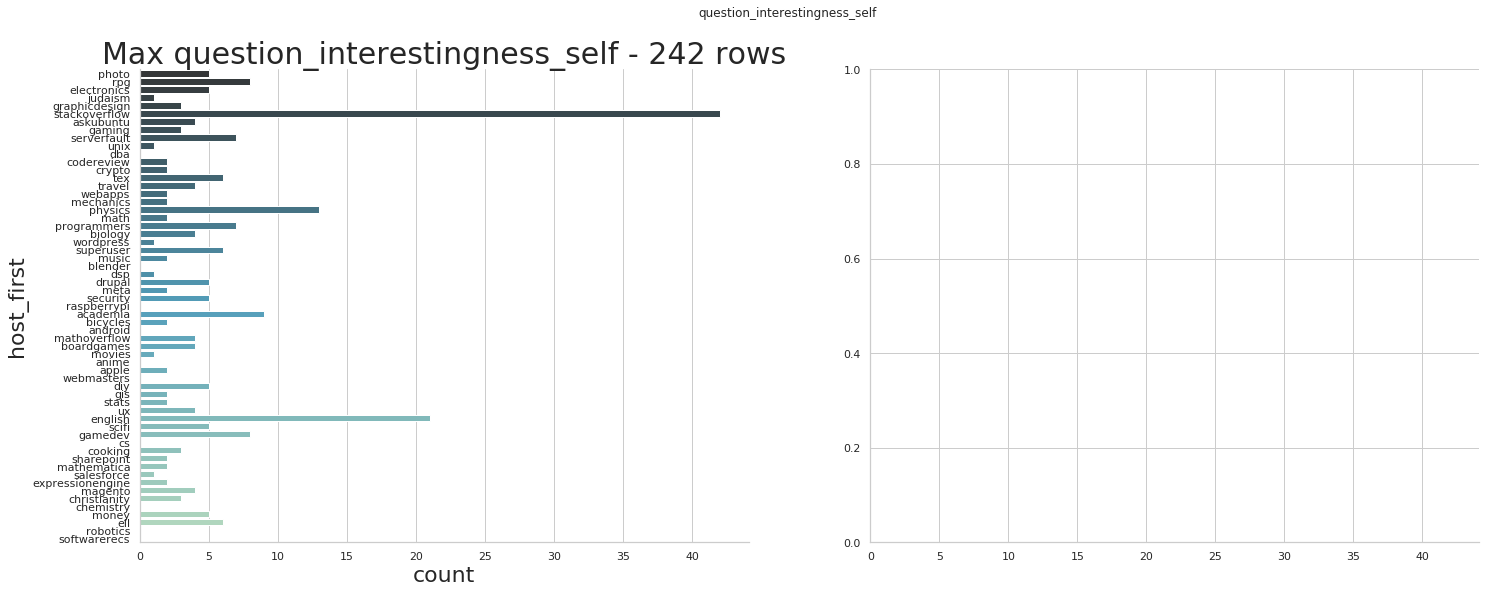

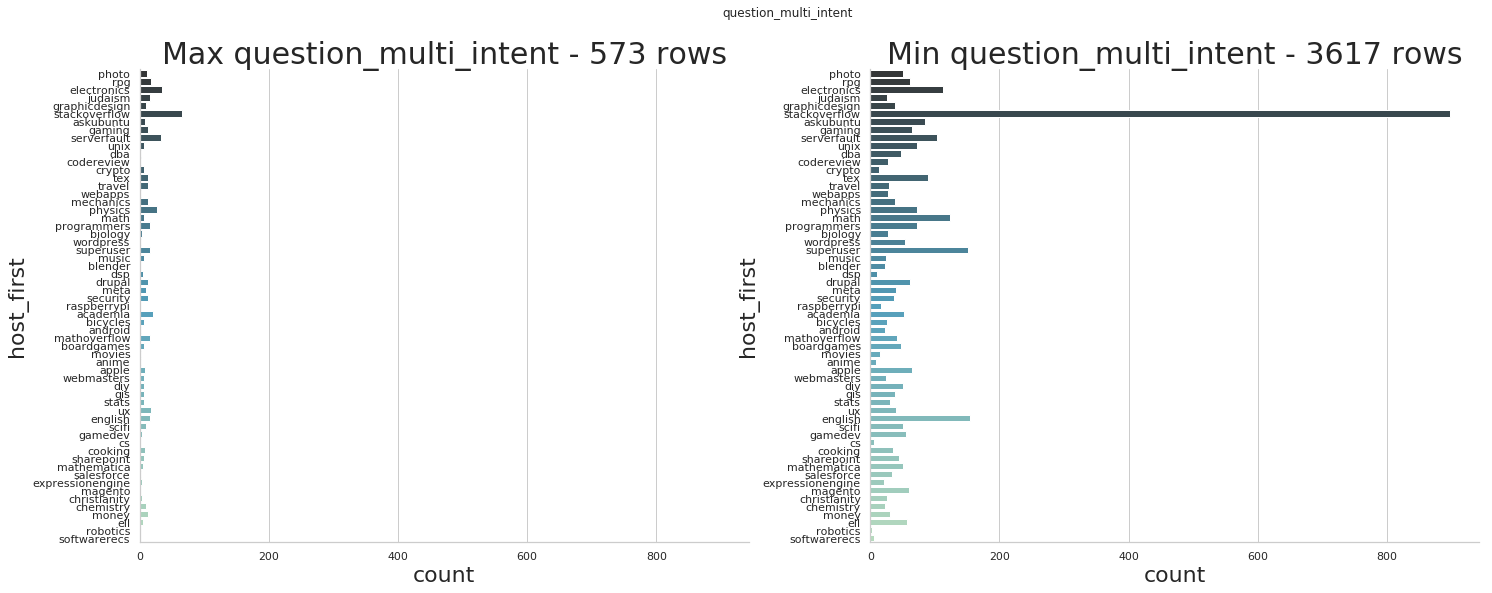

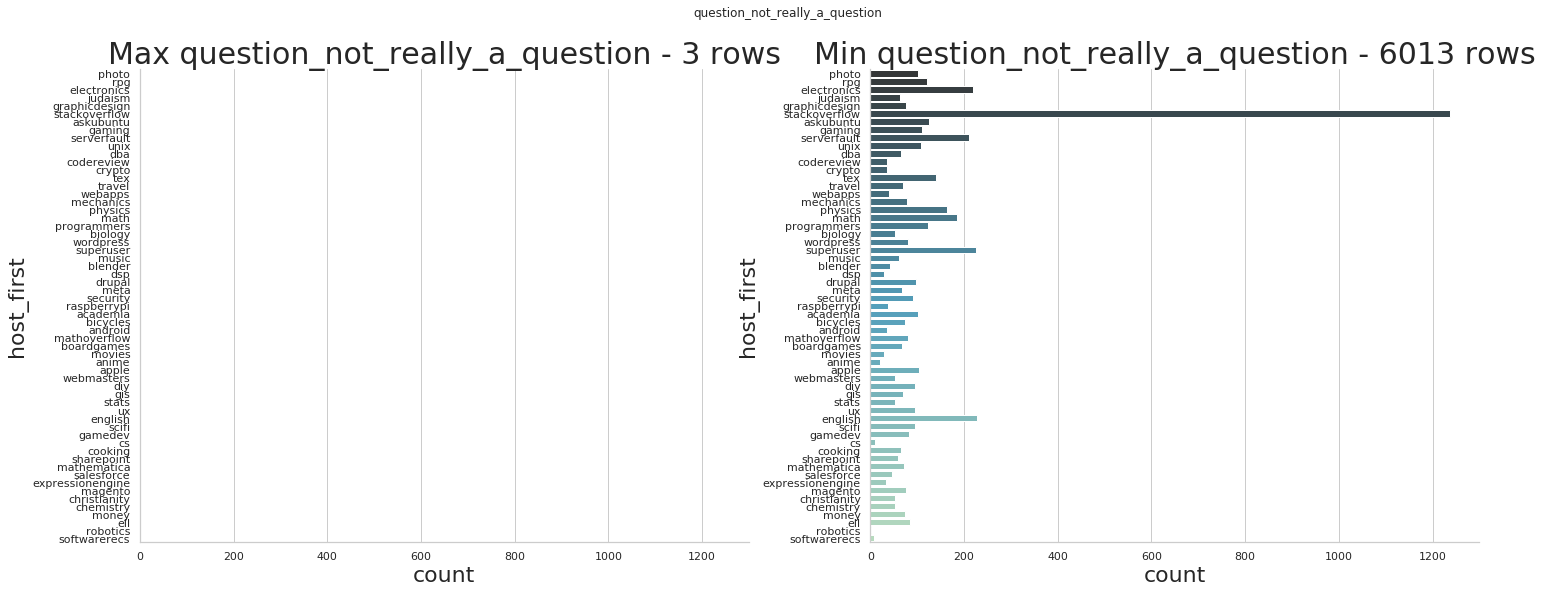

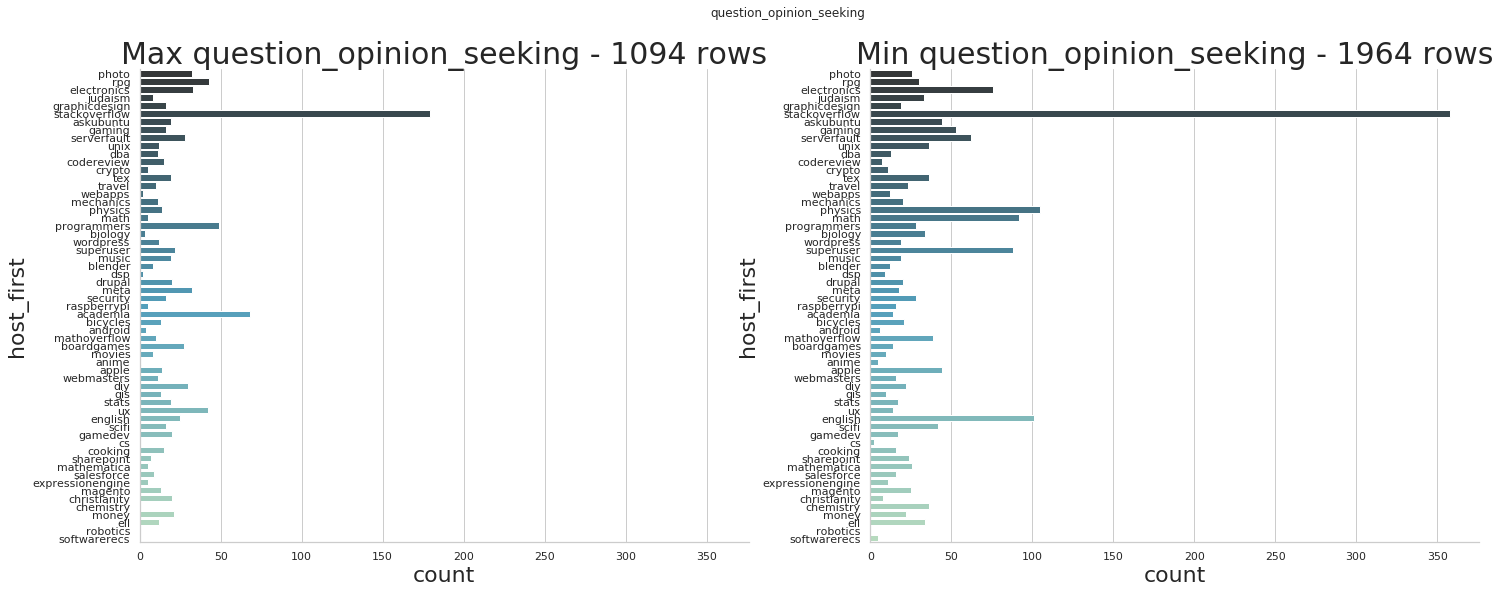

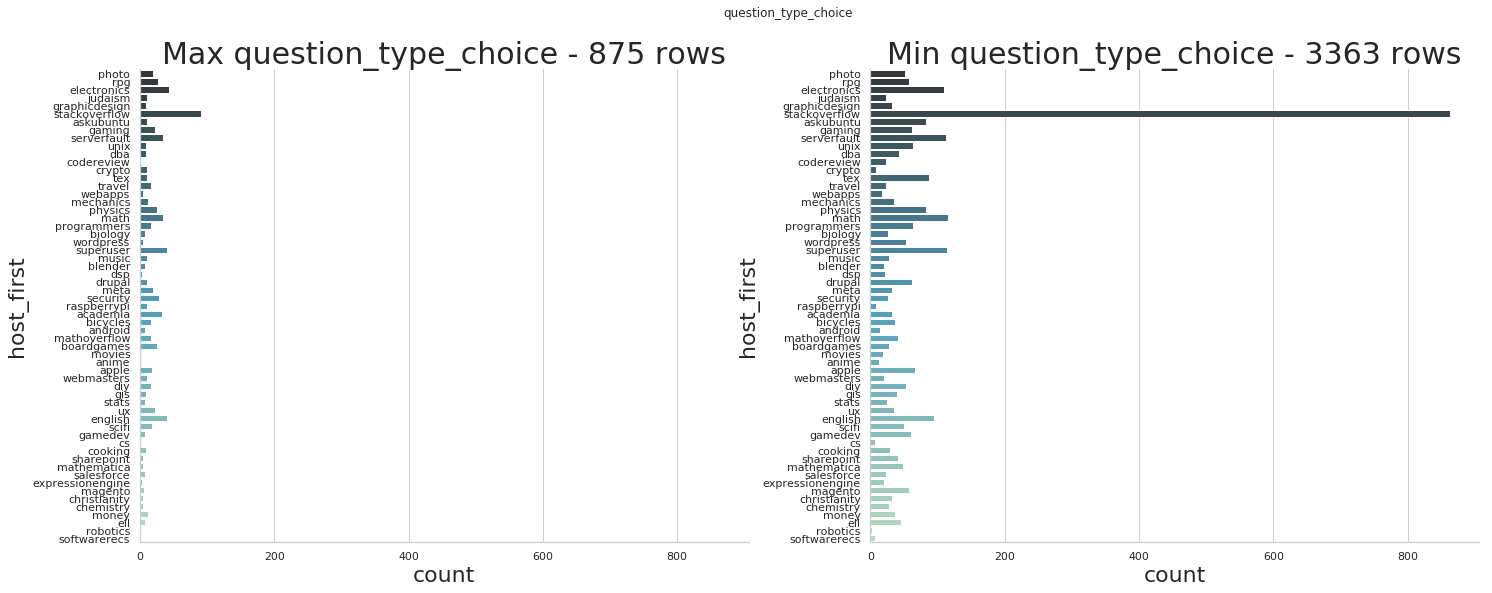

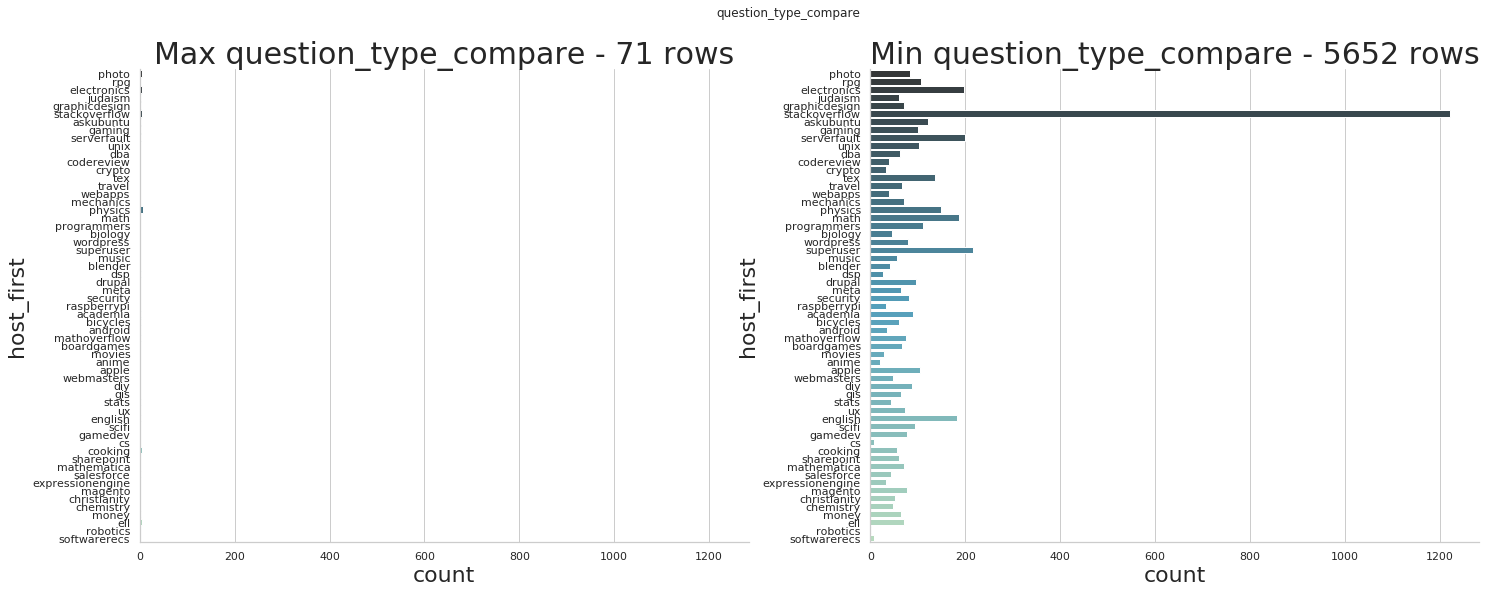

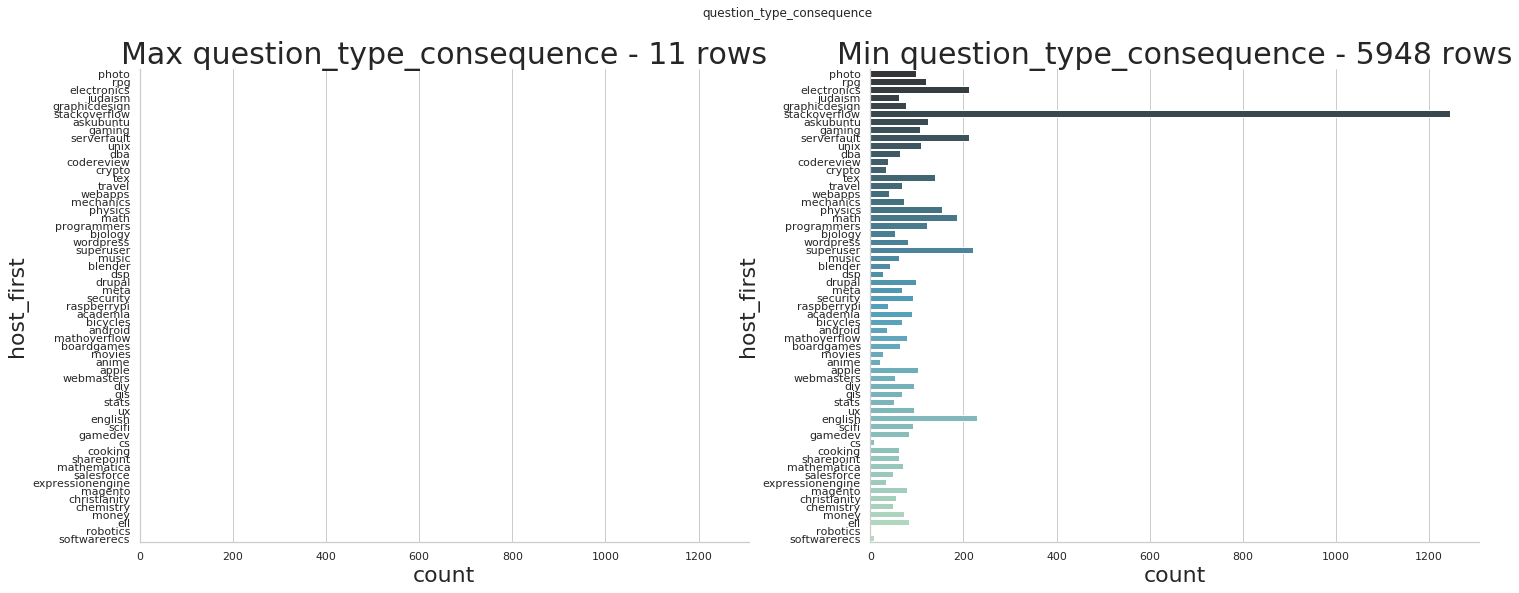

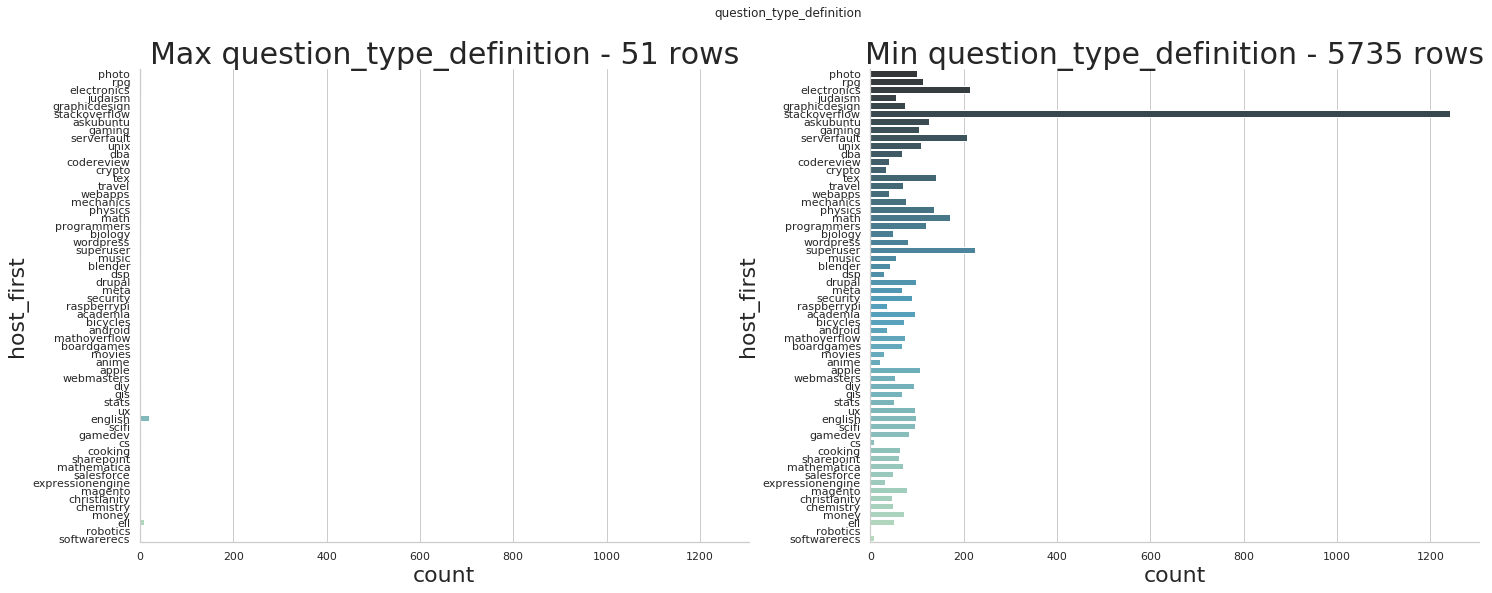

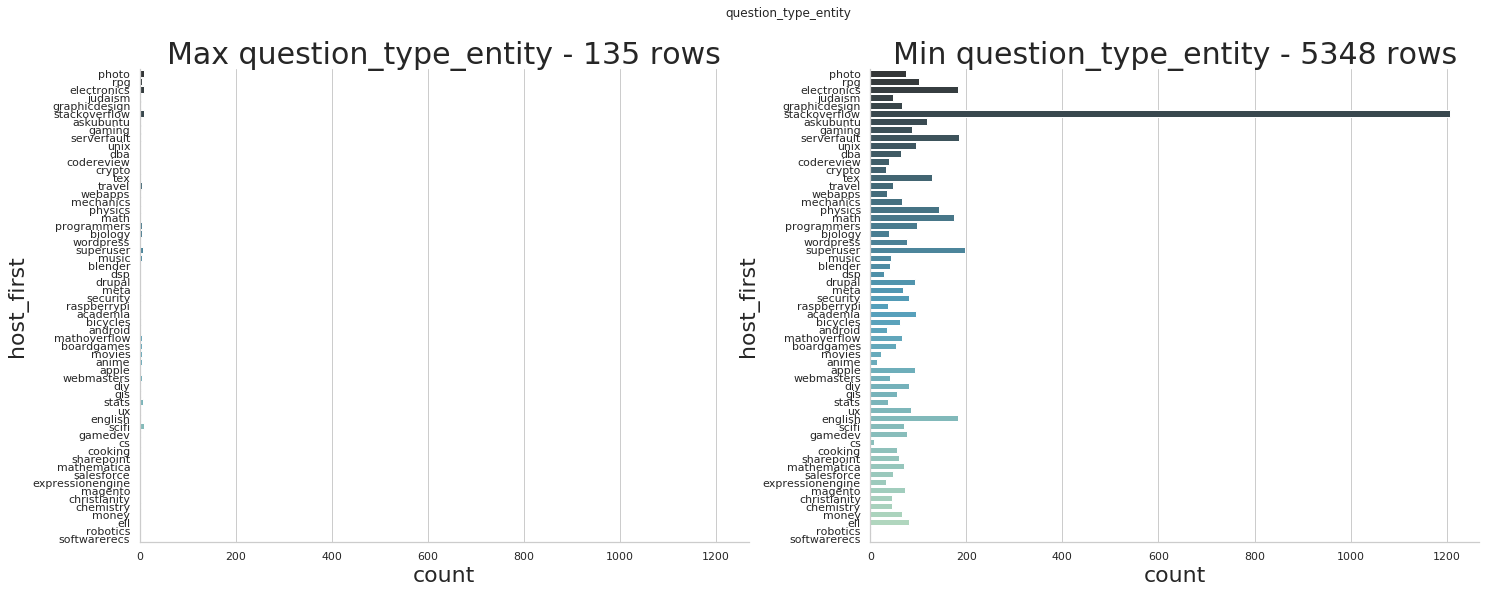

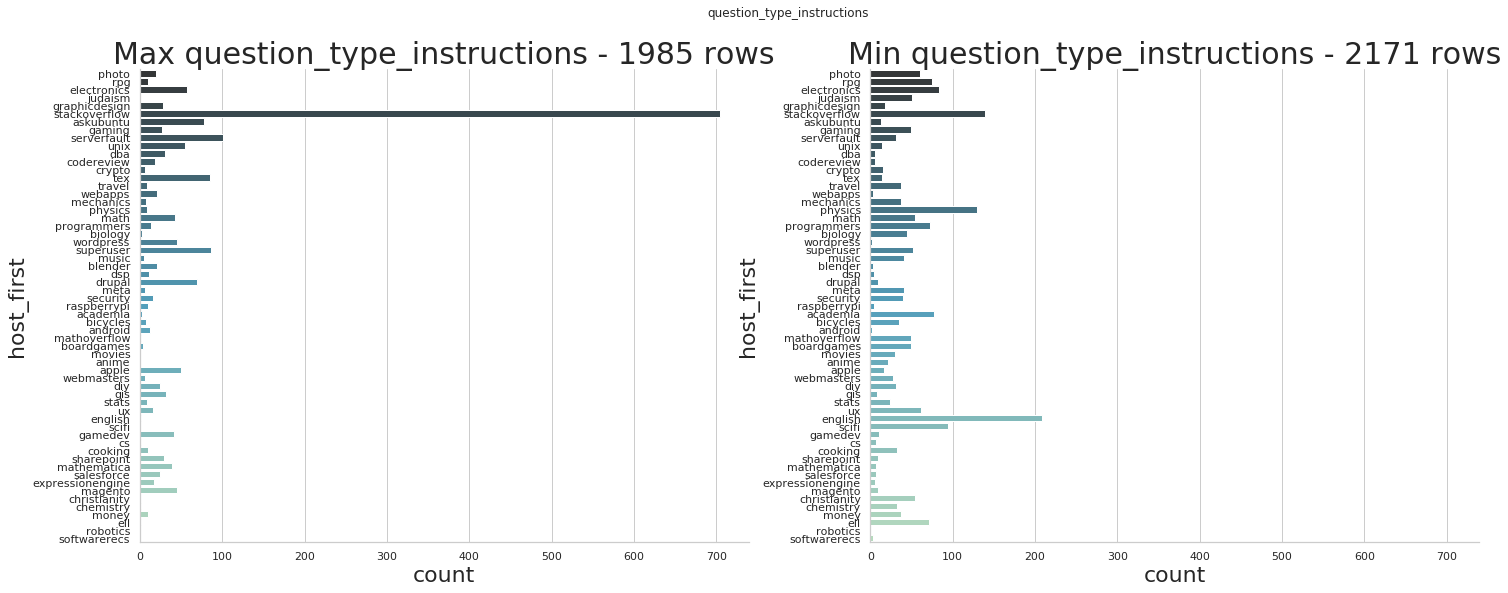

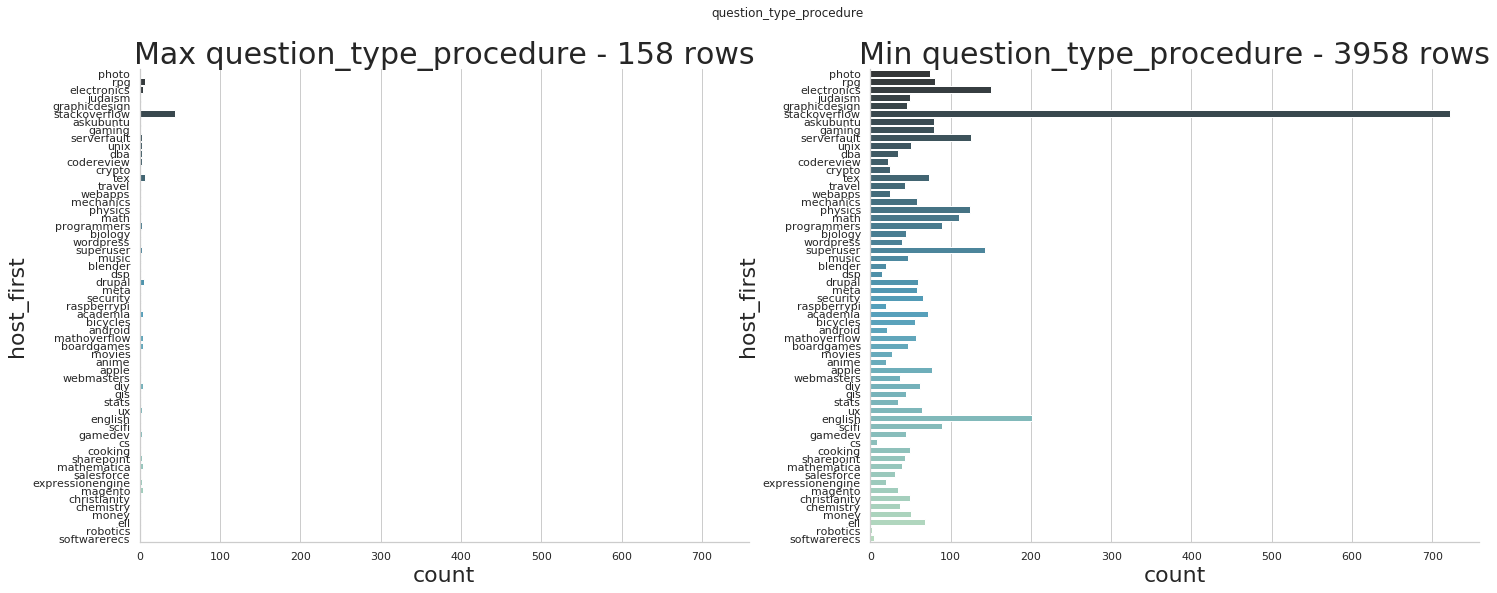

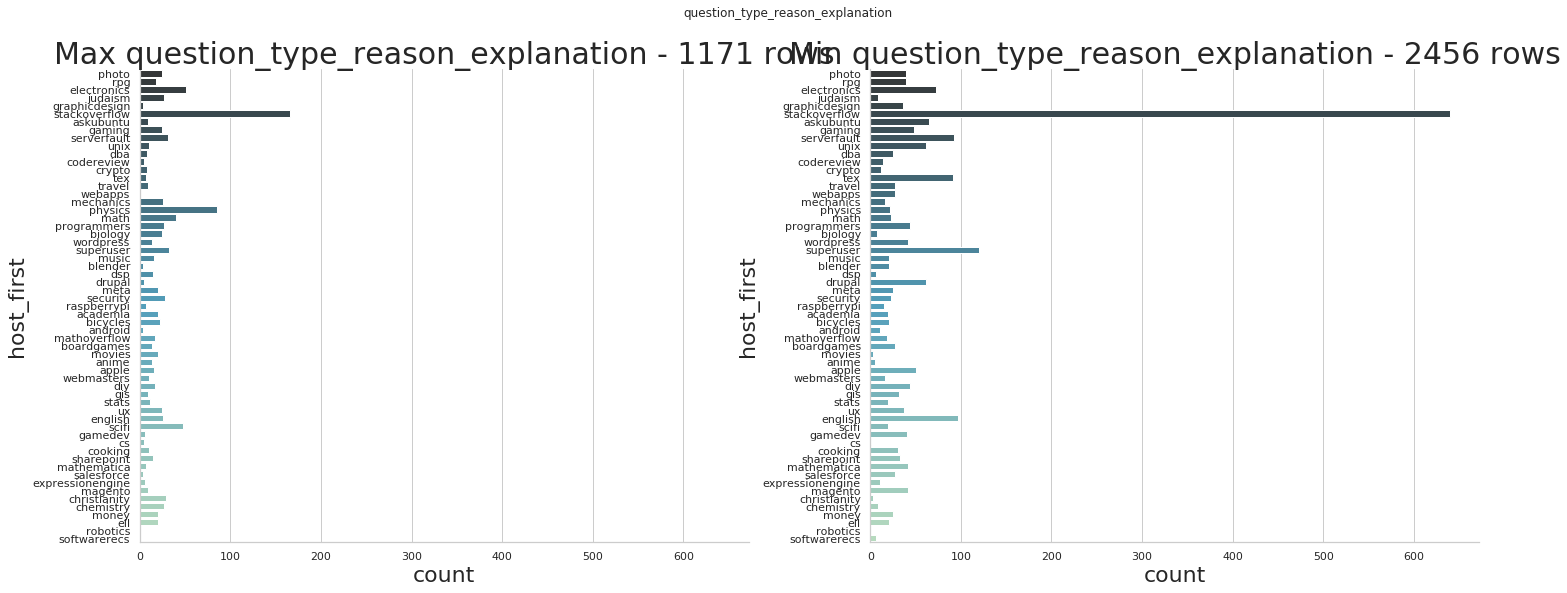

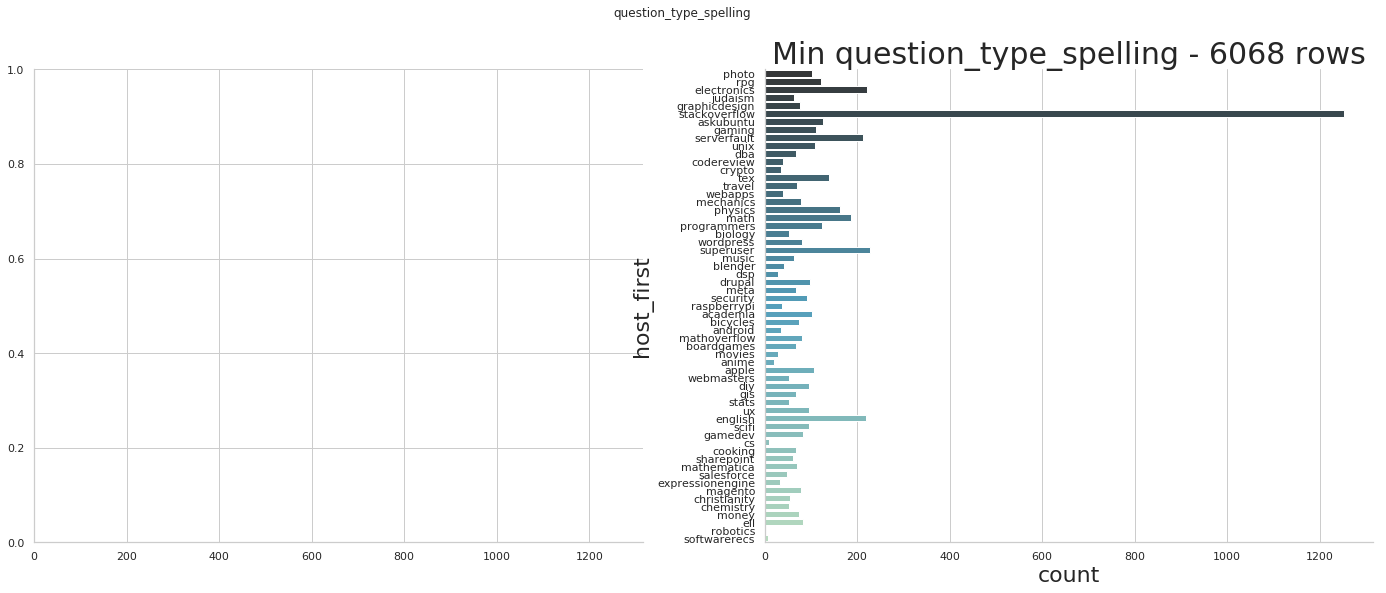

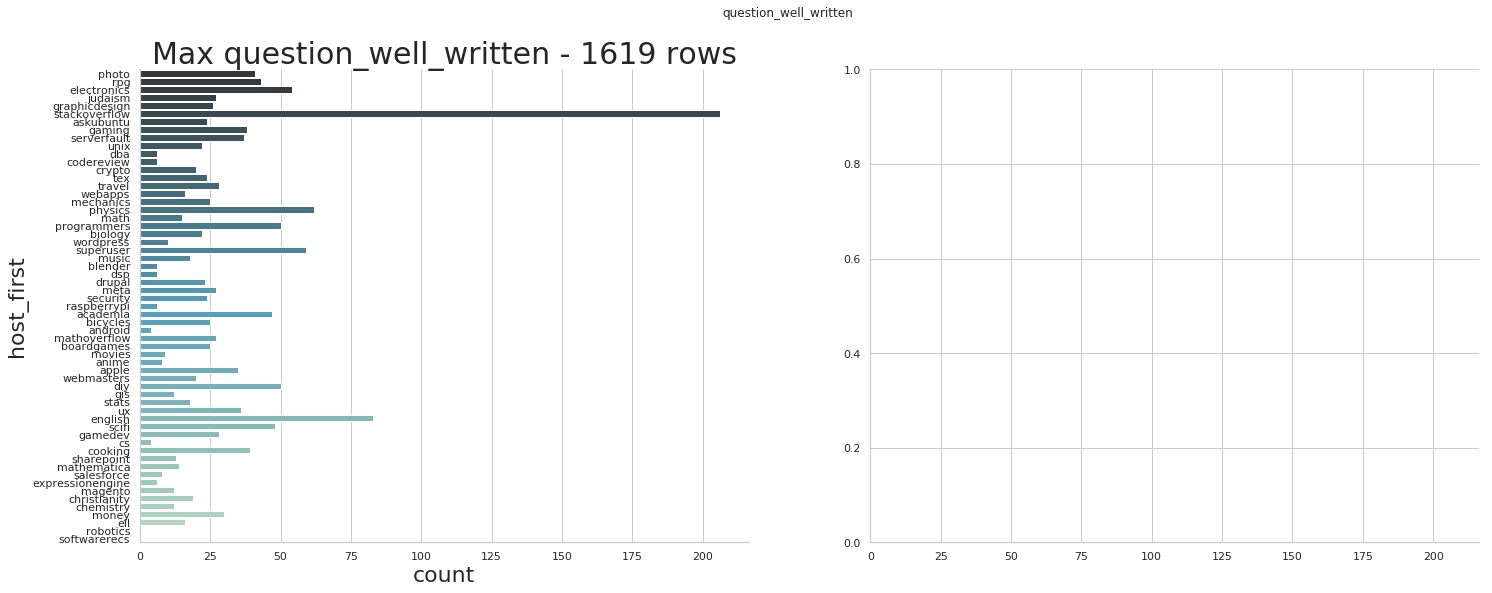

In [5]:
train['host_first'] = train['host'].apply(lambda x : x.split('.')[0])
host_cols = train['host_first'].unique()

for col in question_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(24, 8.7))
    fig.suptitle(col) 
    if (len(max_set) > 0):
        sns.countplot(y="host_first", data=max_set, palette="GnBu_d", order=host_cols, ax=ax1).set_title('Max %s - %d rows' % (col, len(max_set)))
    if (len(min_set) > 0):
        sns.countplot(y="host_first", data=min_set, palette="GnBu_d", order=host_cols, ax=ax2).set_title('Min %s - %d rows' % (col, len(min_set)))
    sns.despine()
    plt.show()

# Answer score analysis (host)

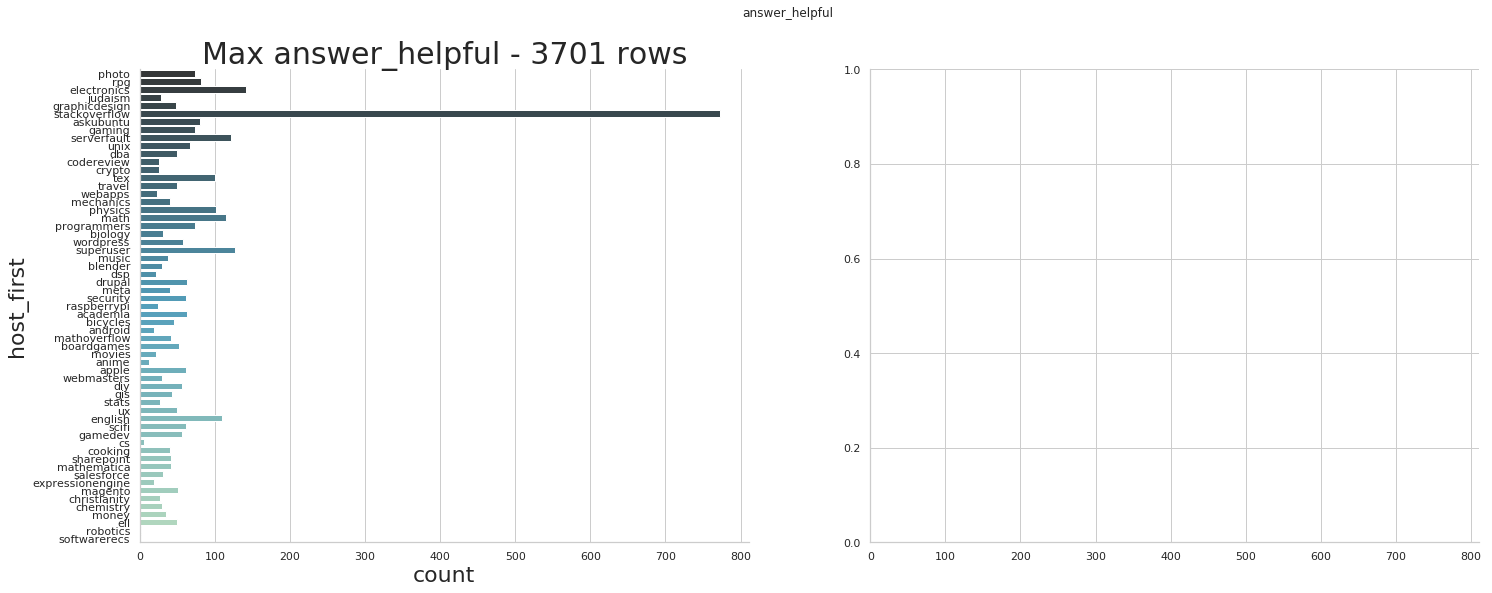

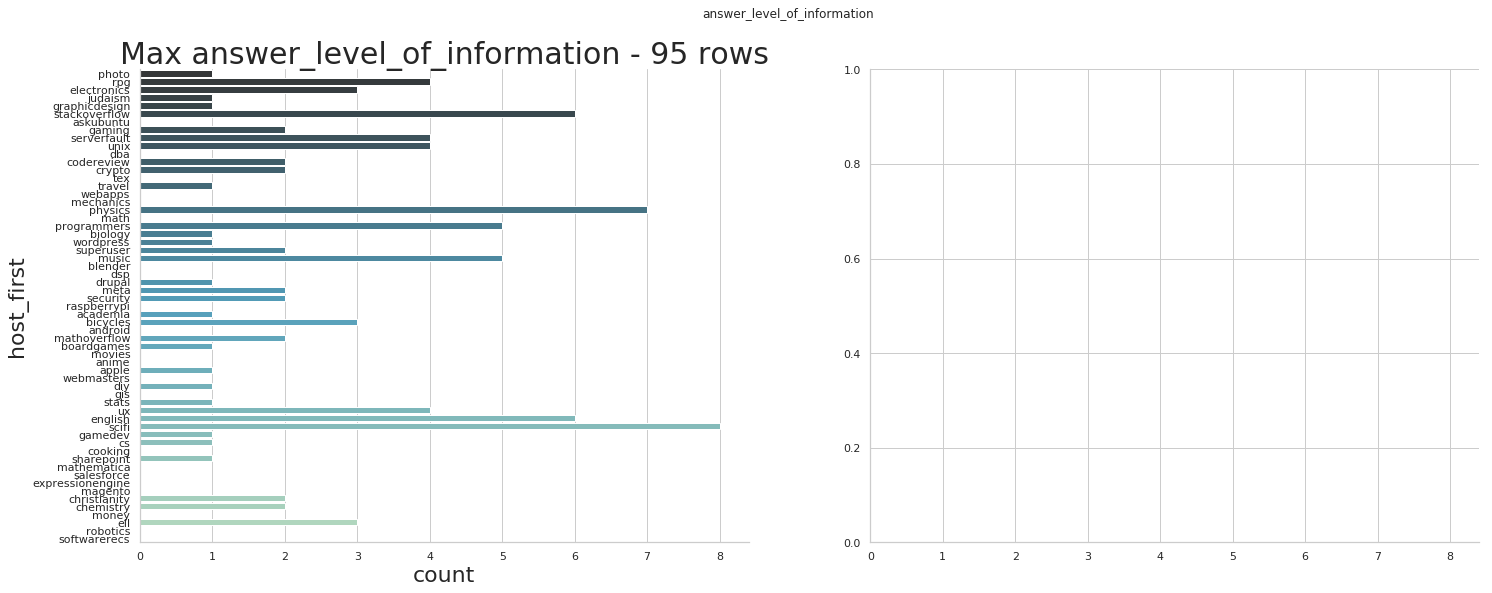

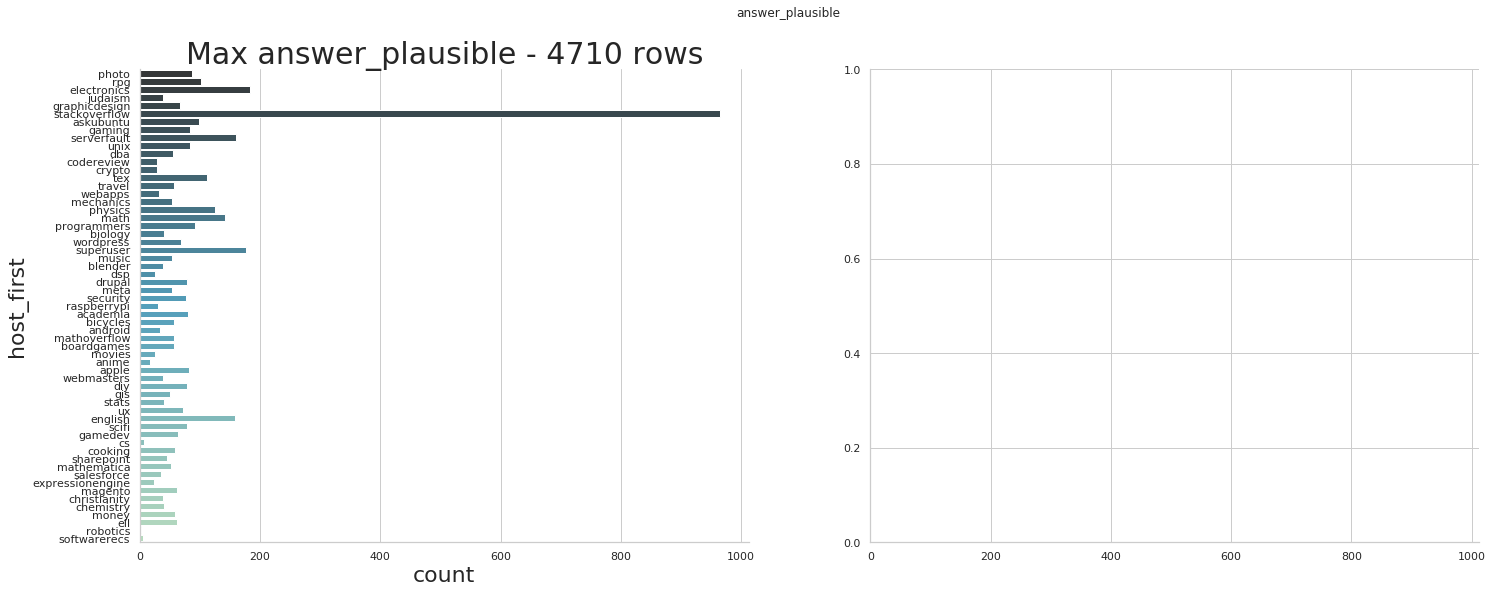

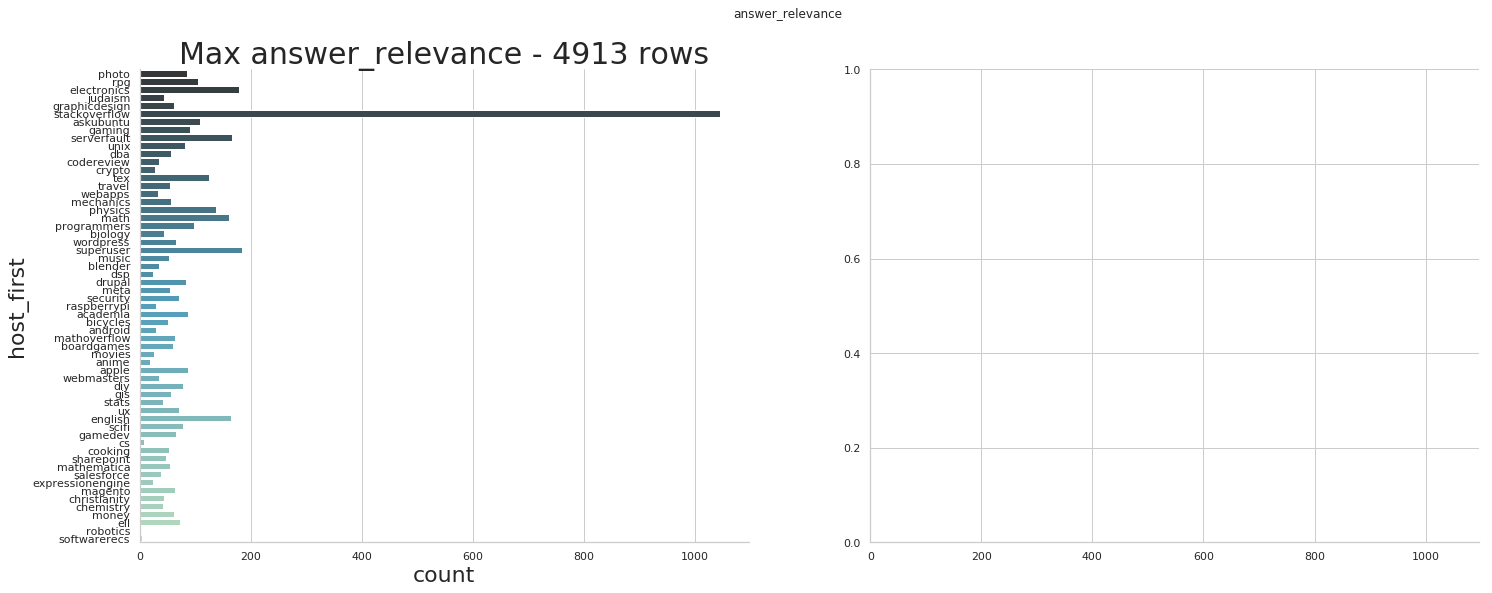

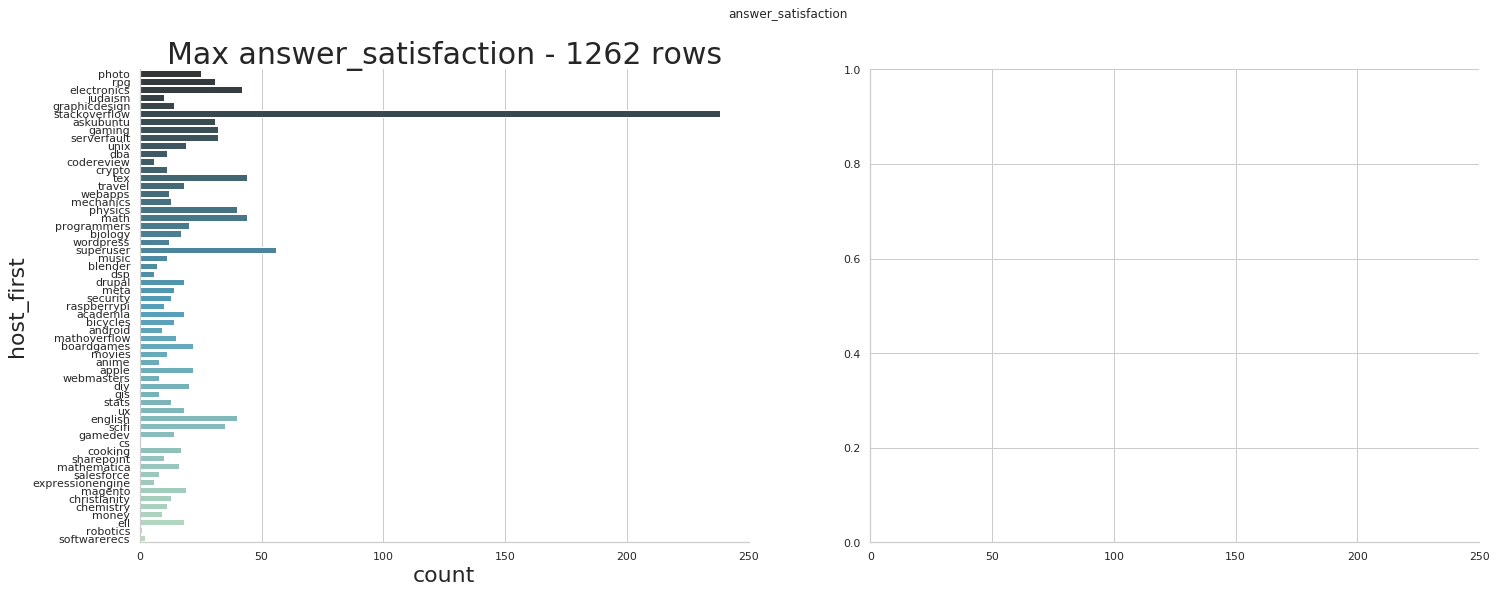

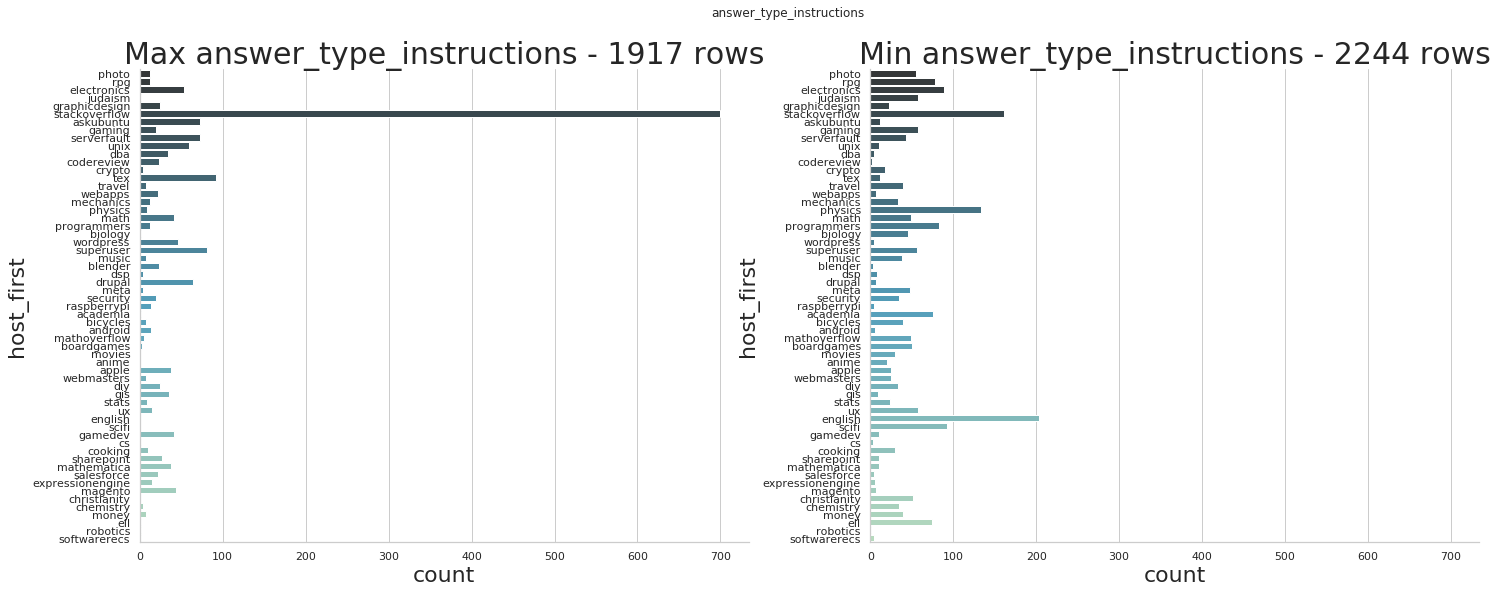

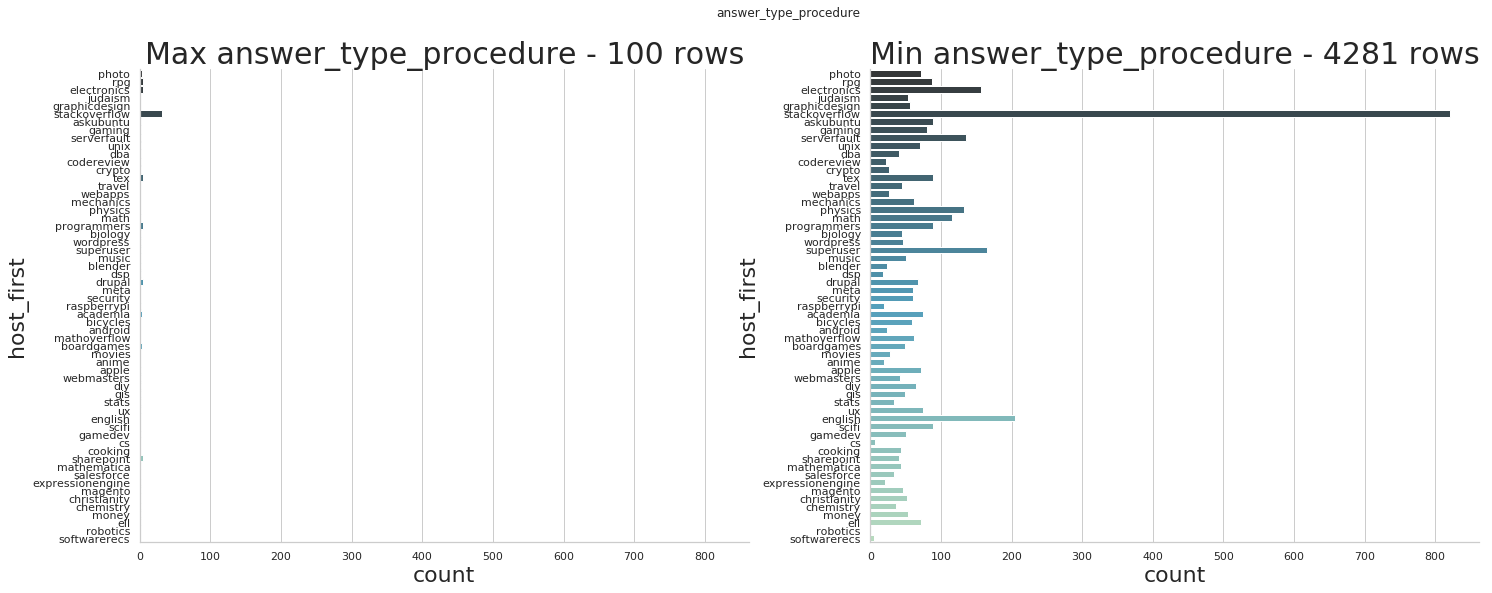

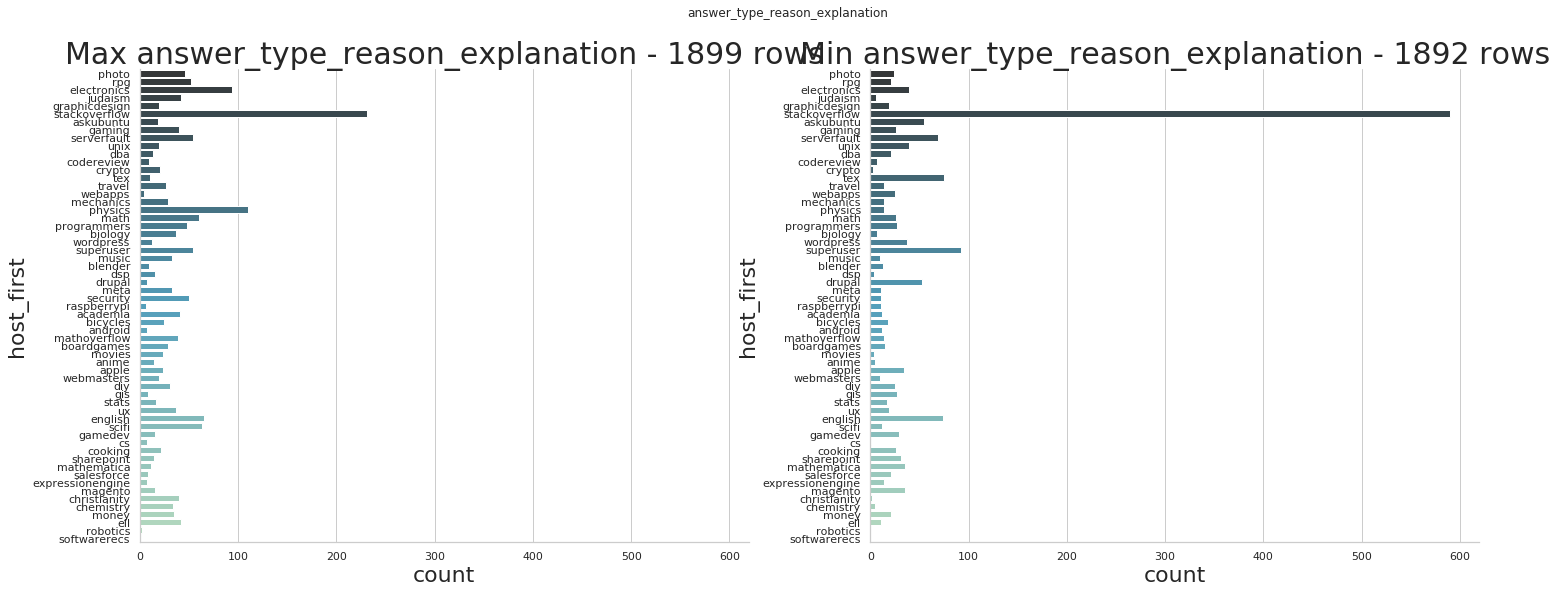

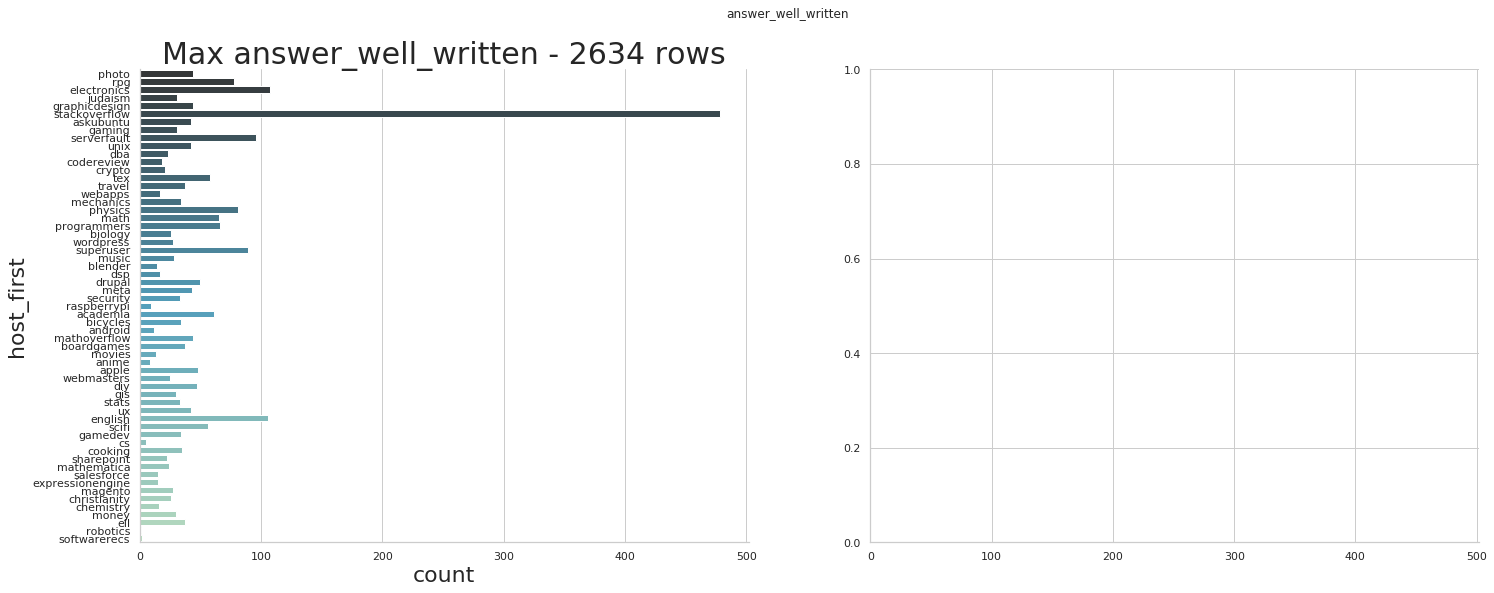

In [6]:
for col in answer_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(24, 8.7))
    fig.suptitle(col) 
    if (len(max_set) > 0):
        sns.countplot(y="host_first", data=max_set, palette="GnBu_d", order=host_cols, ax=ax1).set_title('Max %s - %d rows' % (col, len(max_set)))
    if (len(min_set) > 0):
        sns.countplot(y="host_first", data=min_set, palette="GnBu_d", order=host_cols, ax=ax2).set_title('Min %s - %d rows' % (col, len(min_set)))
    sns.despine()
    plt.show()

# Question score analysis (text length)

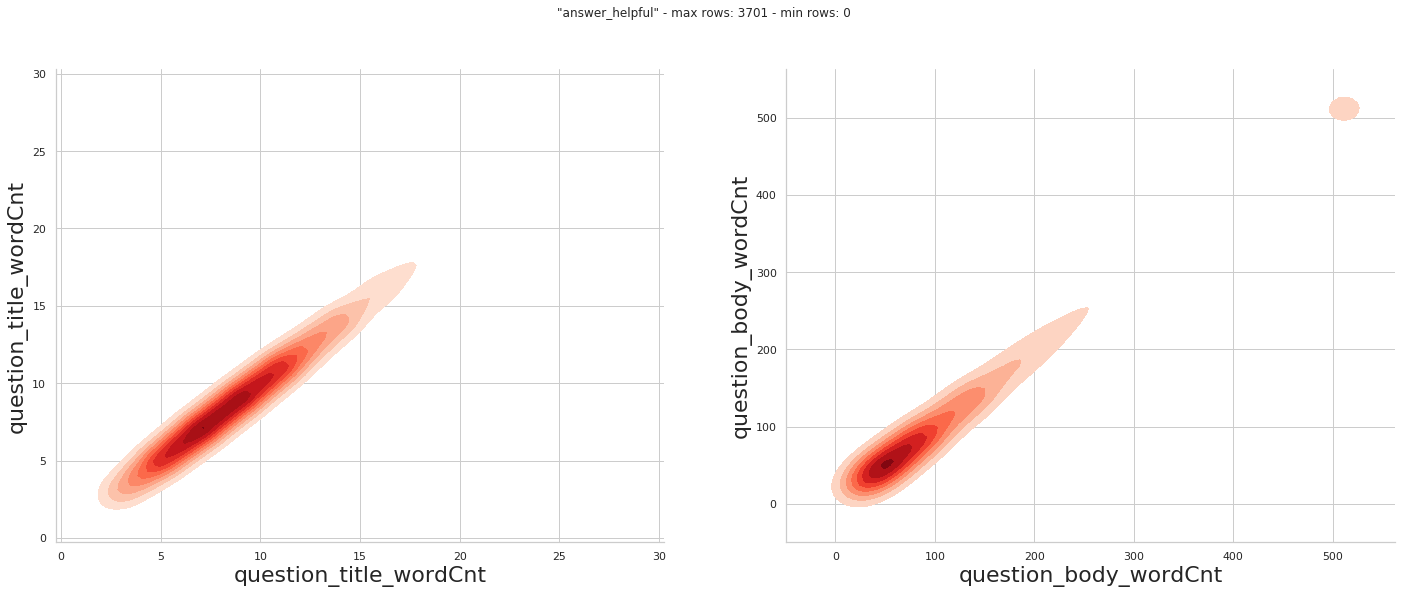

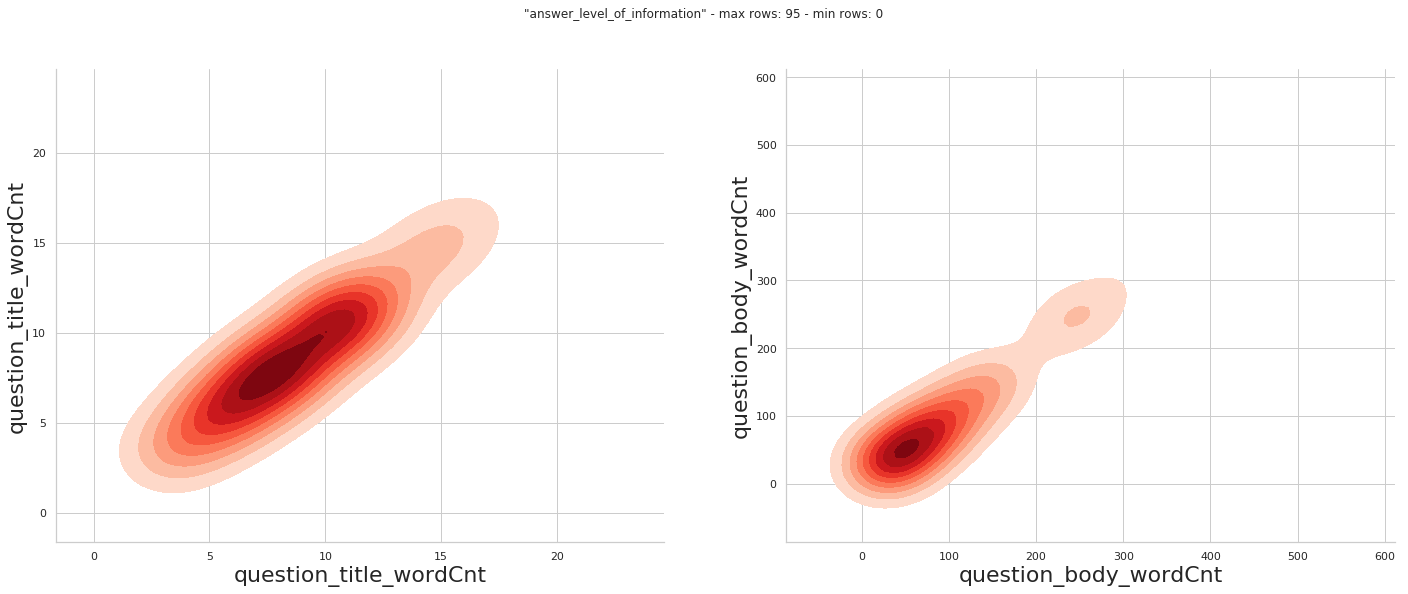

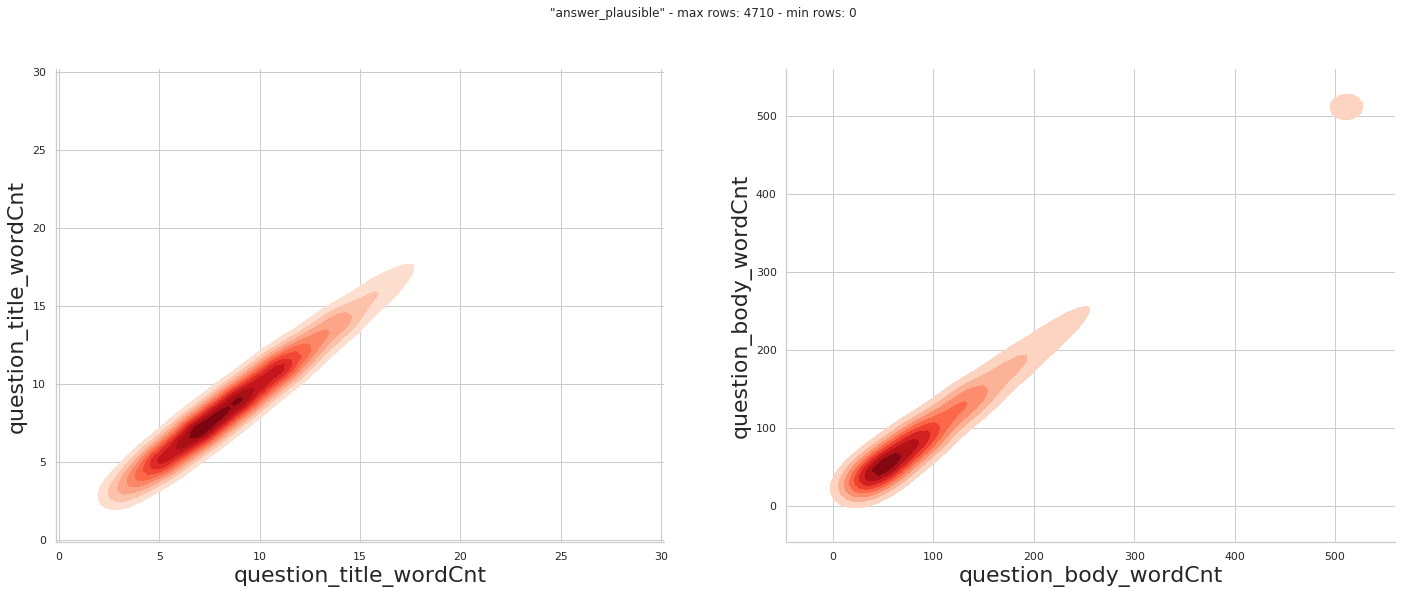

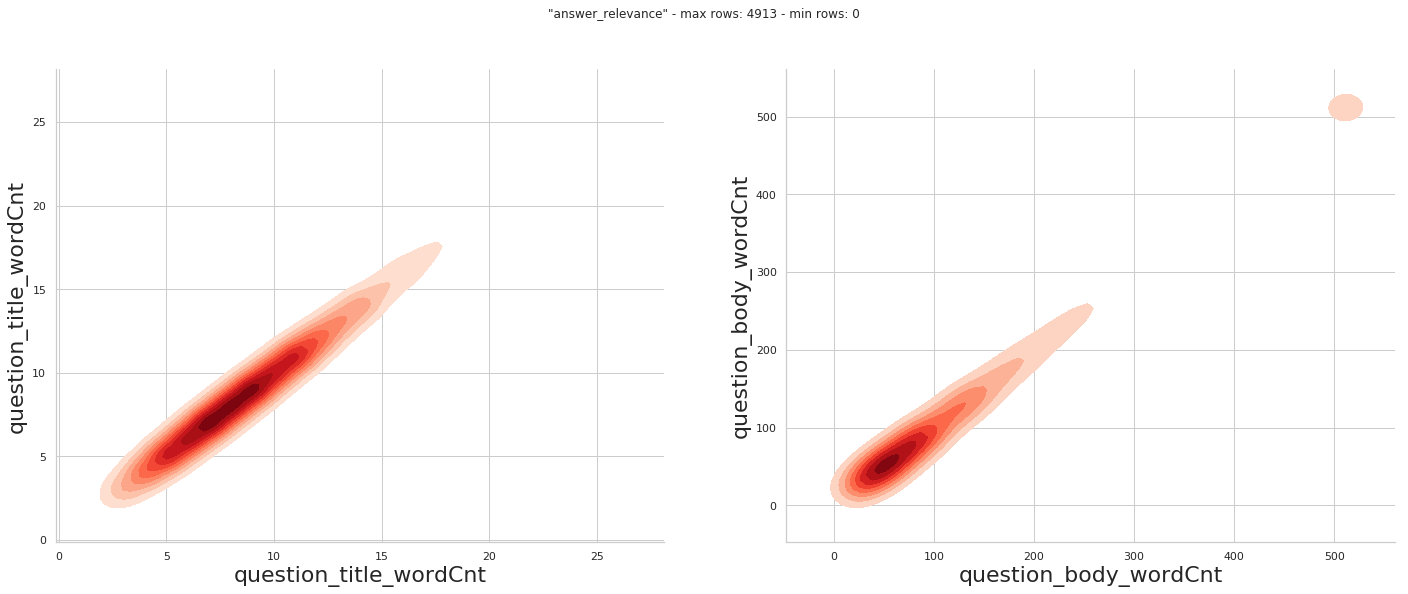

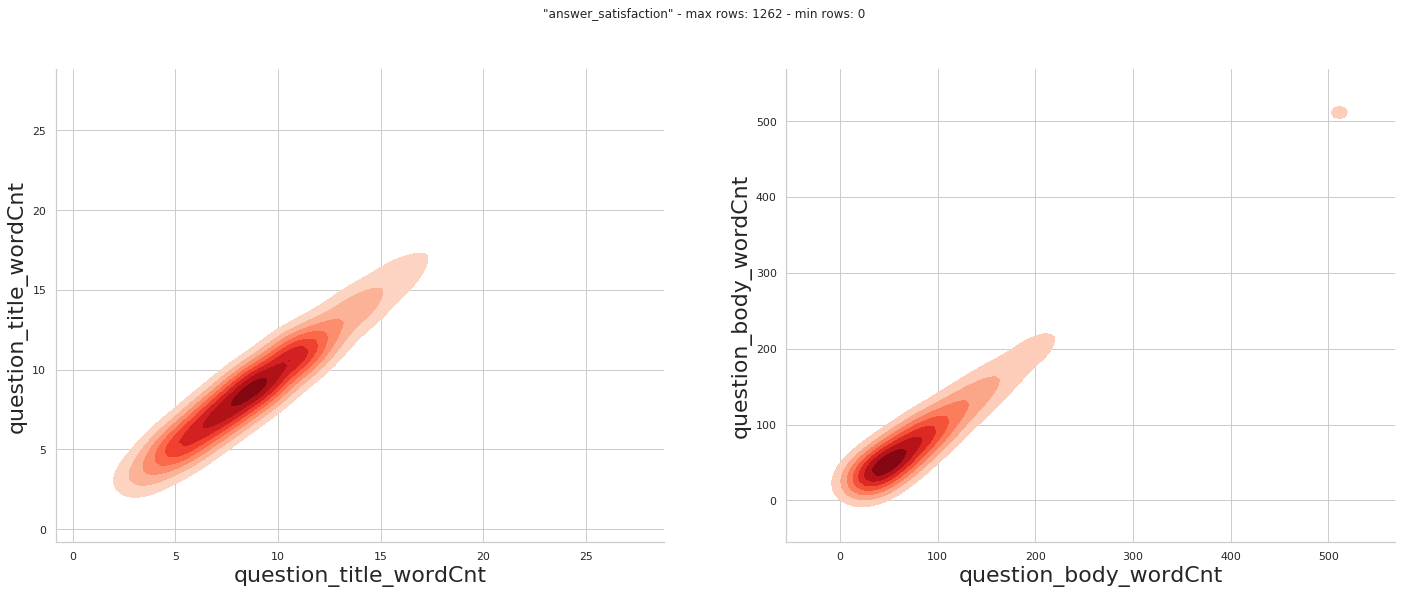

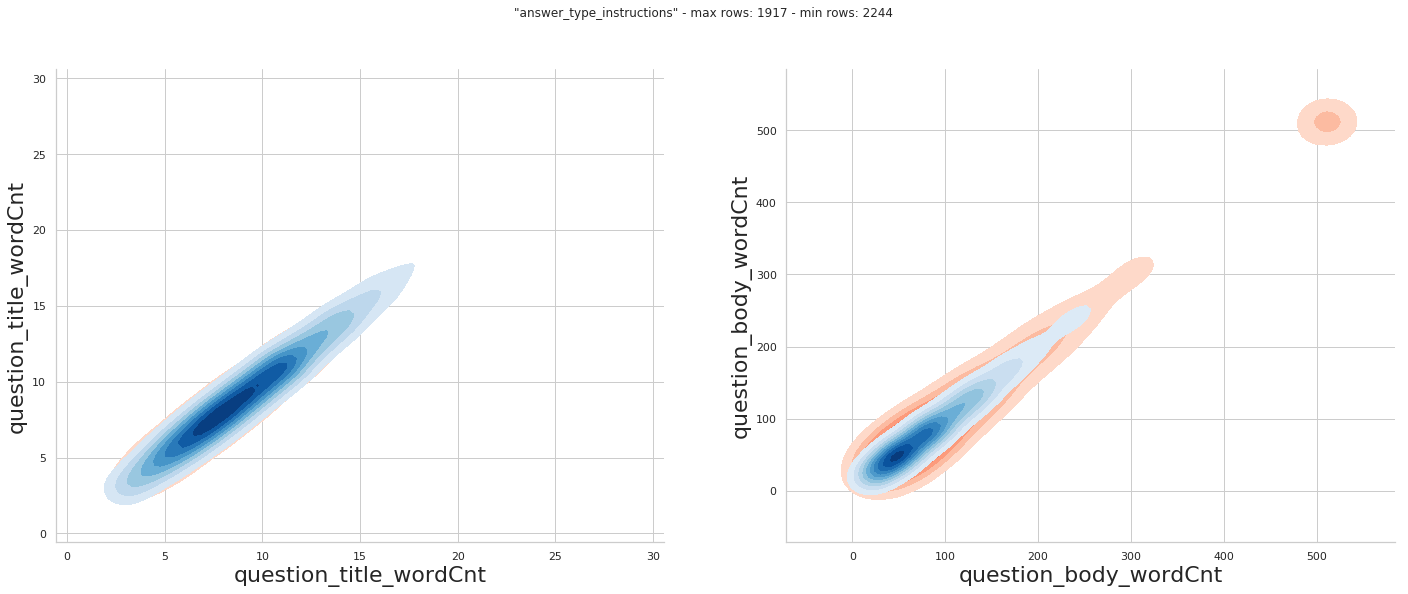

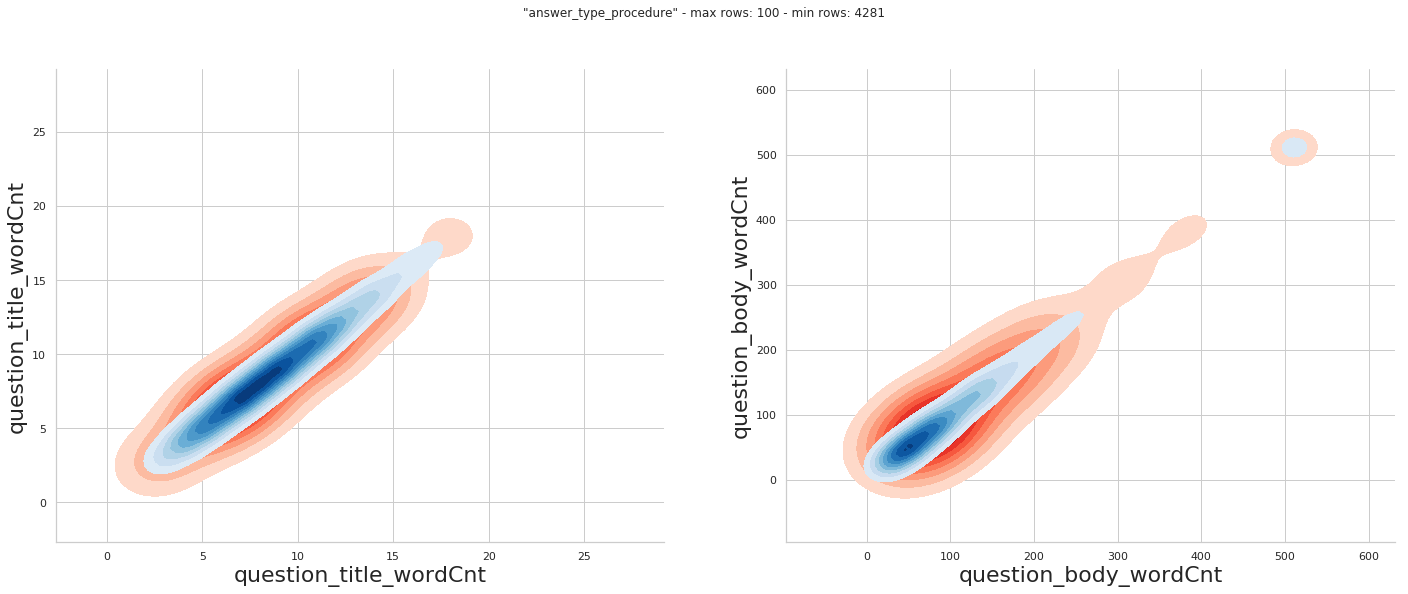

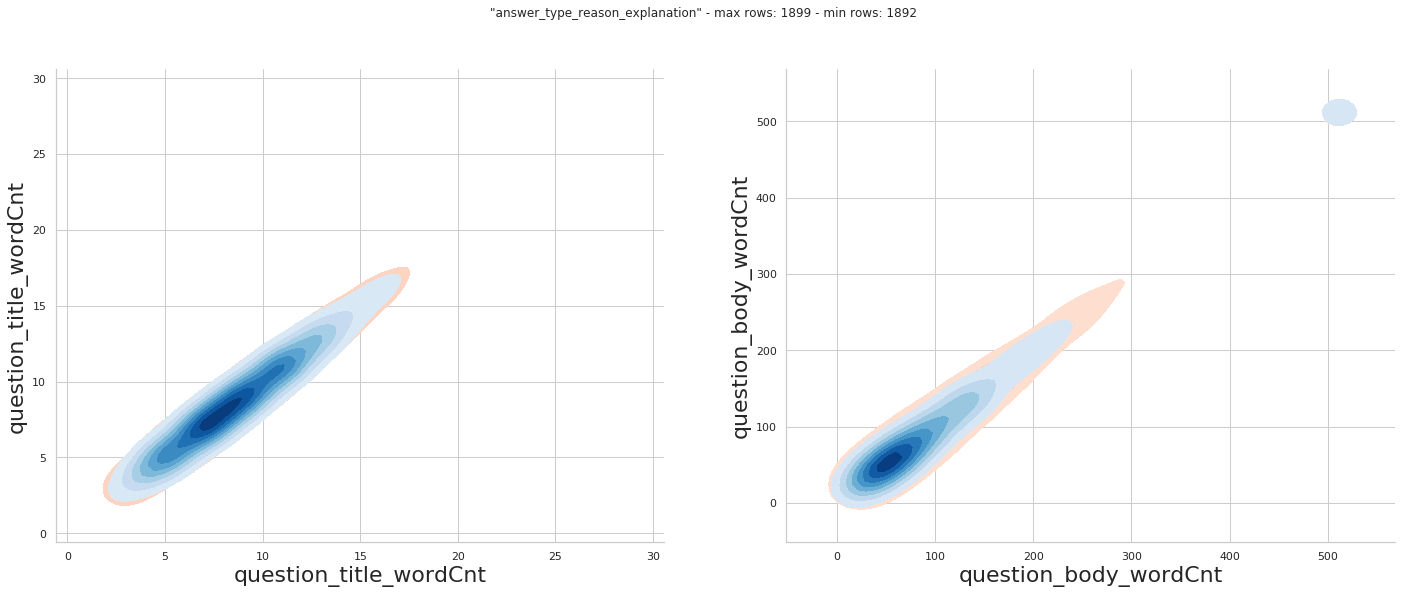

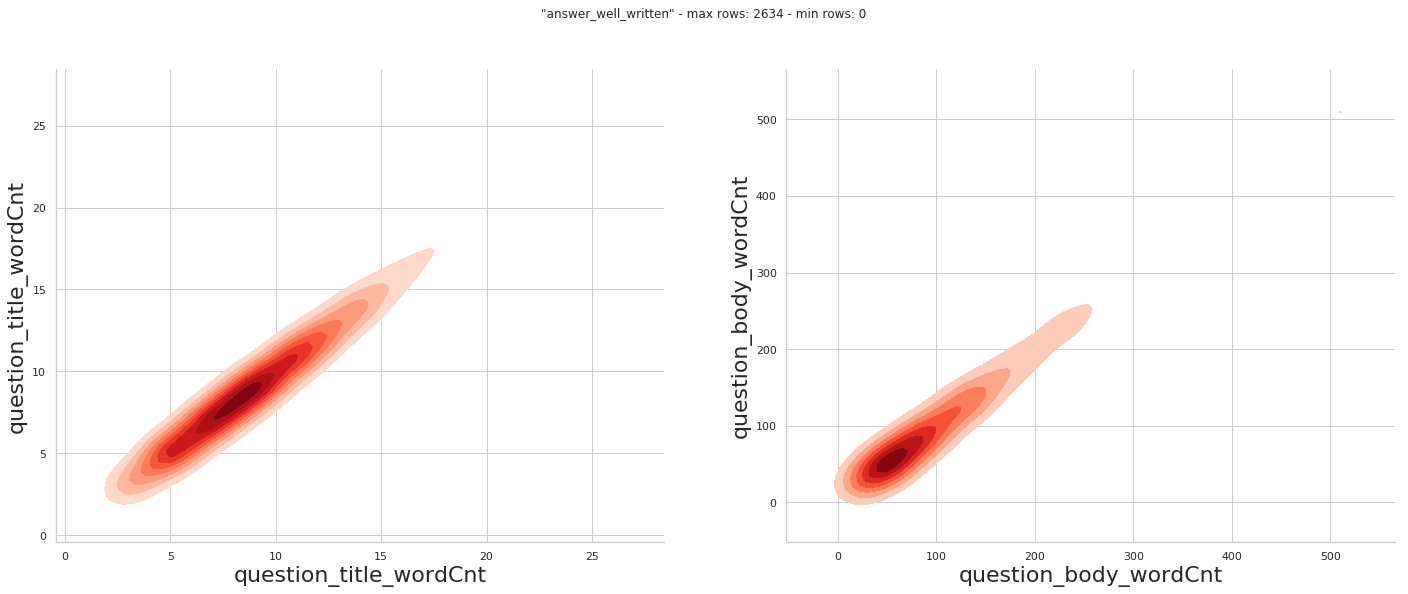

In [7]:
train['question_title_wordCnt'] = train['question_title'].apply(lambda x : len(x.split(' ')))
train['question_body_wordCnt'] = train['question_body'].apply(lambda x : len(x.split(' ')))
train['answer_wordCnt'] = train['answer'].apply(lambda x : len(x.split(' ')))
train['question_title_wordCnt'] = train['question_title_wordCnt'].clip(0, 30)
train['question_body_wordCnt'] = train['question_body_wordCnt'].clip(0, 512)
train['answer_wordCnt'] = train['answer_wordCnt'].clip(0, 512)

for col in answer_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8.7))
    fig.suptitle('"%s" - max rows: %d - min rows: %d' % (col, len(max_set), len(min_set)))
    sns.kdeplot(max_set['question_title_wordCnt'], max_set['question_title_wordCnt'], cmap="Reds", shade=True, shade_lowest=False, ax=ax1)
    sns.kdeplot(min_set['question_title_wordCnt'], min_set['question_title_wordCnt'], cmap="Blues", shade=True, shade_lowest=False, ax=ax1)
    
    sns.kdeplot(max_set['question_body_wordCnt'], max_set['question_body_wordCnt'], cmap="Reds", shade=True, shade_lowest=False, ax=ax2)
    sns.kdeplot(min_set['question_body_wordCnt'], min_set['question_body_wordCnt'], cmap="Blues", shade=True, shade_lowest=False, ax=ax2)
    sns.despine()
    plt.show()

# Answer score analysis (text length)

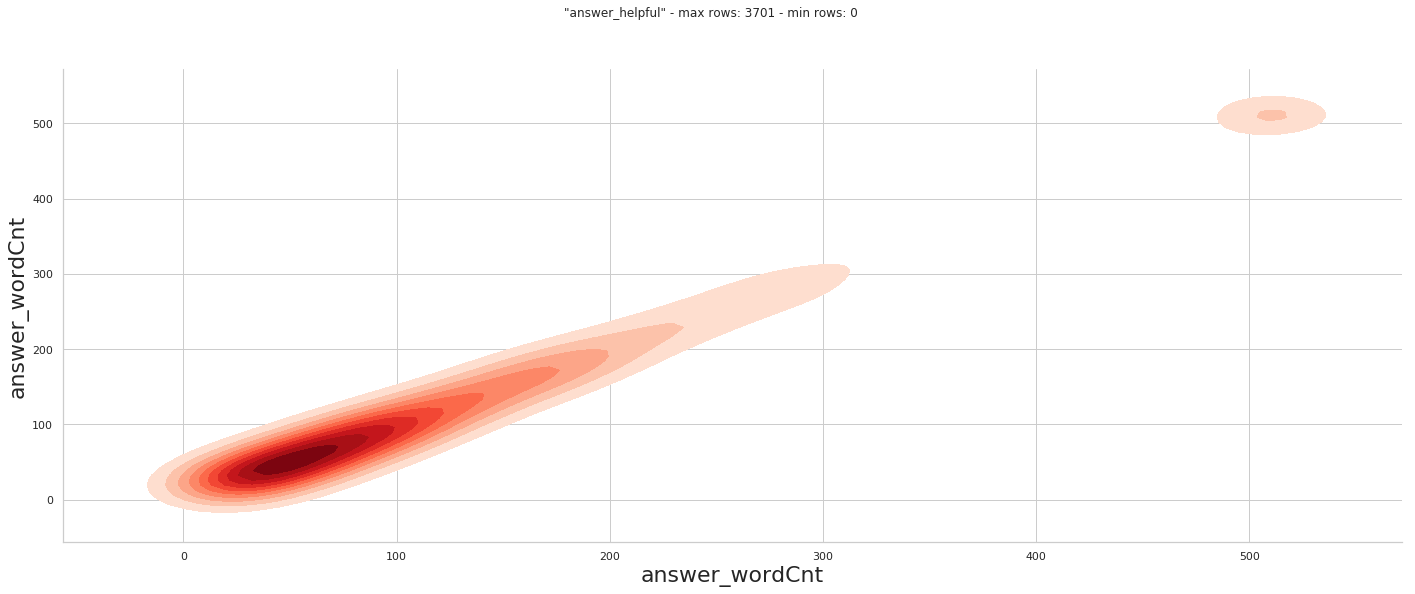

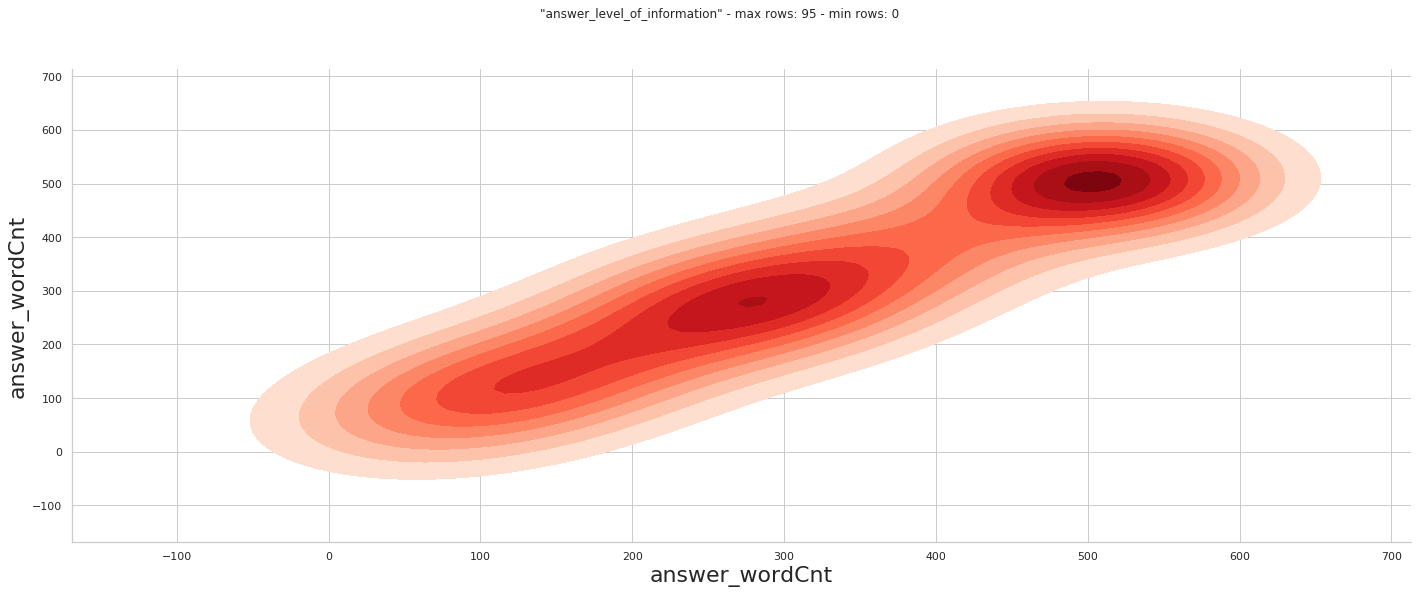

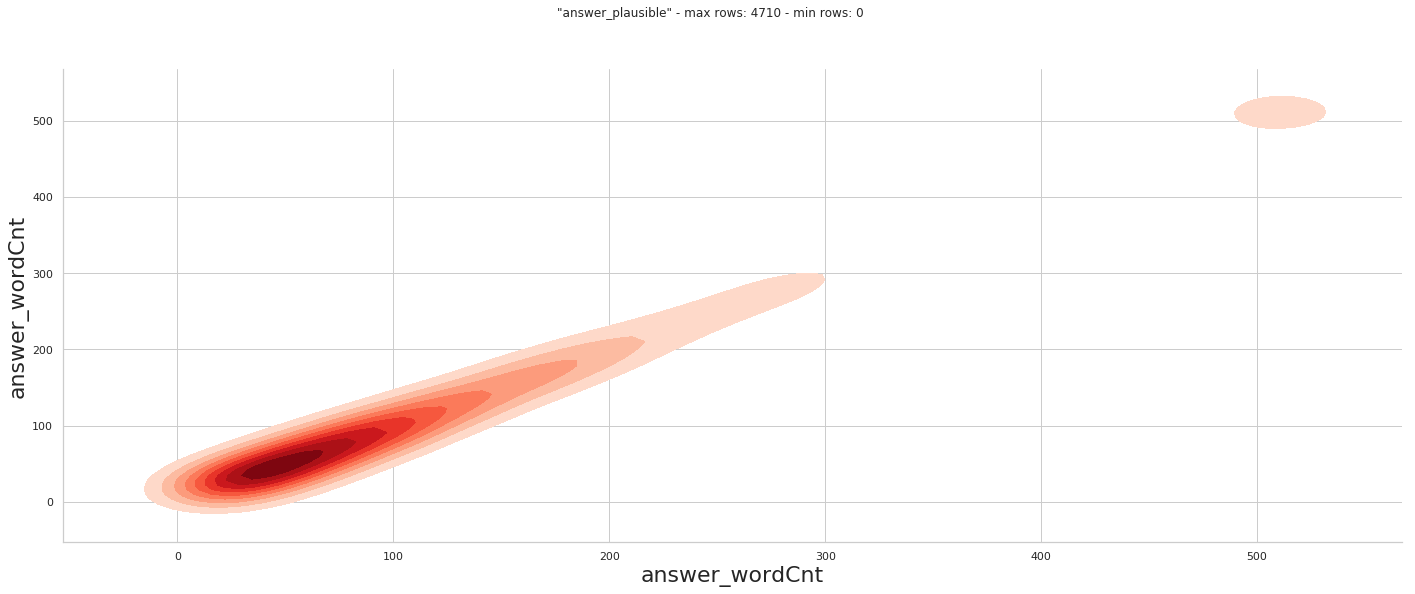

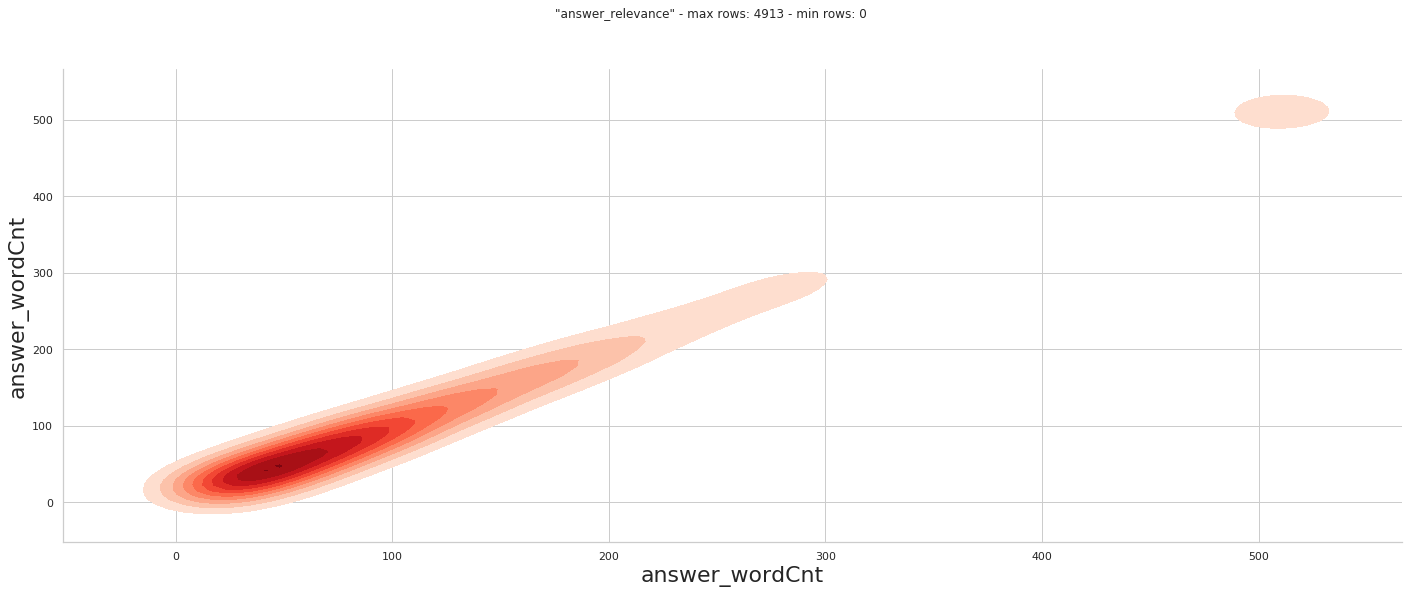

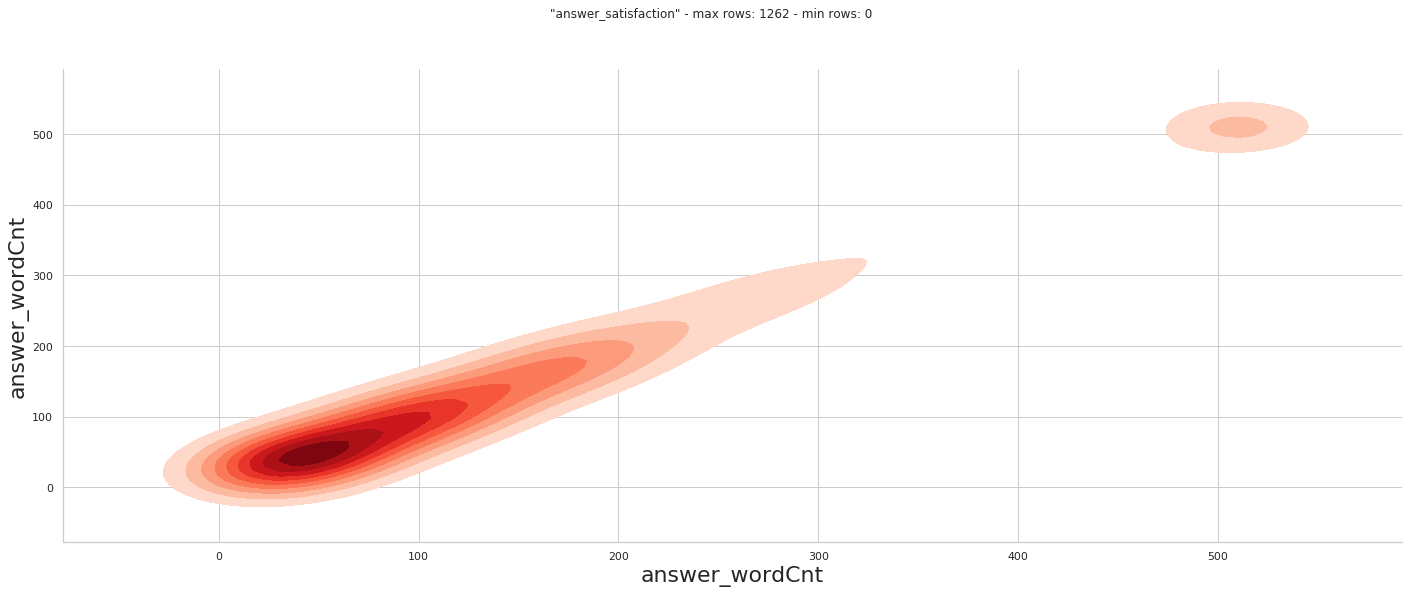

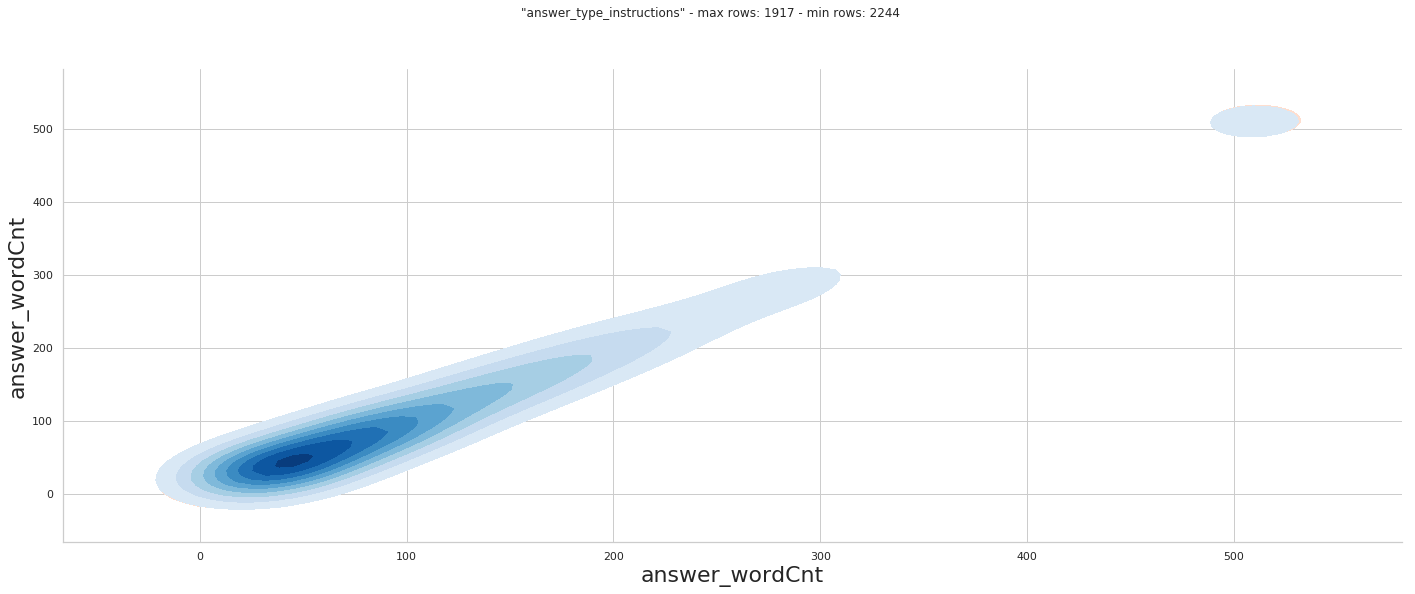

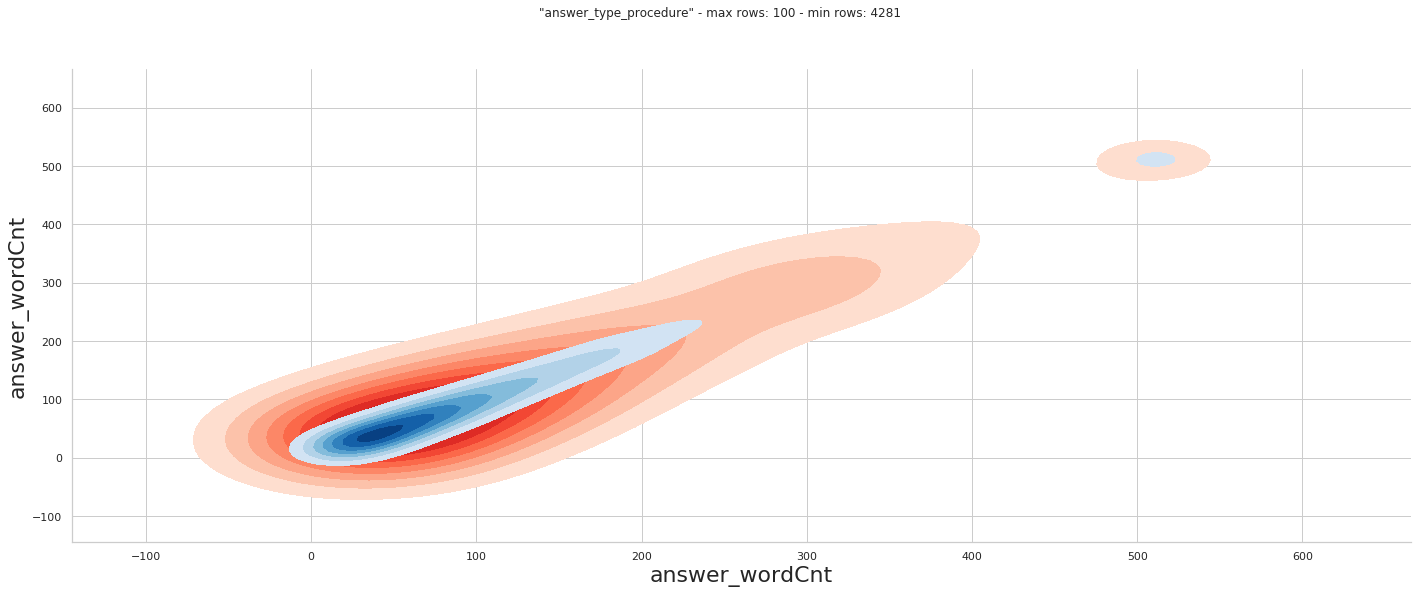

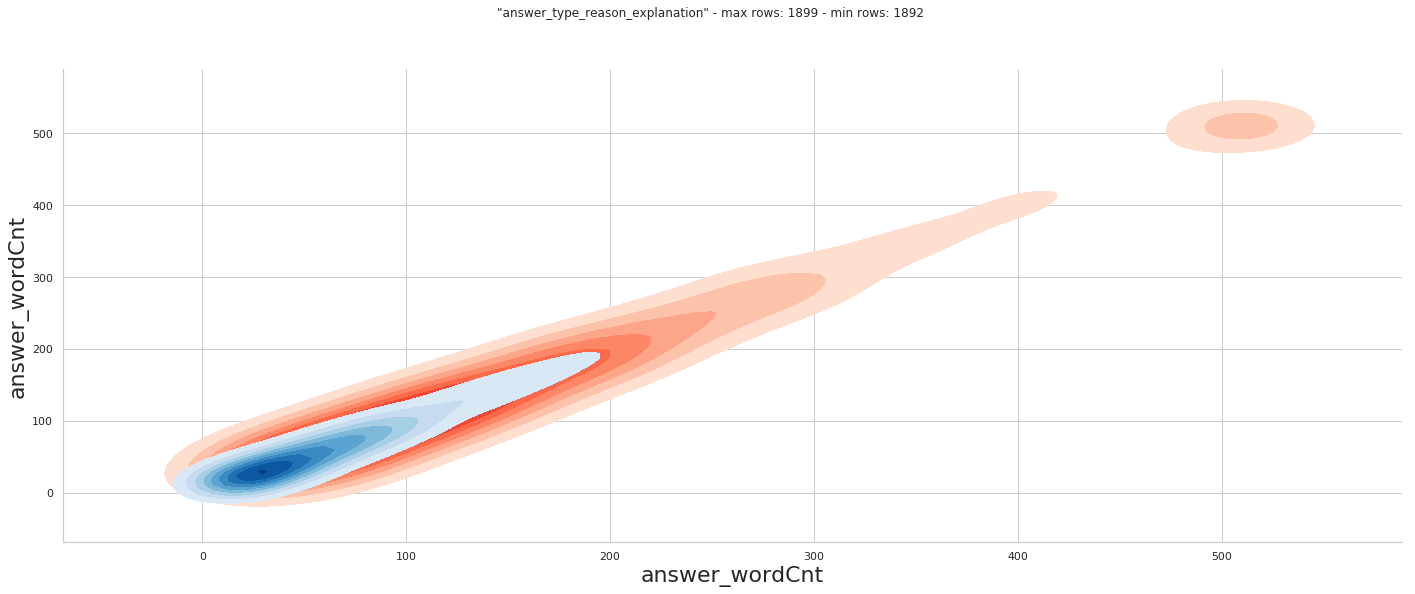

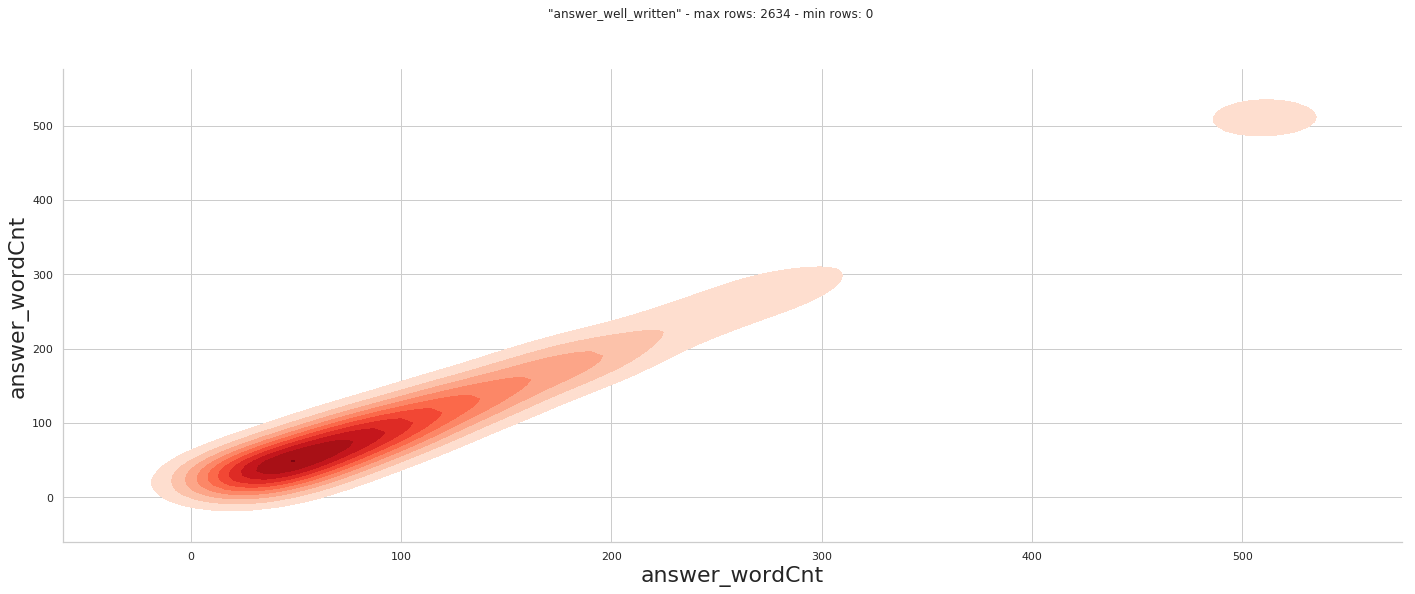

In [8]:
for col in answer_target_cols:
    max_set = train[train[col] == 1]
    min_set = train[train[col] == 0]

    fig, axes = plt.subplots(1, 1, figsize=(24, 8.7))
    fig.suptitle('"%s" - max rows: %d - min rows: %d' % (col, len(max_set), len(min_set))) 
    sns.kdeplot(max_set['answer_wordCnt'], max_set['answer_wordCnt'], cmap="Reds", shade=True, shade_lowest=False)
    sns.kdeplot(min_set['answer_wordCnt'], min_set['answer_wordCnt'], cmap="Blues", shade=True, shade_lowest=False)
    sns.despine()
    plt.show()